In [1]:
# if local use new_torch_env

import os

import numpy as np
import pandas as pd
# import seaborn as sns

from collections import Counter

import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from xml.etree import ElementTree, ElementInclude

import pickle
from functools import reduce

import iptcinfo3
from iptcinfo3 import IPTCInfo

import detectron2

from utills_output import *

# remember: 
All thresholds were set at 0.1 in prediction scripts.  

> cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1  # set a custom testing threshold

If everything is over estimated, lower it. But this you can also do model specific! Seem like it is mostly ratinanet that overestimates.. Number, but on the flip side it is way better at rare objects! As should be expected.
- In theory you shoould be abel to just use the instance object and create a new output_list.pkl and all_img_feature_list wiht a lower threshold for "score"

# testing:

## Important to do:
- Also think about doing the last ratina net also 
- and maybe not including the fasterRCNN in rare cases (or some other rule)
    - Right now stuff gets fucked up when the Faster's esitmate only zeores..


- Ok... the "overestimation" due to threshold is kind of irretating now.. But how to decide on that abitrary number? 
    - actually - you do have the socers savd so you maybe you could just do asomething there?


# FULL
Todo:
- Make sure meta works here
- Explore...


# final:
The generation of the dfs should be in their own script. Not here.
Make both annotated_df and df as pickles.



# TWO MAIN ISSUES RIGHT NOW:
1) 0.1 threshold is too high for Retina. Can you fix it from you data or do you need to run new models?
2) What should be the critaria for including models for ensamble? Or should they be weigted?
(need to fix 1 beofre I can survey 2...)


In [4]:
## You should just load the dfs here.
# with open('spanner_annotated_df.pkl', 'wb') as file:
#     pickle.dump(annotated_df, file)

annotated_df = annotate_df()
annotated_df = meta_to_df(annotated_df)

annotated_df.sample(10)

Files exists:
 Outputs path: /home/simon/Documents/Bodies/data/computerome_outputs/detectron_outputs_test/faster_rcnn_R_50_FPN_3x/output_list.pkl 
 features path: /home/simon/Documents/Bodies/data/computerome_outputs/detectron_outputs_test/faster_rcnn_R_50_FPN_3x/all_img_feature_list.pkl 
Files exists:
 Outputs path: /home/simon/Documents/Bodies/data/computerome_outputs/detectron_outputs_test/faster_rcnn_R_101_FPN_3x/output_list.pkl 
 features path: /home/simon/Documents/Bodies/data/computerome_outputs/detectron_outputs_test/faster_rcnn_R_101_FPN_3x/all_img_feature_list.pkl 
Files exists:
 Outputs path: /home/simon/Documents/Bodies/data/computerome_outputs/detectron_outputs_test/faster_rcnn_X_101_32x8d_FPN_3x/output_list.pkl 
 features path: /home/simon/Documents/Bodies/data/computerome_outputs/detectron_outputs_test/faster_rcnn_X_101_32x8d_FPN_3x/all_img_feature_list.pkl 
Files exists:
 Outputs path: /home/simon/Documents/Bodies/data/computerome_outputs/detectron_outputs_test/retinane

img_id  militaryVehicle_fasterR50  religiousGarmentFemale_fasterR50  \
801  JS10973                          2                                 0   
108     JS52                          0                                 0   
774  JS19465                          0                                 0   
935   JS6919                          0                                 0   
828   JS6604                          2                                 0   
817    JS476                          0                                 0   
675   JS8441                          0                                 0   
377  JS25479                          0                                 0   
242   JS2158                          0                                 0   
387  JS26178                          0                                 0   

     falgIRQ_fasterR50  adult_fasterR50  flagUS_fasterR50  firearm_fasterR50  \
801                  0                5                 0                  1   
108                  0                5                 0                  0   
774                  0                1                 0                  1   
935                  1                3                 2                  0   
828                  0                6                 0                  2   
817                  0                3                 0                  0   
675                  0                2                 0                  3   
377                  0                2                 1                  0   
242                  0                7                 0                  0   
387                  0                3                 0                  2   

     female_fasterR50  male_fasterR50  uniformed_fasterR50  ...  \
801                 0               6                    5  ...   
108                 0               5                    0  ...   
774                 0               5                    4  ...   
935                 0               4                    2  ...   
828                 0               7                    0  ...   
817                 0               2                    0  ...   
675                 0               3                    4  ...   
377                 0               2                    0  ...   
242                 0               9                    0  ...   
387                 0               4                    1  ...   

                    headline                          credit  \
801                      NaN                             NaN   
108                      NaN                             NaN   
774  New Iraqi Army Training                  Polaris Images   
935                      NaN                             NaN   
828                      NaN                             NaN   
817                      NaN                             NaN   
675                      NaN  Johan Spanner/WorldPictureNews   
377                      NaN                             NaN   
242                      NaN                             NaN   
387             Actress Mays                         Polaris   

                             source                copyright notice  \
801                             NaN                             NaN   
108                             NaN                             NaN   
774                             NaN           Johan Spanner/Polaris   
935                             NaN                             NaN   
828                             NaN                             NaN   
817                             NaN                             NaN   
675  Johan Spanner/WorldPictureNews  Johan Spanner/WorldPictureNews   
377                             NaN                             NaN   
242                             NaN                             NaN   
387                             NaN    Johan Spanner/Polaris Images   

                                      caption/abstra

In [5]:
np.corrcoef(annotated_df['person_fasterR50'], annotated_df['person_annotated'])

array([[1.       , 0.7905977],
       [0.7905977, 1.       ]])

In [ ]:
# Plotting

plot_corr(annotated_df)
plot_corr(annotated_df, 'train')
plot_corr(annotated_df, 'test')

feature_version_list = ['annotated', 'mean', 'median', 'fasterX101', 'fasterR101', 'fasterR50', 'retinaR101', 'retinaR50']
for i in feature_version_list:
    feature_dist_plots(annotated_df, i)

# Annotated, alt threshold (0.3):

In [2]:
# try w/ alt threshold:
annotated_df_t30 = annotate_df(alt_threshold= True)
annotated_df_t30 = meta_to_df(annotated_df_t30)

annotated_df_t30.sample(10)

Files exists:
 Outputs path: /home/simon/Documents/Bodies/data/computerome_outputs/alt_threshold_outputs/faster_rcnn_R_50_FPN_3x/output_list_t30.pkl 
 features path: /home/simon/Documents/Bodies/data/computerome_outputs/alt_threshold_outputs/faster_rcnn_R_50_FPN_3x/all_img_feature_list_t30.pkl 
Files exists:
 Outputs path: /home/simon/Documents/Bodies/data/computerome_outputs/alt_threshold_outputs/faster_rcnn_R_101_FPN_3x/output_list_t30.pkl 
 features path: /home/simon/Documents/Bodies/data/computerome_outputs/alt_threshold_outputs/faster_rcnn_R_101_FPN_3x/all_img_feature_list_t30.pkl 
Files exists:
 Outputs path: /home/simon/Documents/Bodies/data/computerome_outputs/alt_threshold_outputs/faster_rcnn_X_101_32x8d_FPN_3x/output_list_t30.pkl 
 features path: /home/simon/Documents/Bodies/data/computerome_outputs/alt_threshold_outputs/faster_rcnn_X_101_32x8d_FPN_3x/all_img_feature_list_t30.pkl 
Files exists:
 Outputs path: /home/simon/Documents/Bodies/data/computerome_outputs/alt_threshold

img_id  uniformed_fasterR50  falgIRQ_fasterR50  male_fasterR50  \
298  JS26022                    0                  0               2   
818  JS22572                    0                  0               1   
400  JS28552                    1                  0               0   
357  JS13181                    0                  0               1   
227  JS76785                    0                  0               1   
47   JS22026                    0                  0               1   
820   JS9065                    0                  0               1   
738  JS44132                    0                  0               0   
803  JS30364                    1                  0               0   
36    JS1145                    0                  0               3   

     firearm_fasterR50  person_fasterR50  militaryVehicle_fasterR50  \
298                  0                 3                          0   
818                  0                 2                          0   
400                  0                 1                          0   
357                  0                 2                          0   
227                  0                 3                          0   
47                   0                 3                          0   
820                  0                 4                          0   
738                  1                 1                          0   
803                  0                 1                          1   
36                   0                 7                          0   

     flagUS_fasterR50  uniformed_fasterR101  falgIRQ_fasterR101  ...  \
298                 0                     0                   0  ...   
818                 0                     0                   0  ...   
400                 0                     1                   0  ...   
357                 0                     0                   0  ...   
227                 0                     1                   0  ...   
47                  0                     0                   0  ...   
820                 0                     0                   0  ...   
738                 0                     0                   0  ...   
803                 0                     1                   0  ...   
36                  0                     0                   0  ...   

                            headline                          credit  \
298                     Actress Mays                         Polaris   
818                              NaN                             NaN   
400                              NaN                             NaN   
357                              NaN                             NaN   
227                              NaN                             NaN   
47                               NaN                             NaN   
820  Former Iraqi Army demonstration  Johan Spanner/WorldPictureNews   
738                              NaN                             NaN   
803                              NaN                             NaN   
36                               NaN                             NaN   

                             source                copyright notice  \
298                             NaN    Johan Spanner/Polaris Images   
818                             NaN                             NaN   
400                             NaN                             NaN   
357                             NaN                             NaN   
227                             NaN                             NaN   
47                              NaN                             NaN   
820  Johan Spanner/WorldPictureNews  Johan Spanner/WorldPictureNews   
738                             NaN                             NaN   
803                             NaN                             NaN   
36                              NaN                             NaN   

                                      caption/abstract  \
298  

In [3]:
annotated_df_t30['img_id'].head() == annotated_df['img_id'].head()

NameError: name 'annotated_df' is not defined

In [4]:
np.corrcoef(annotated_df_t30['person_fasterR50'], annotated_df_t30['person_annotated'])

array([[1.        , 0.82243923],
       [0.82243923, 1.        ]])

plotting firearm: both. Dim: (1007, 129)


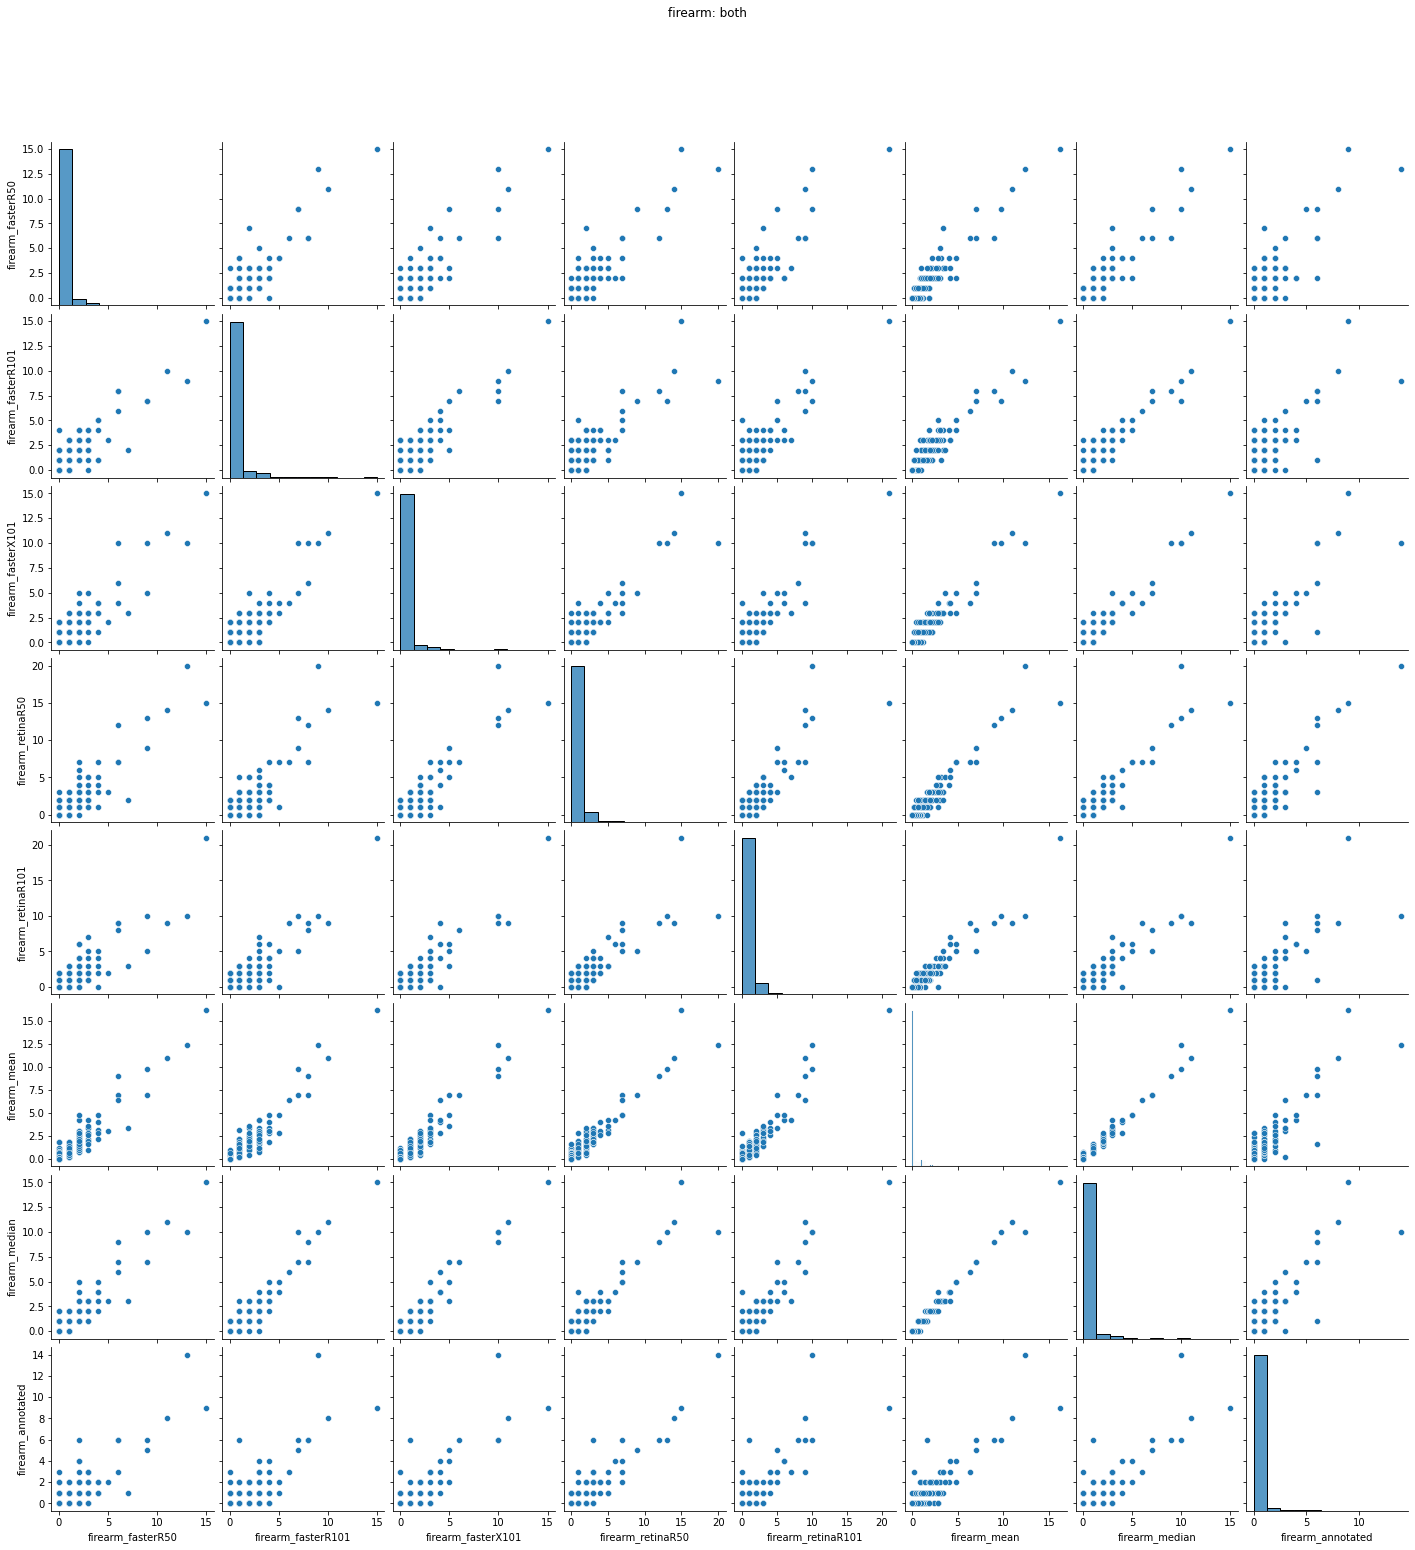

plotting youth: both. Dim: (1007, 129)


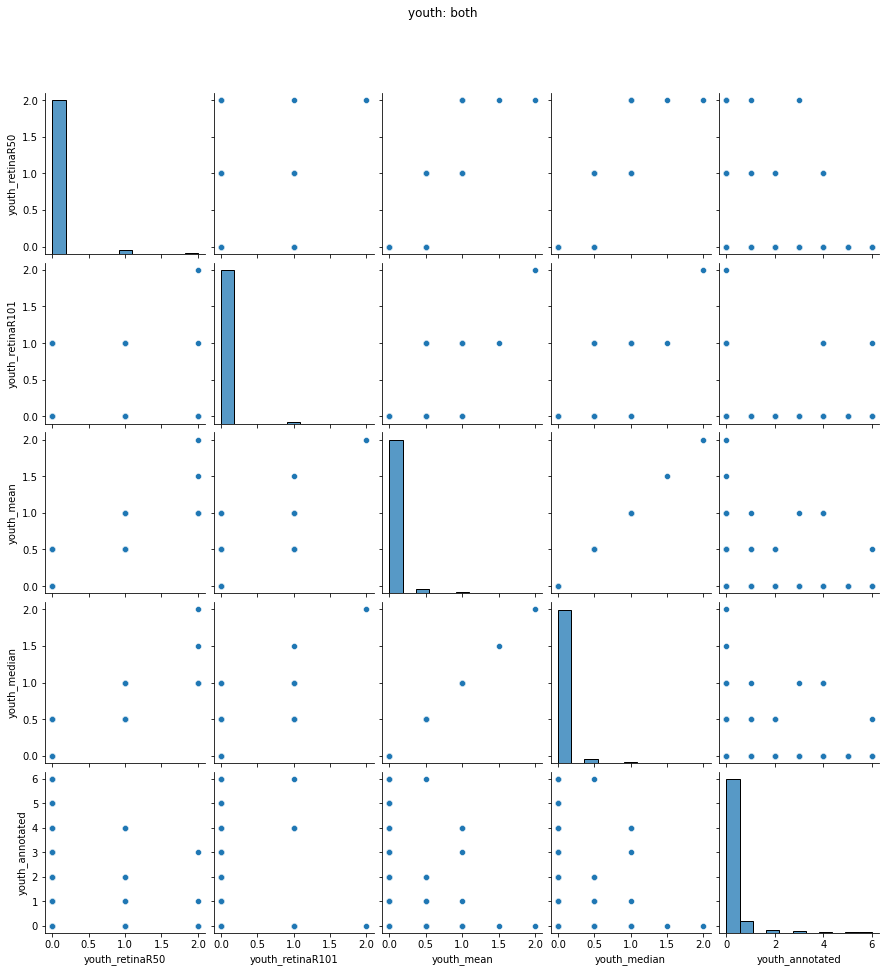

plotting adult: both. Dim: (1007, 129)


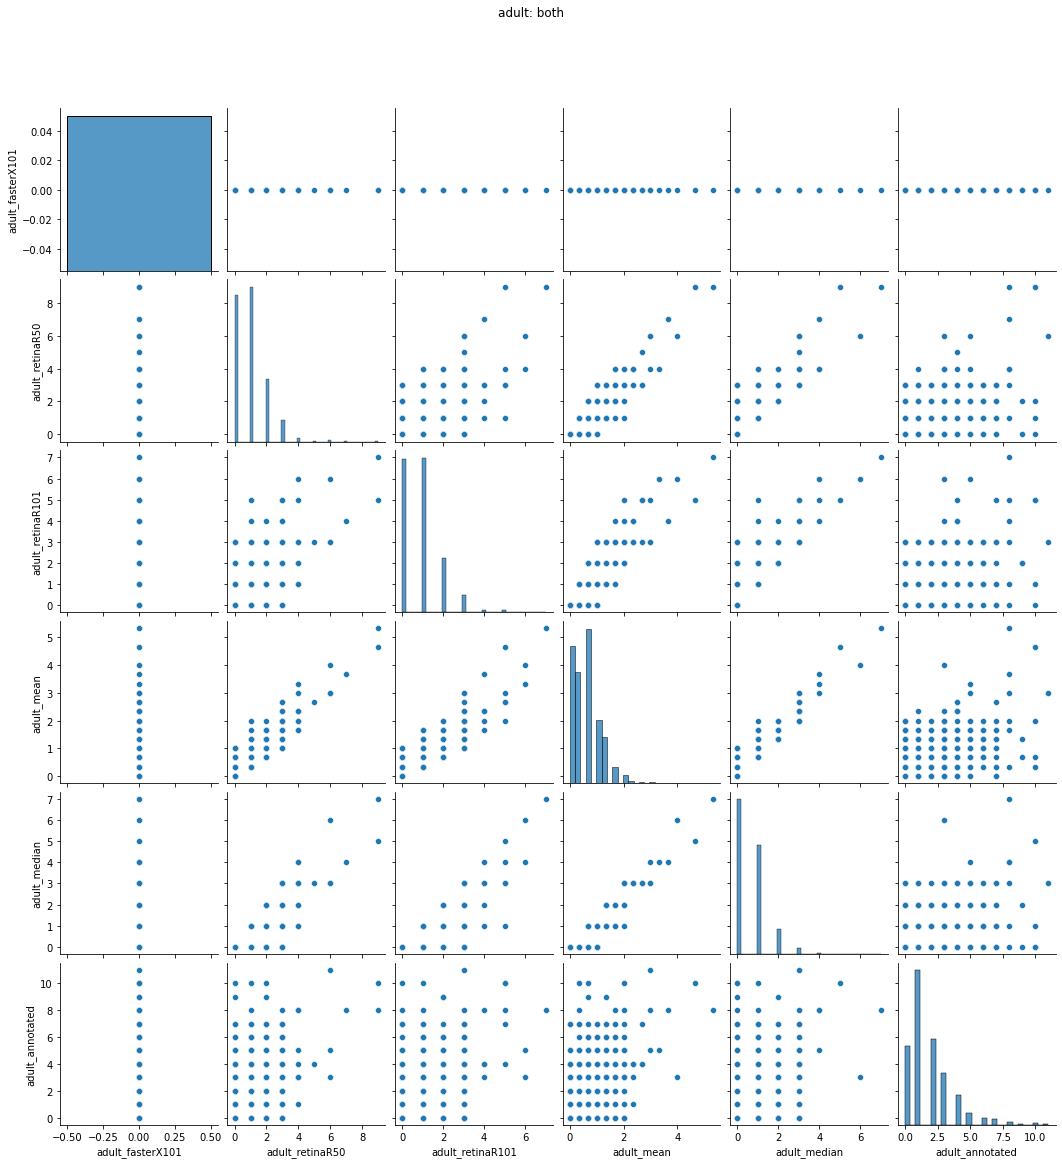

plotting hostage: both. Dim: (1007, 129)


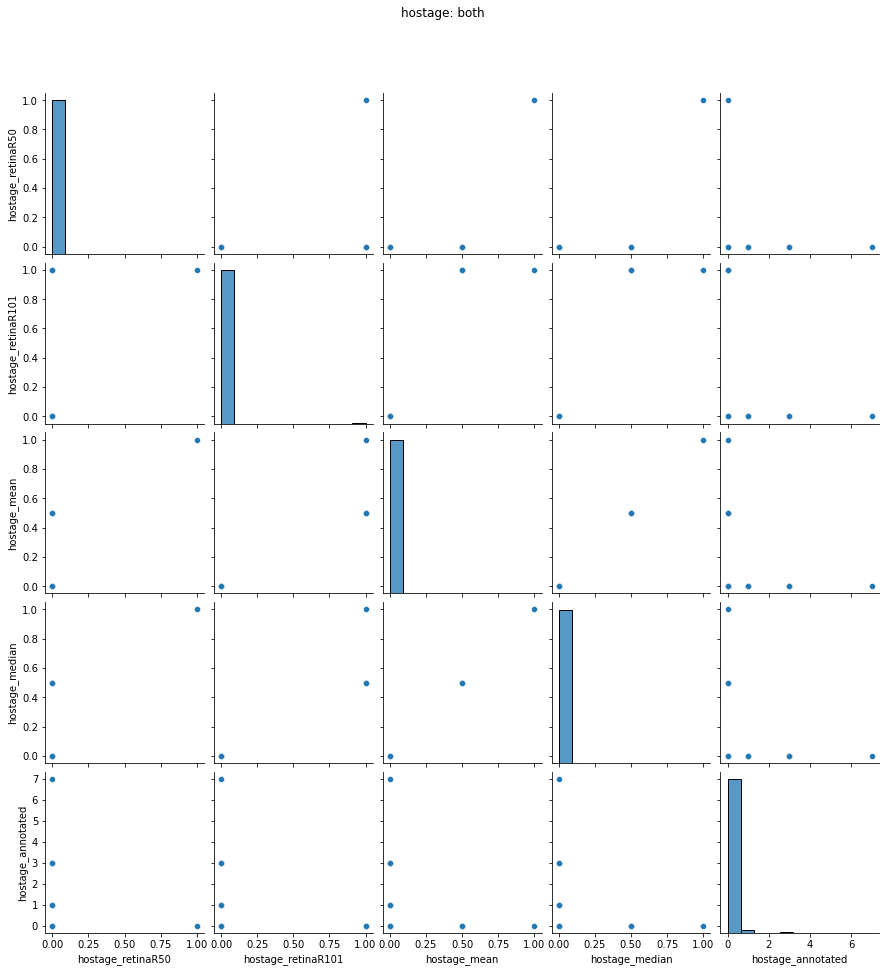

plotting falgIRQ: both. Dim: (1007, 129)


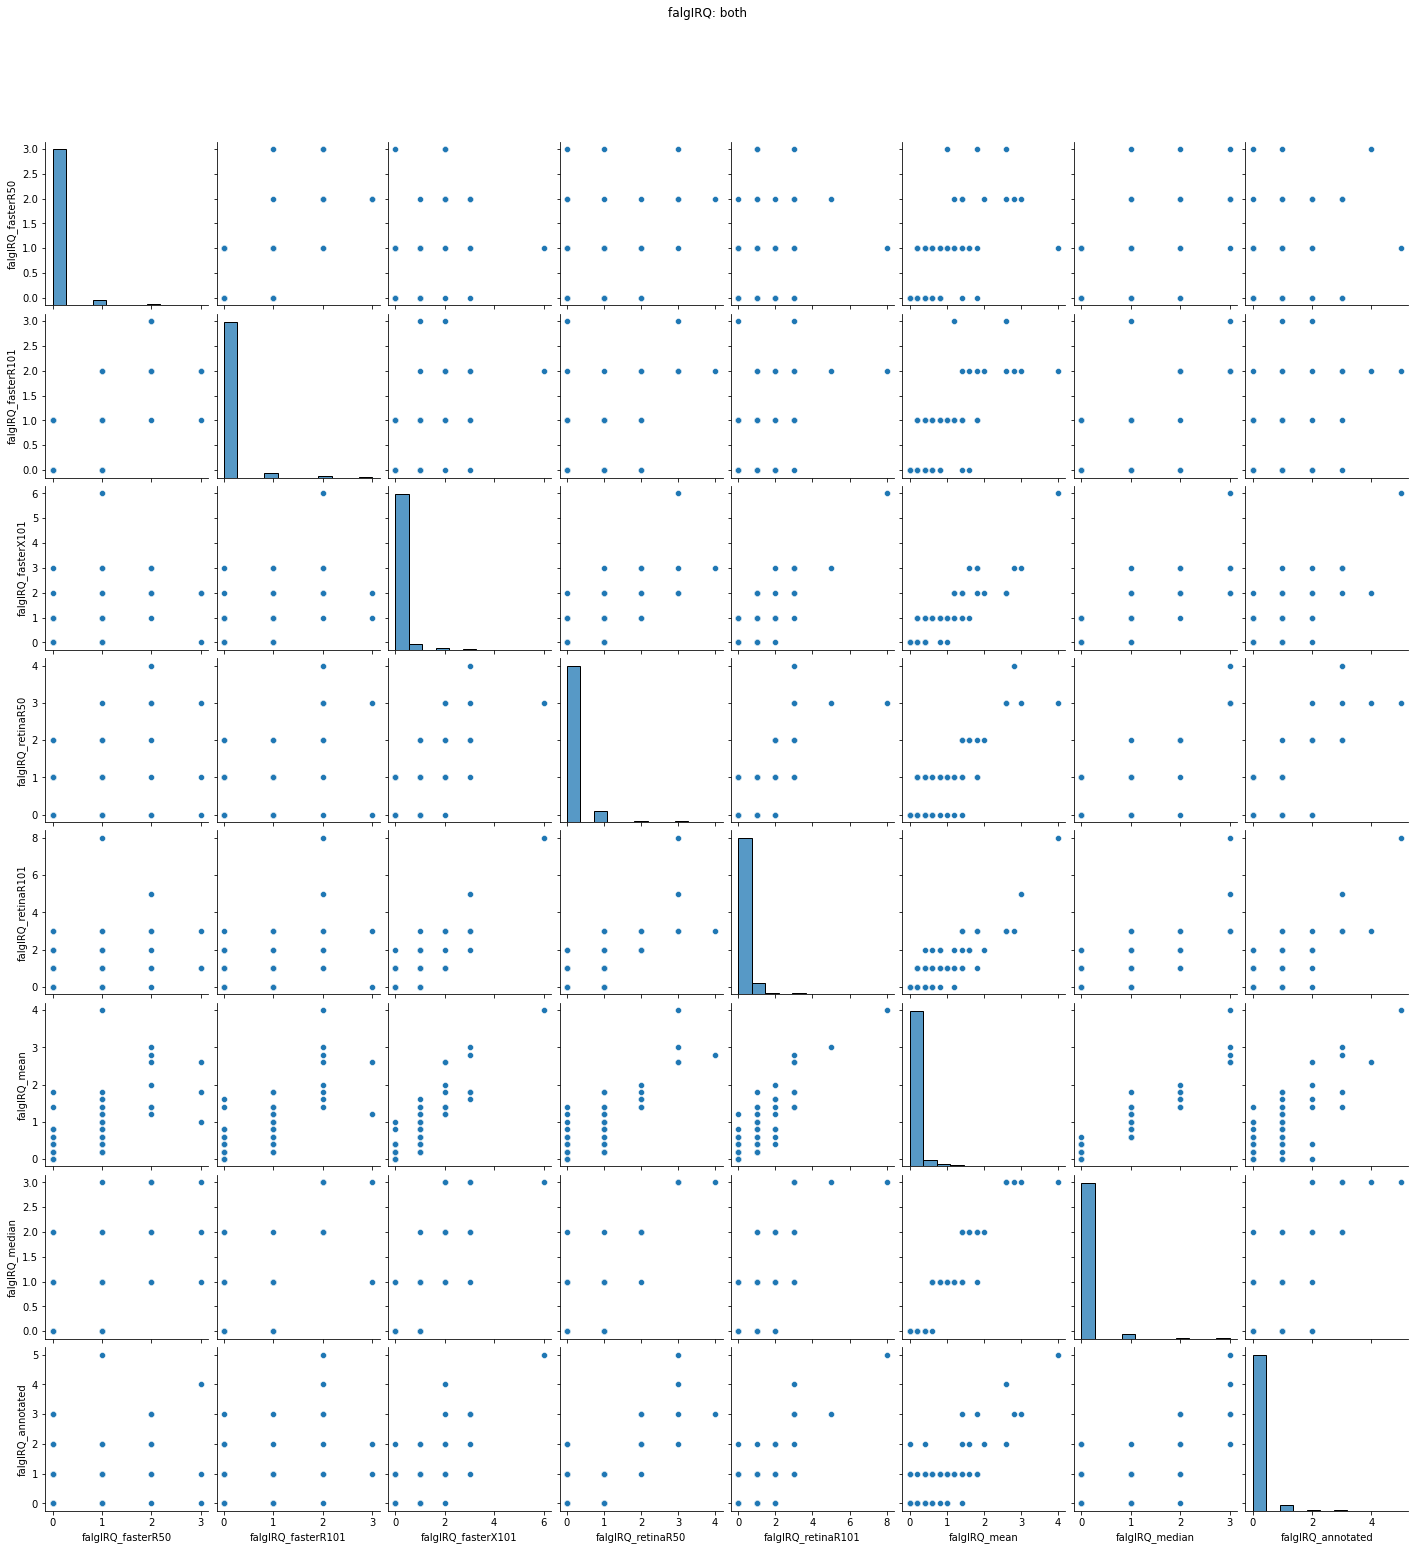

plotting uniformed: both. Dim: (1007, 129)


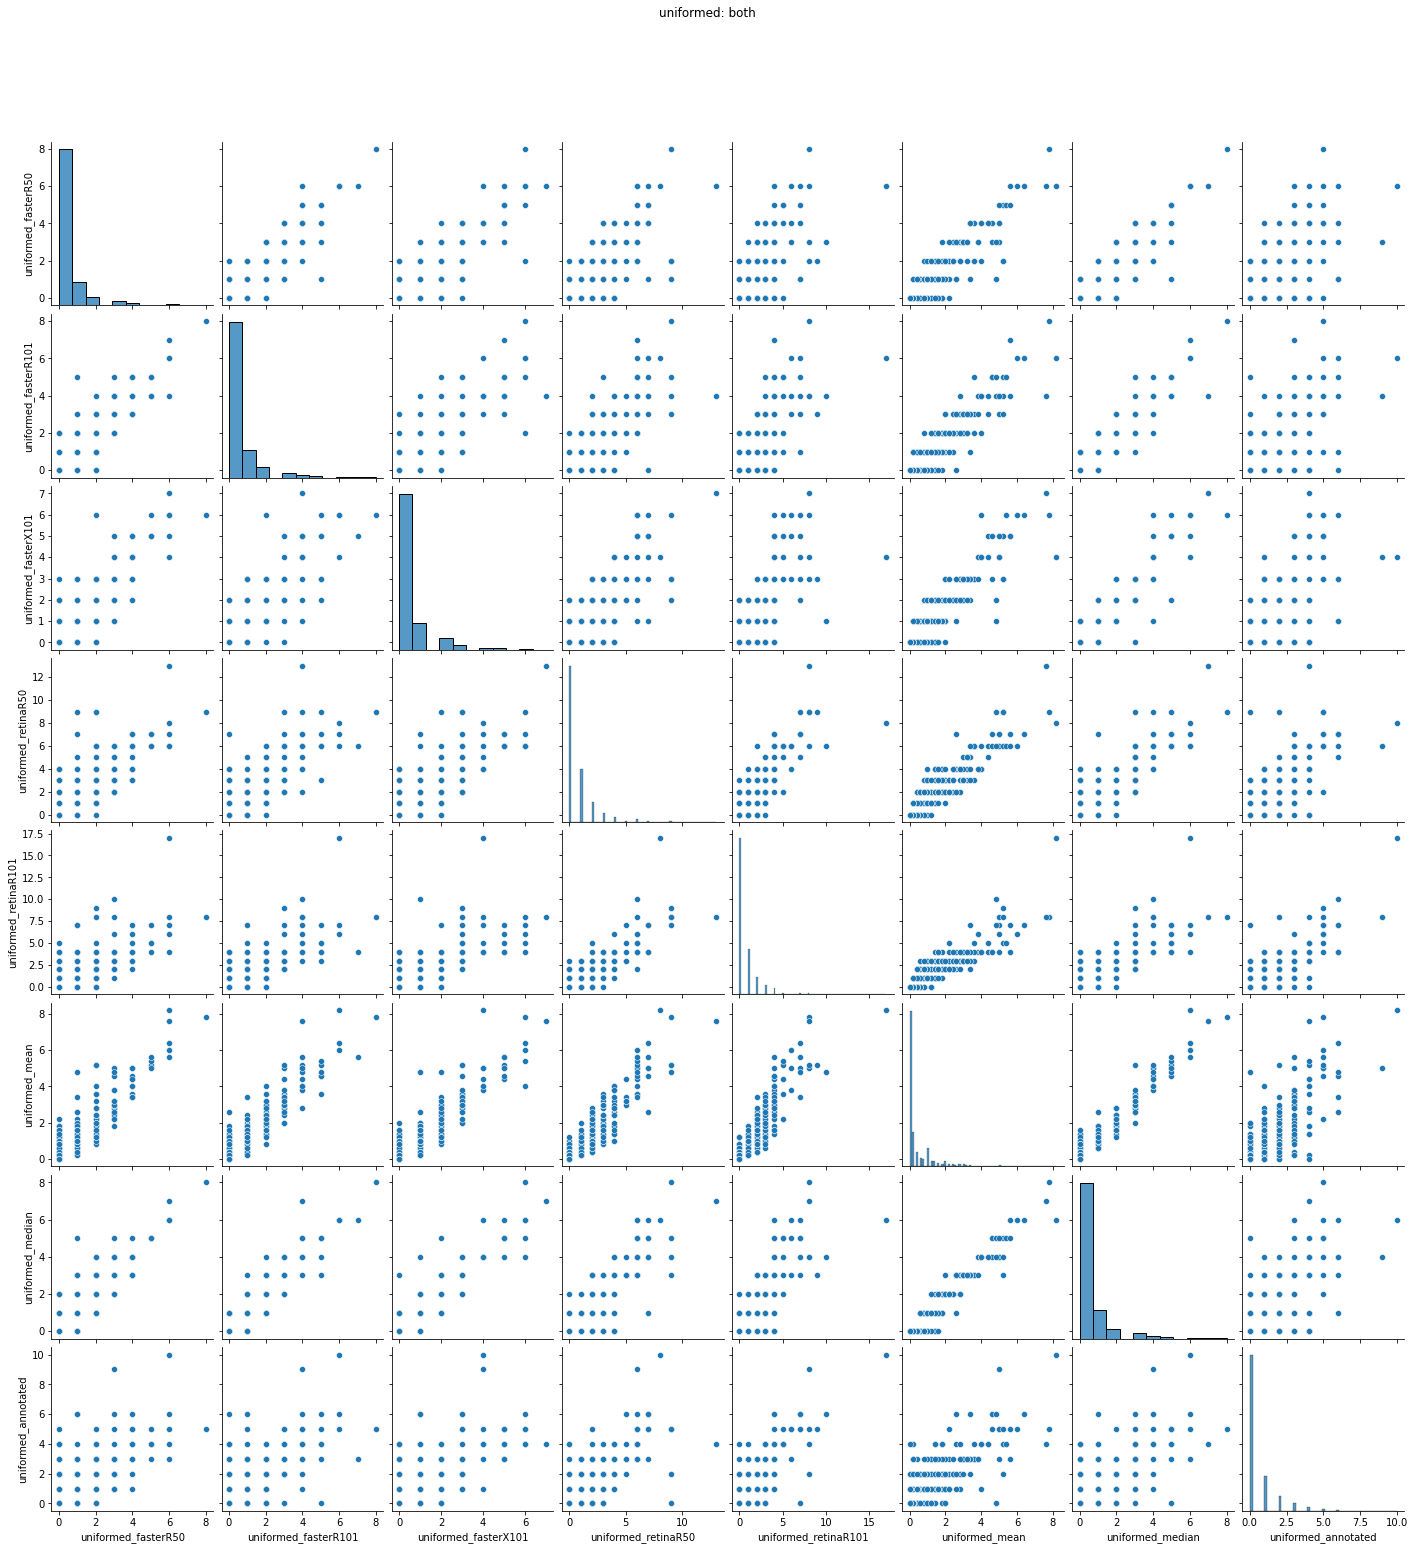

plotting casualty: both. Dim: (1007, 129)


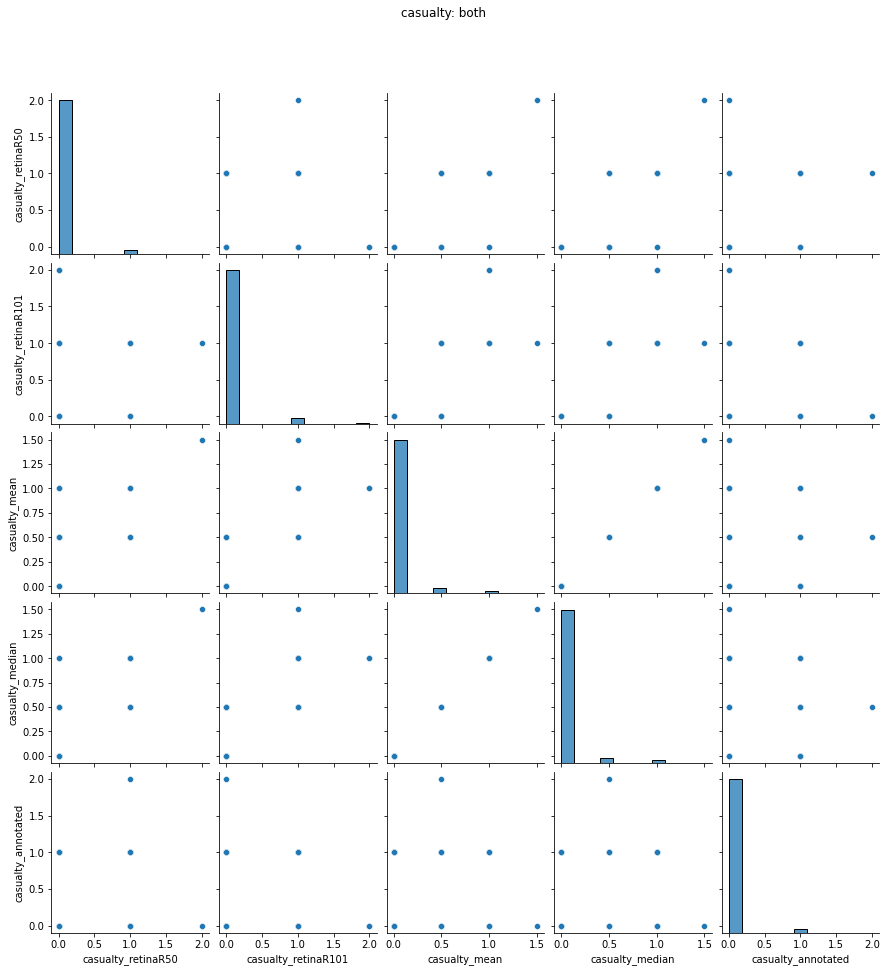

plotting female: both. Dim: (1007, 129)


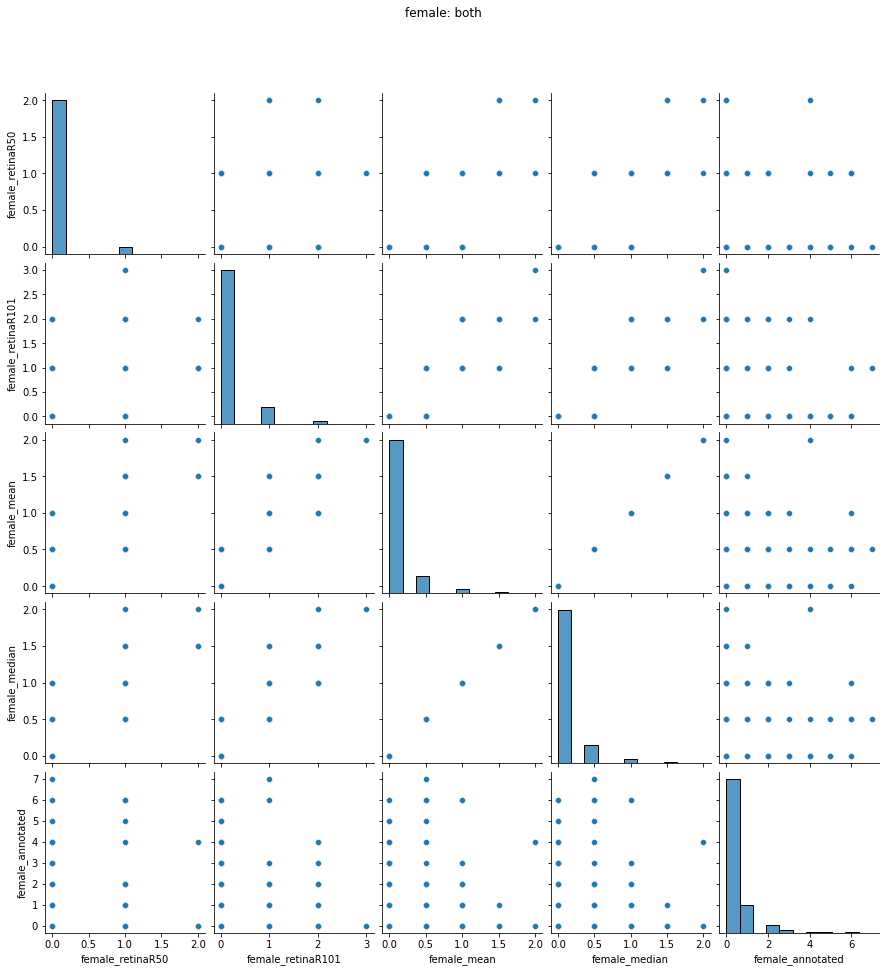

plotting militaryVehicle: both. Dim: (1007, 129)


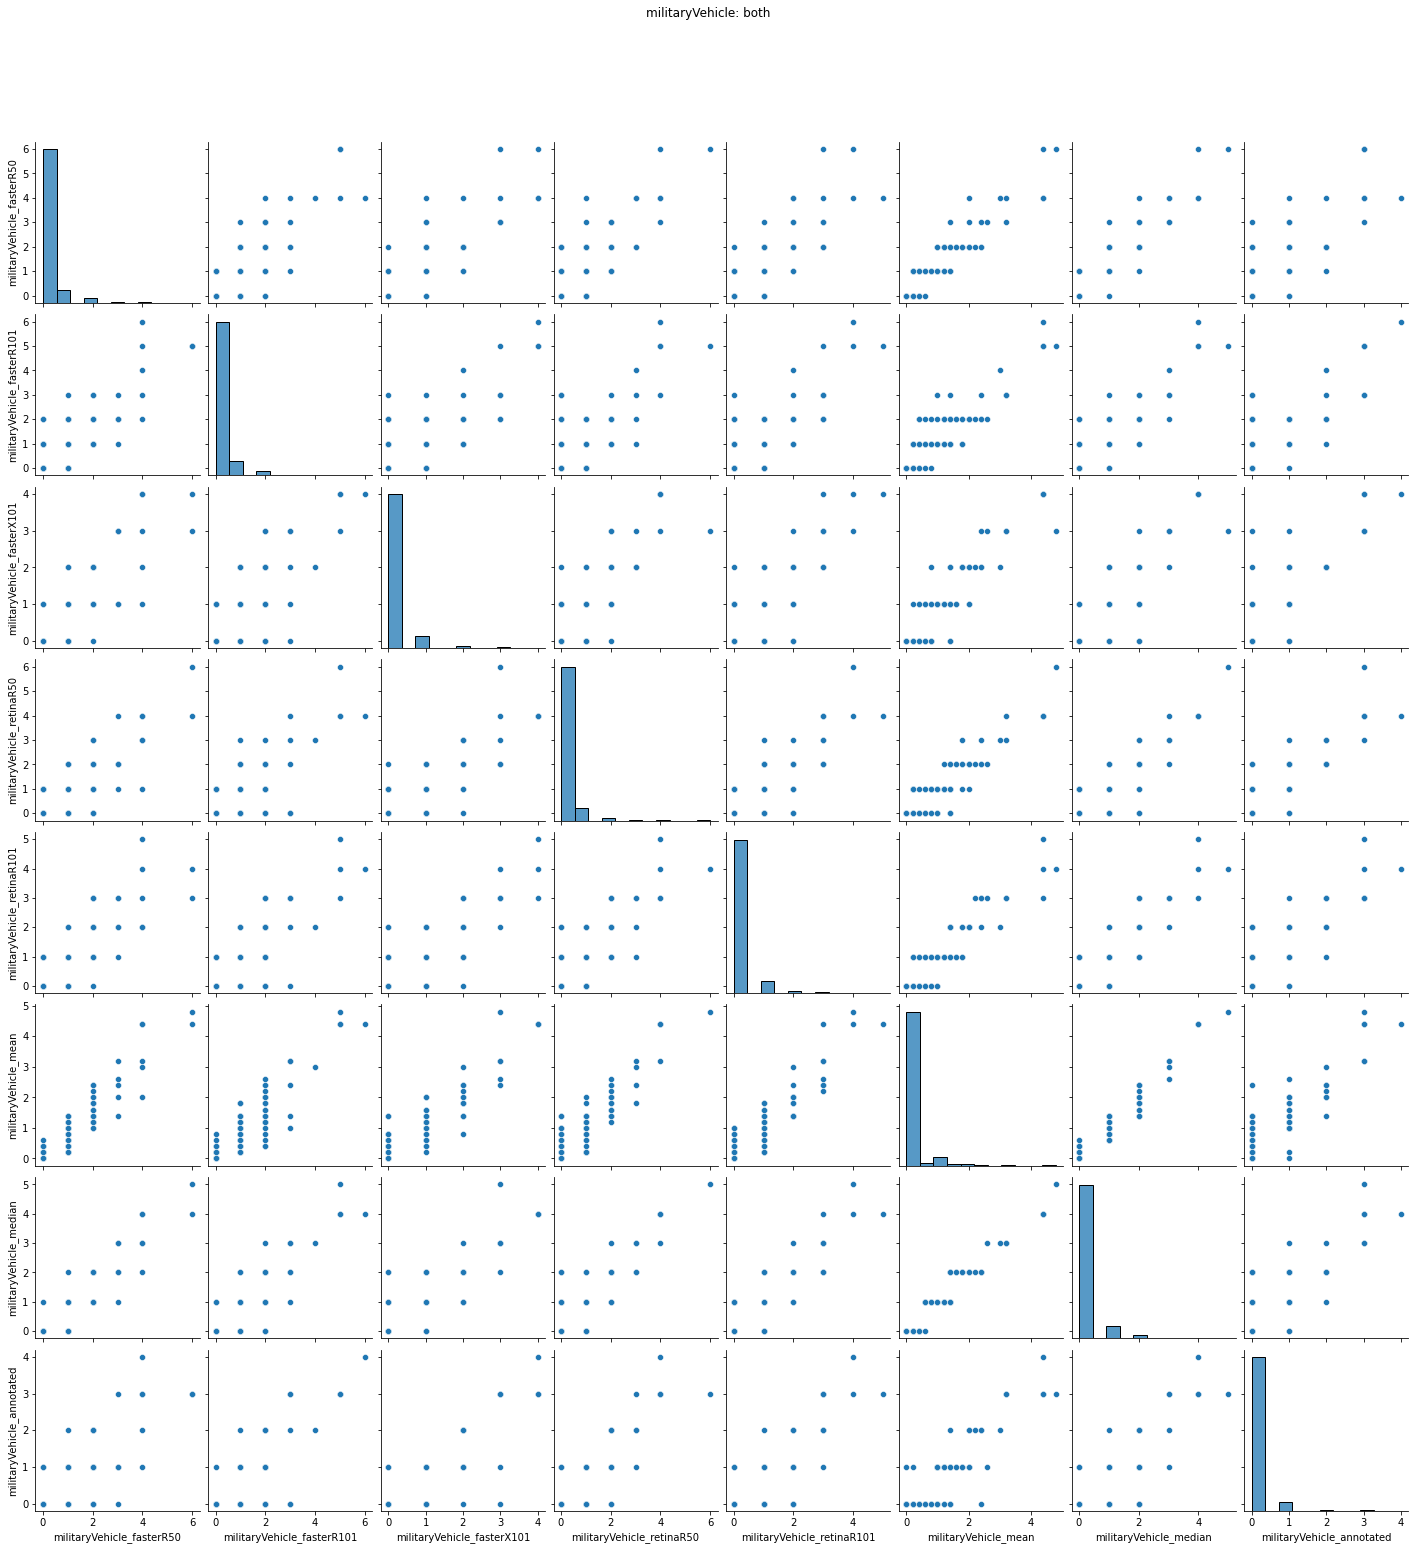

plotting child: both. Dim: (1007, 129)


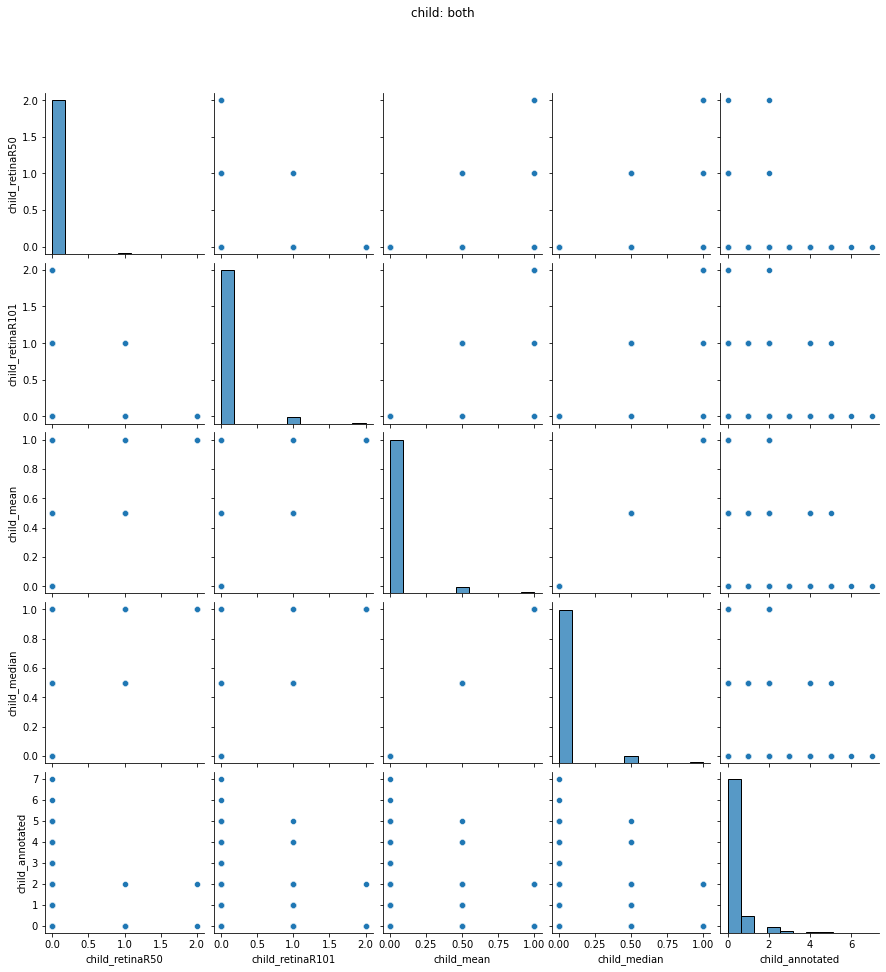

plotting bloodedArea: both. Dim: (1007, 129)


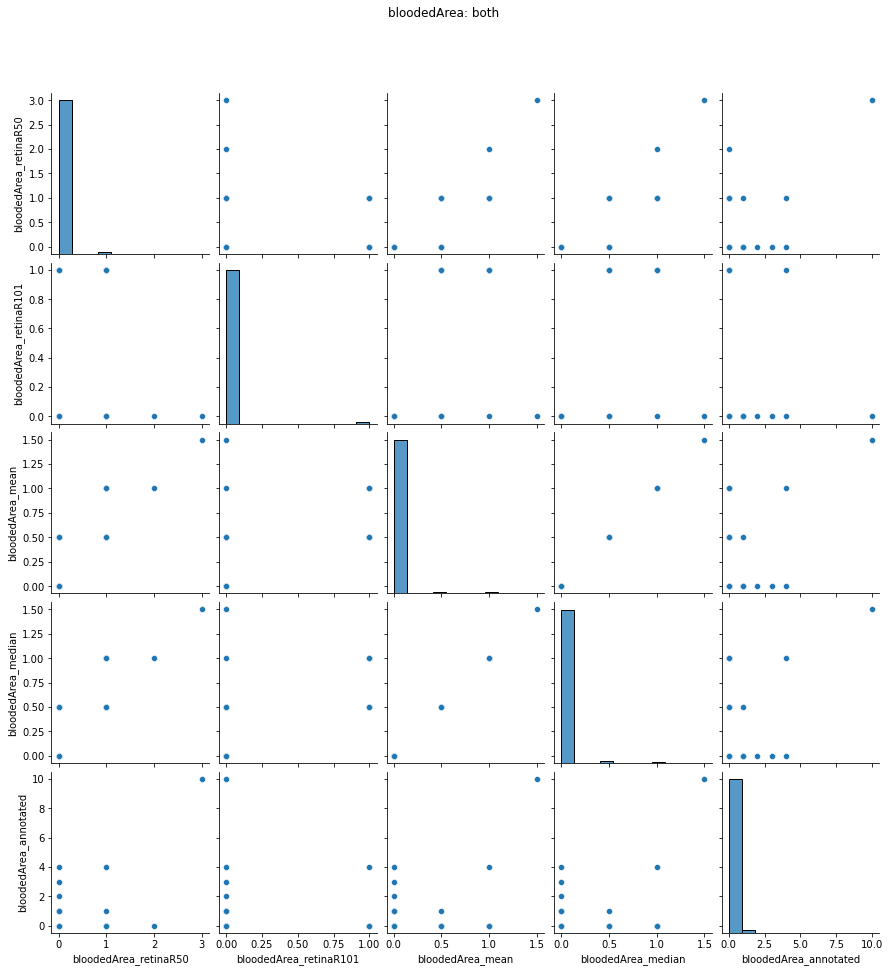

plotting religiousGarmentFemale: both. Dim: (1007, 129)


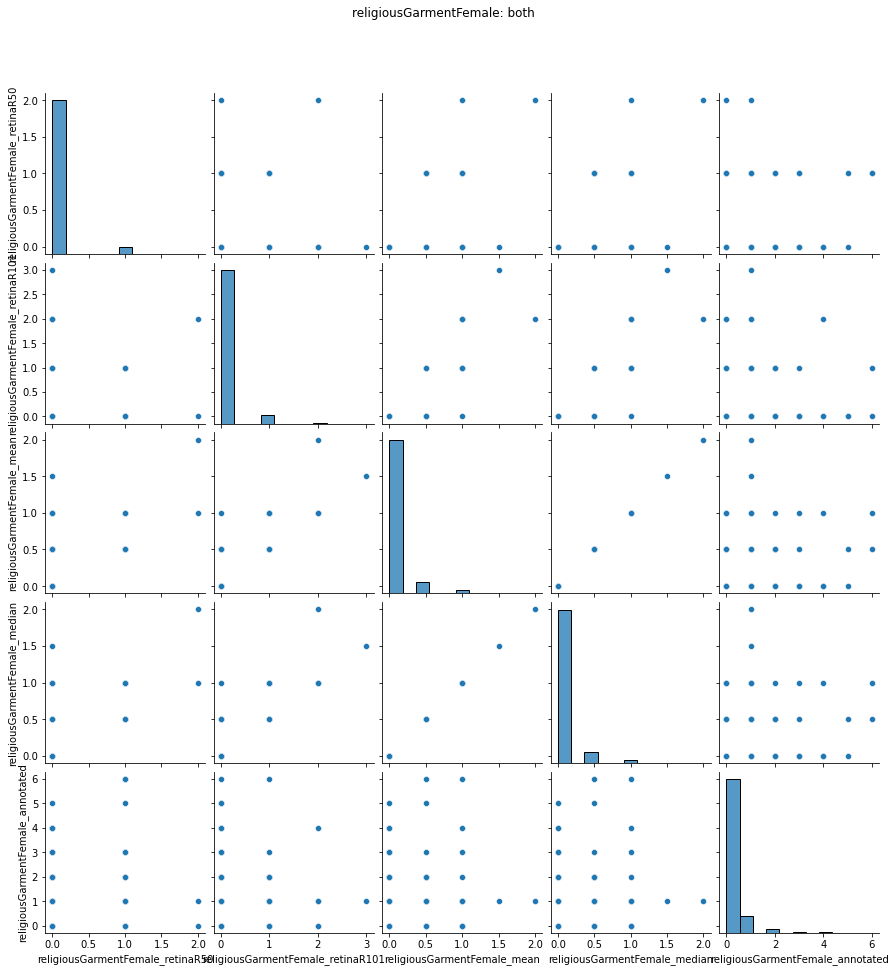

plotting elderly: both. Dim: (1007, 129)


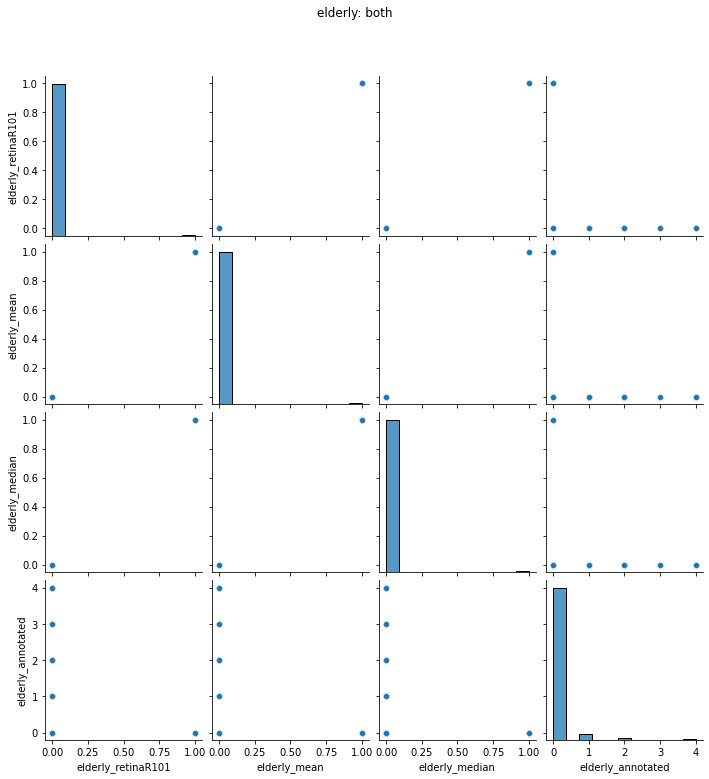

plotting male: both. Dim: (1007, 129)


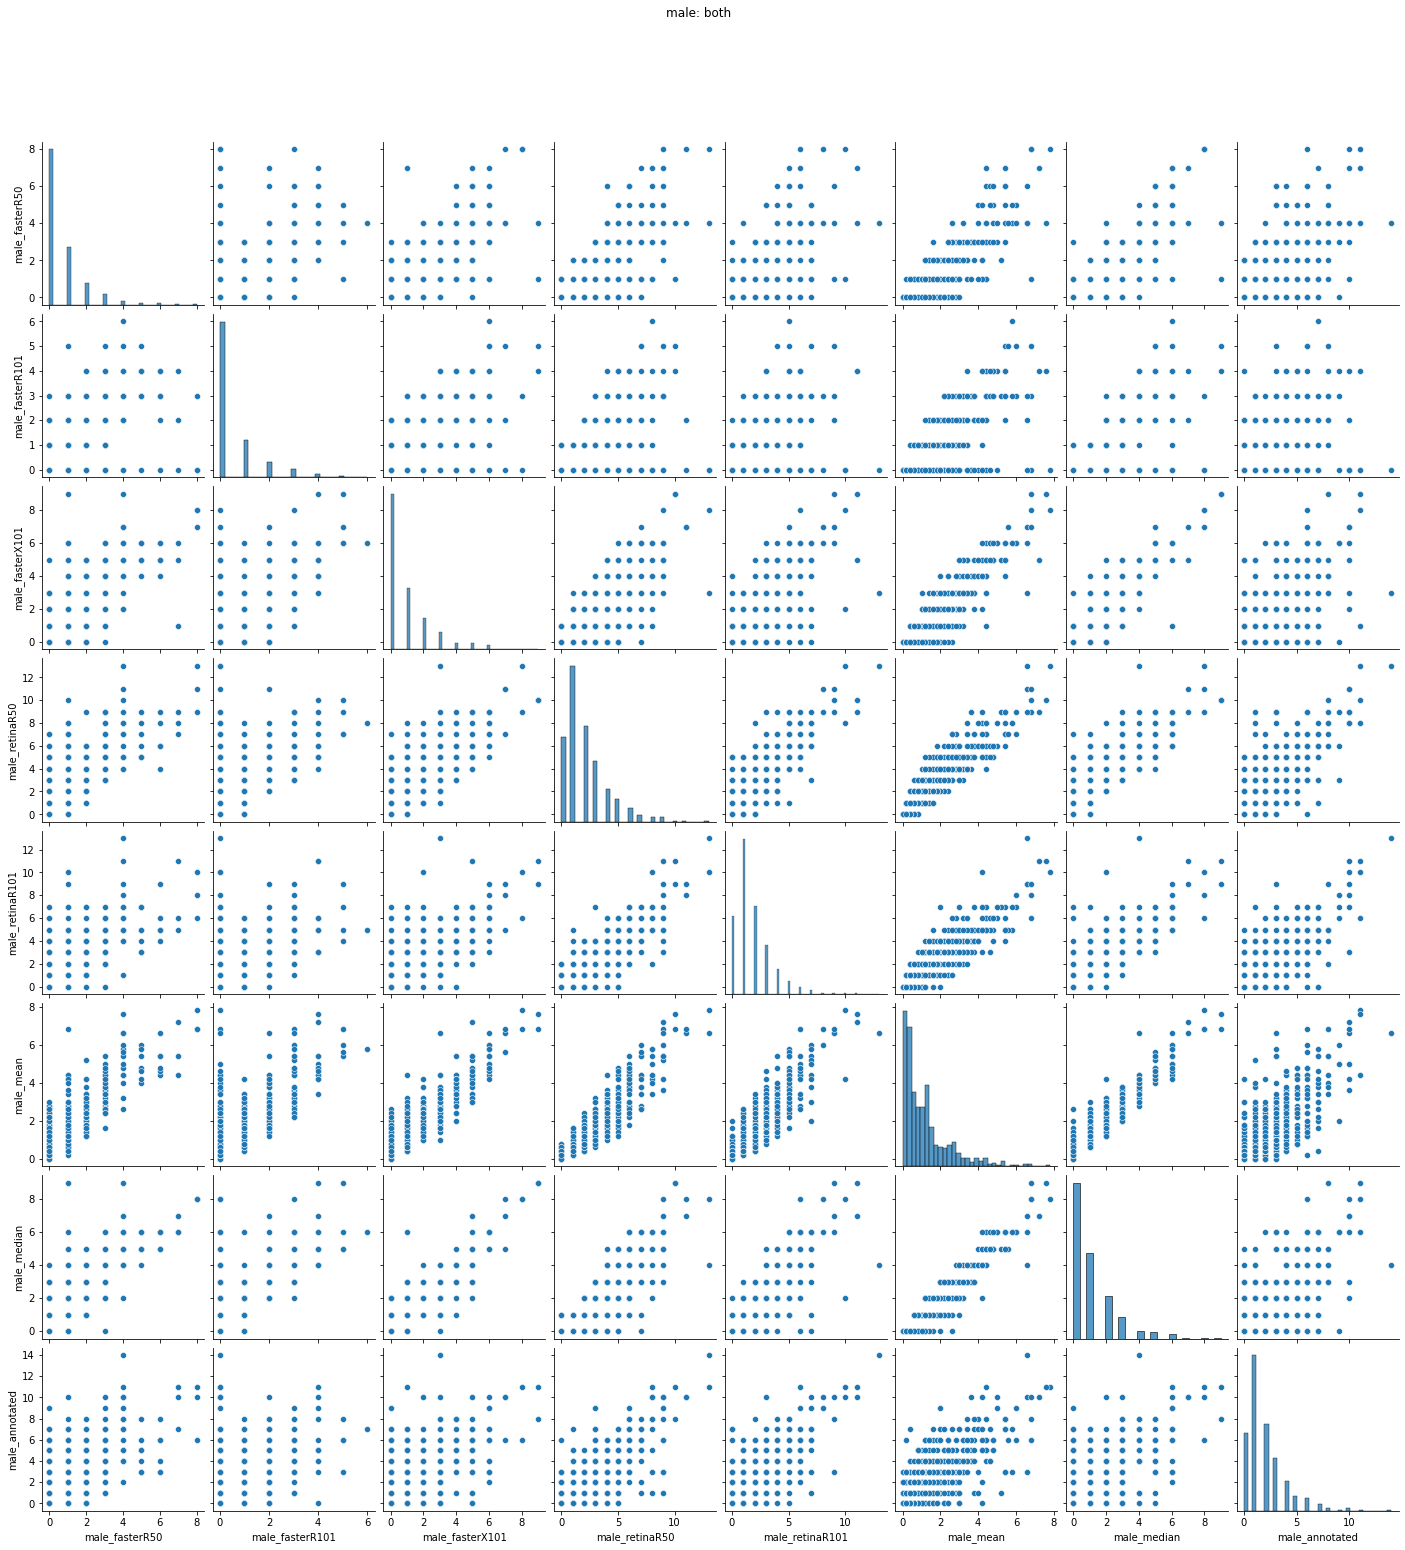

plotting flagUS: both. Dim: (1007, 129)


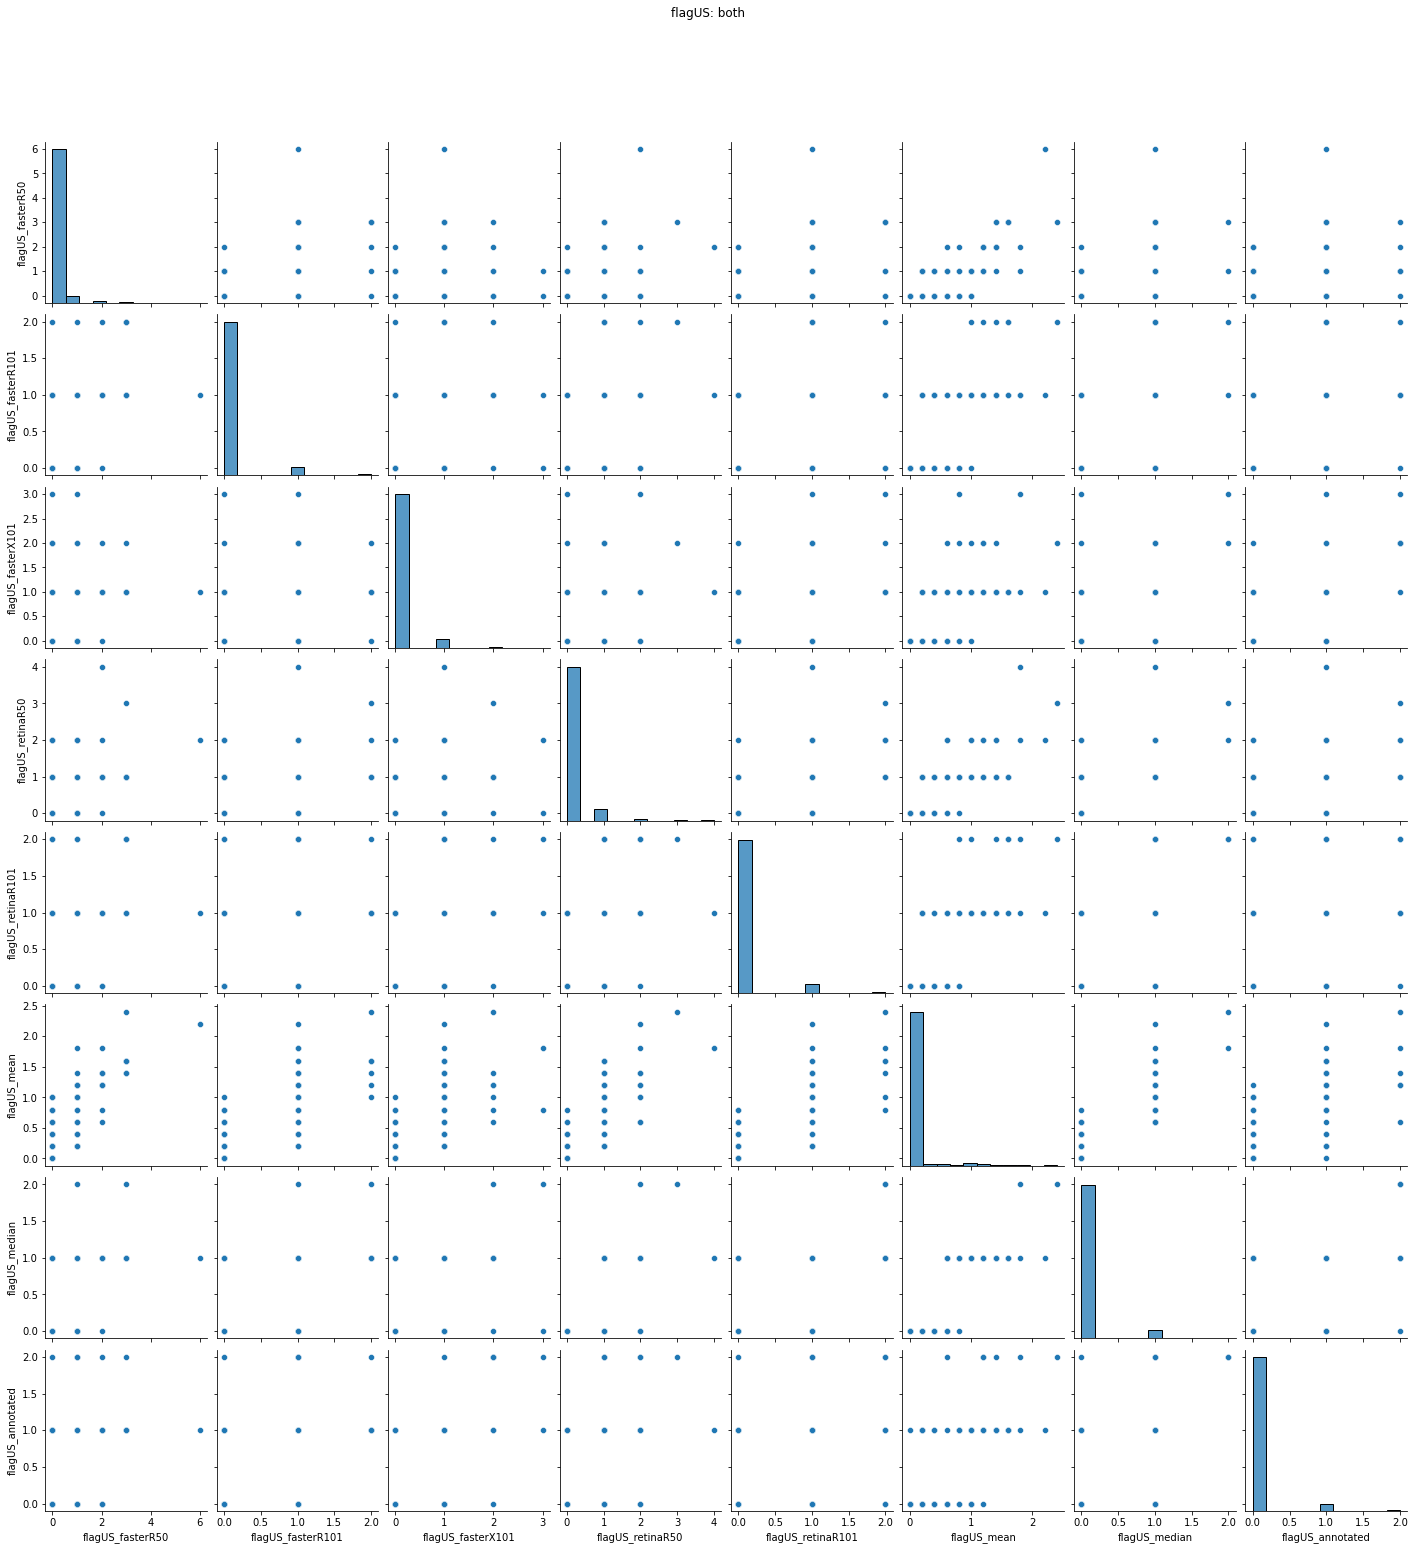

plotting person: both. Dim: (1007, 129)


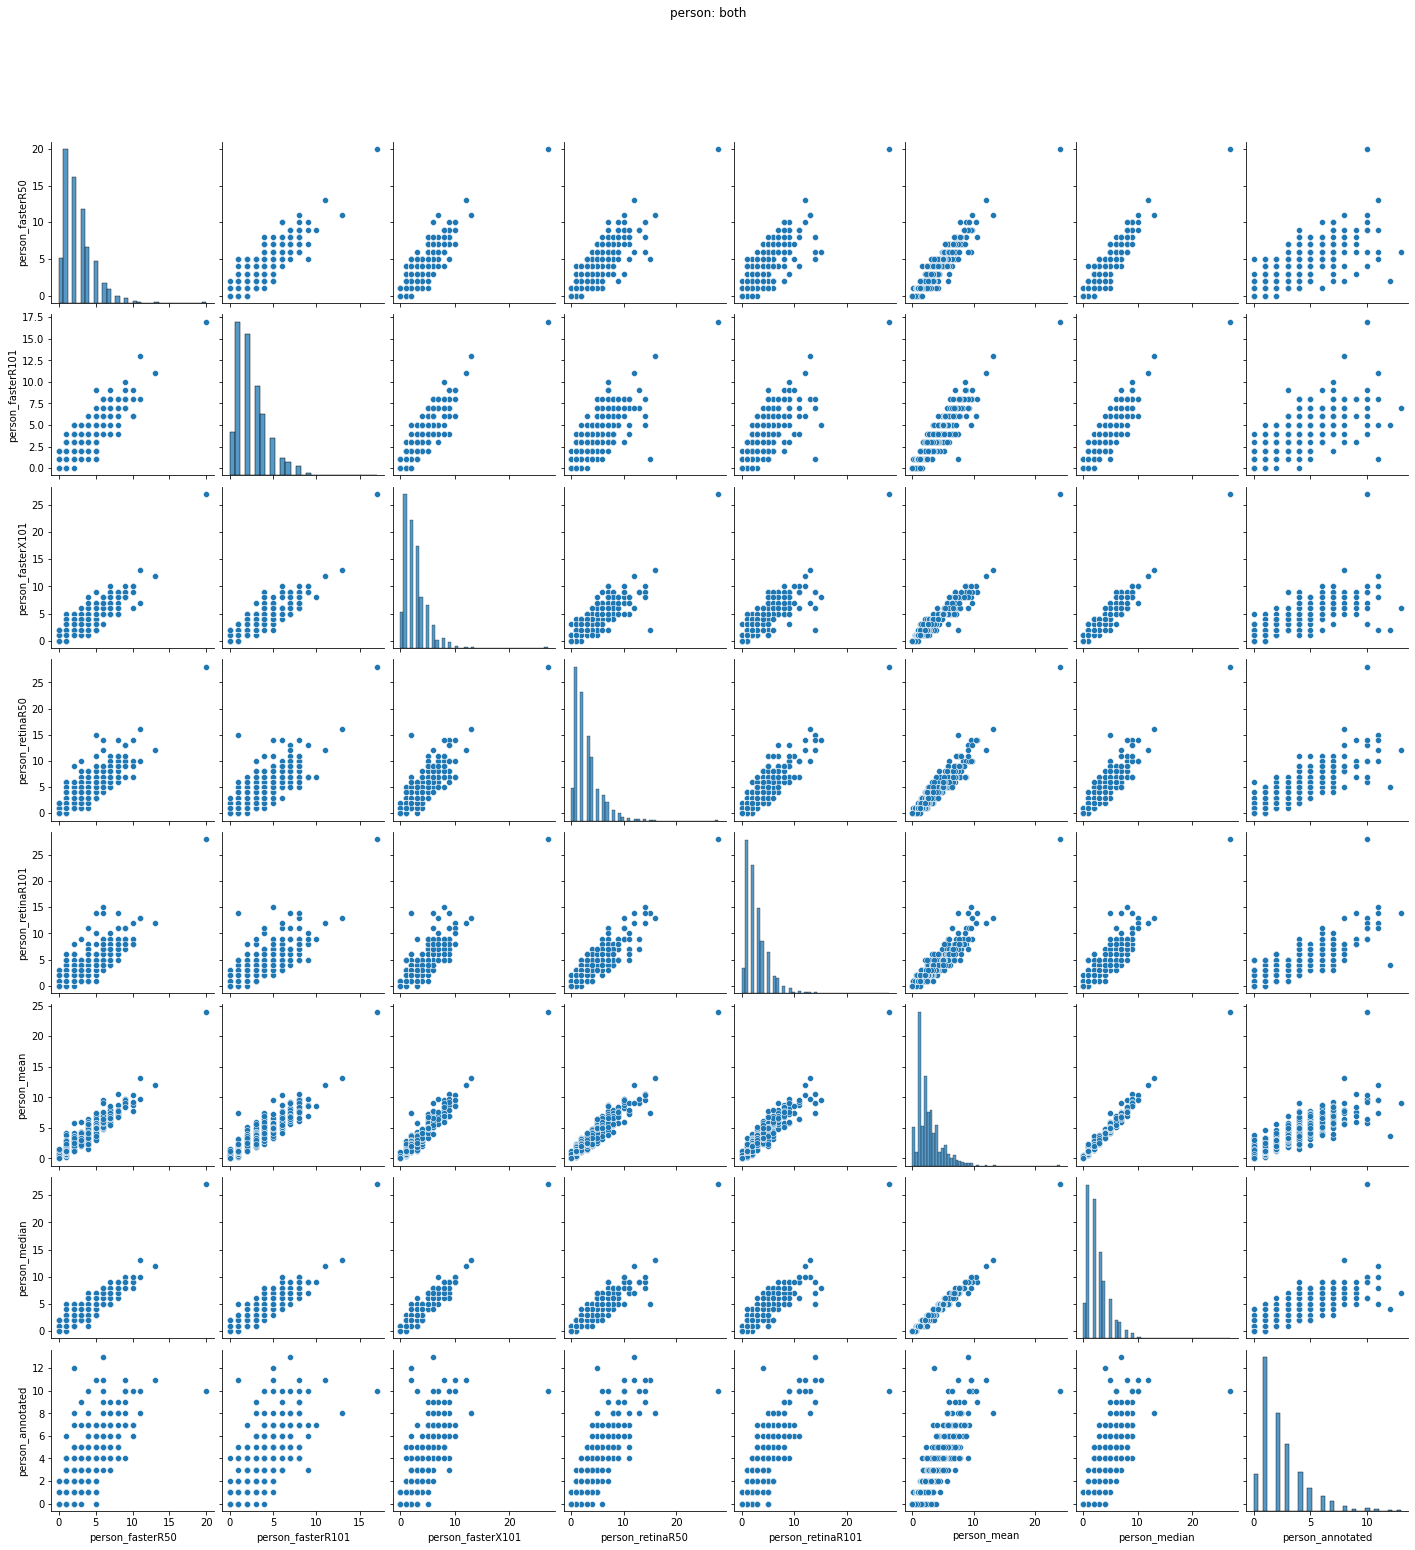

plotting firearm: train. Dim: (805, 129)


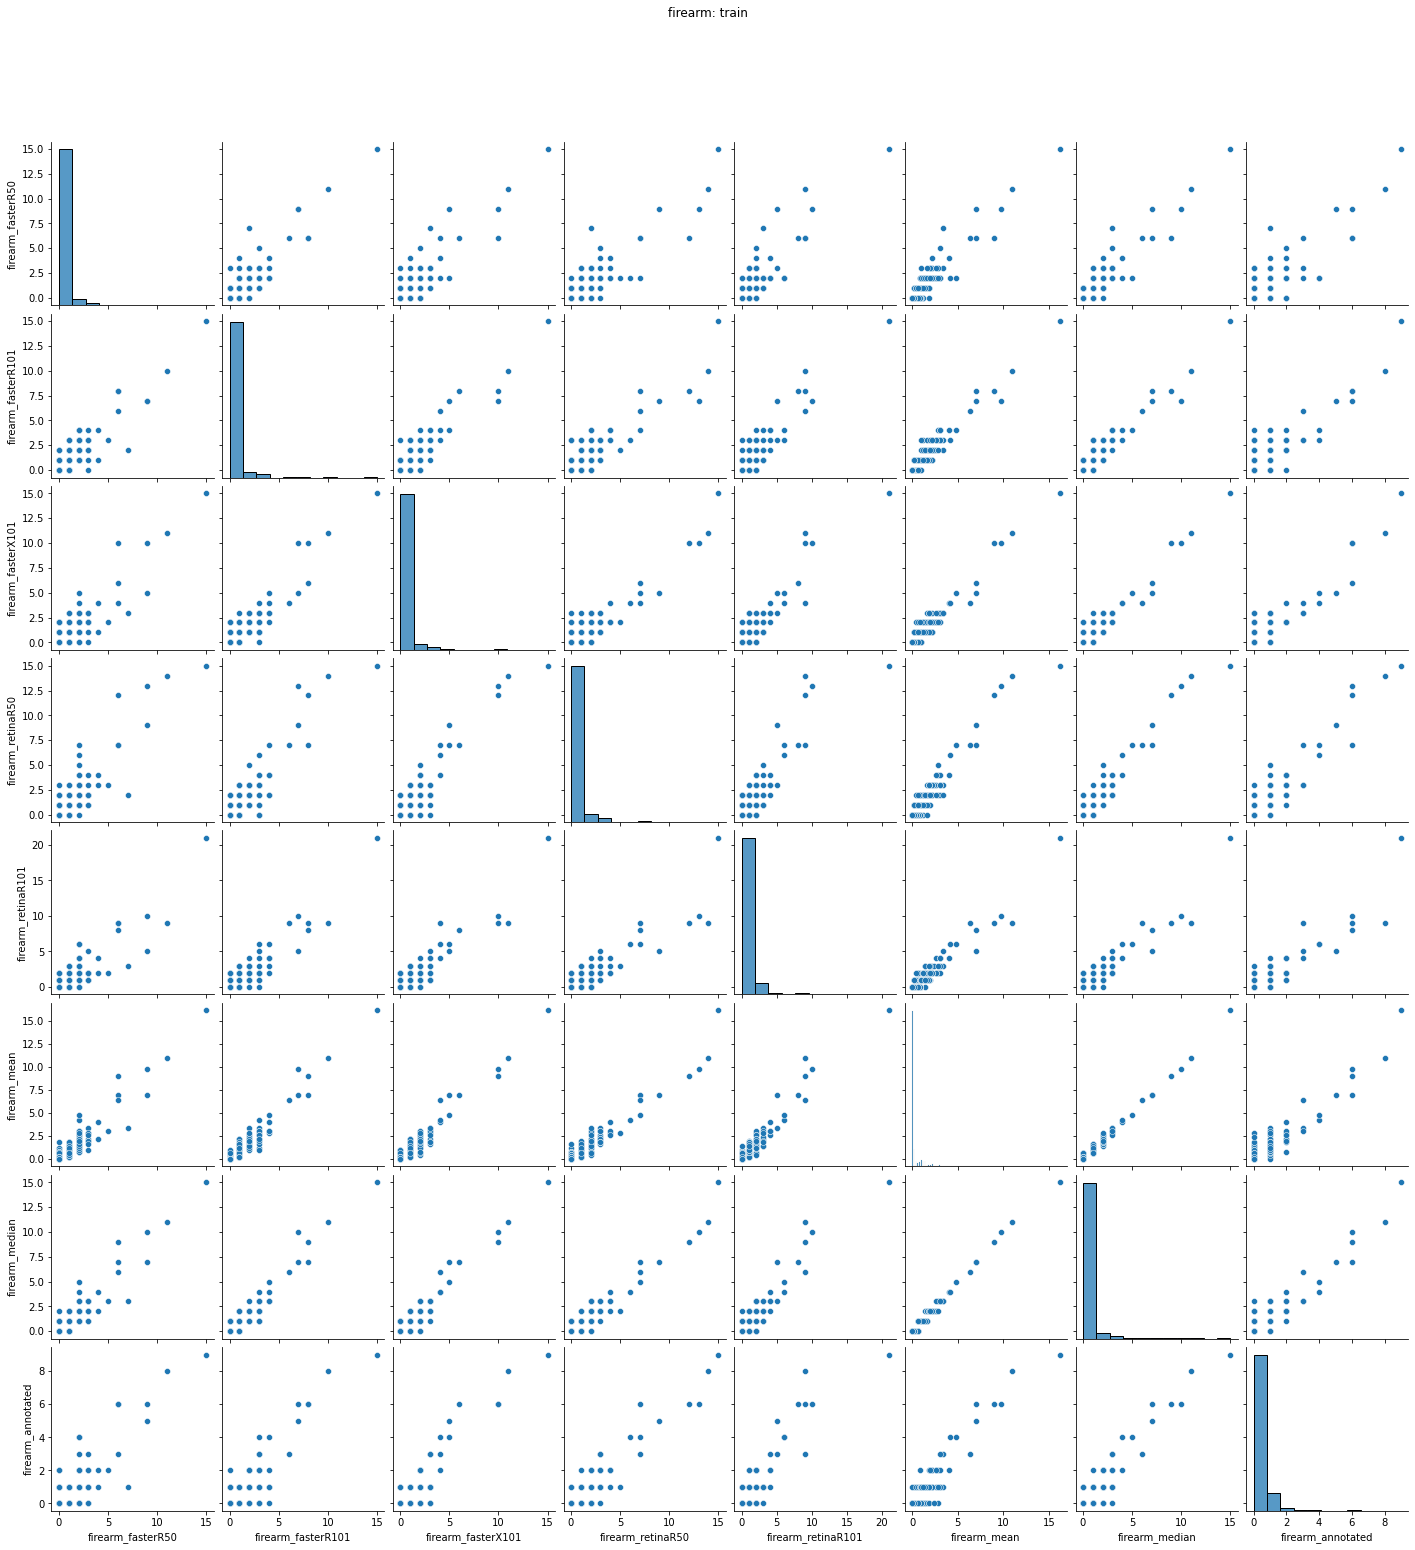

plotting youth: train. Dim: (805, 129)


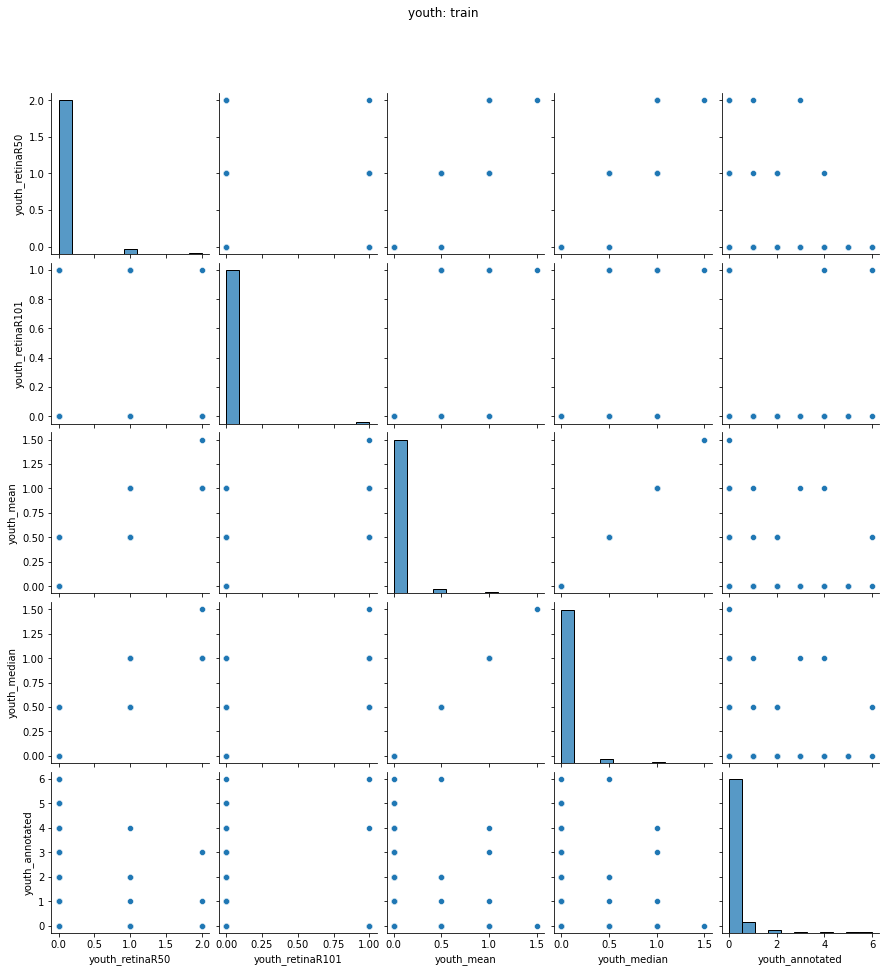

plotting adult: train. Dim: (805, 129)


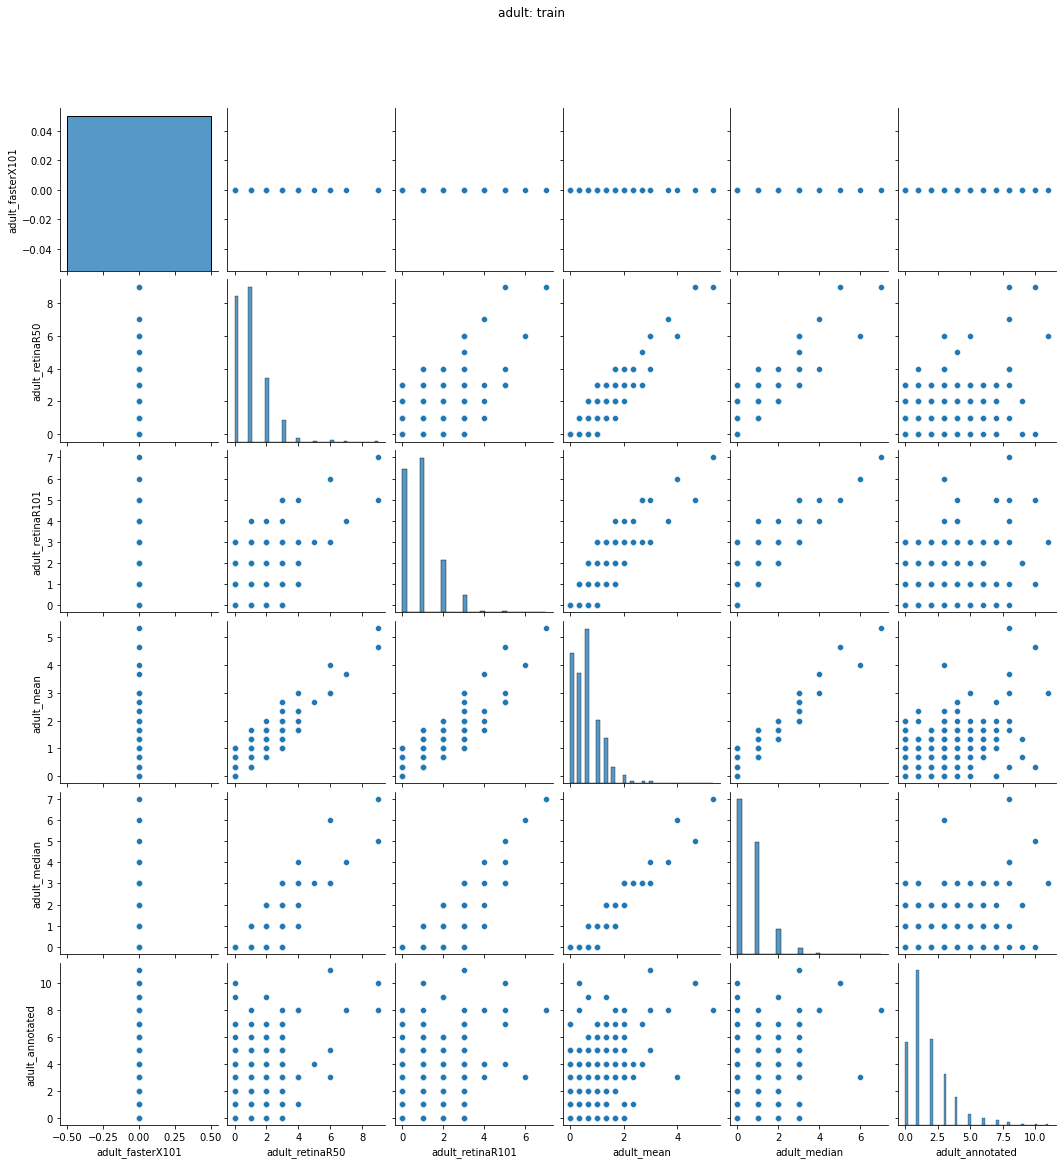

plotting hostage: train. Dim: (805, 129)


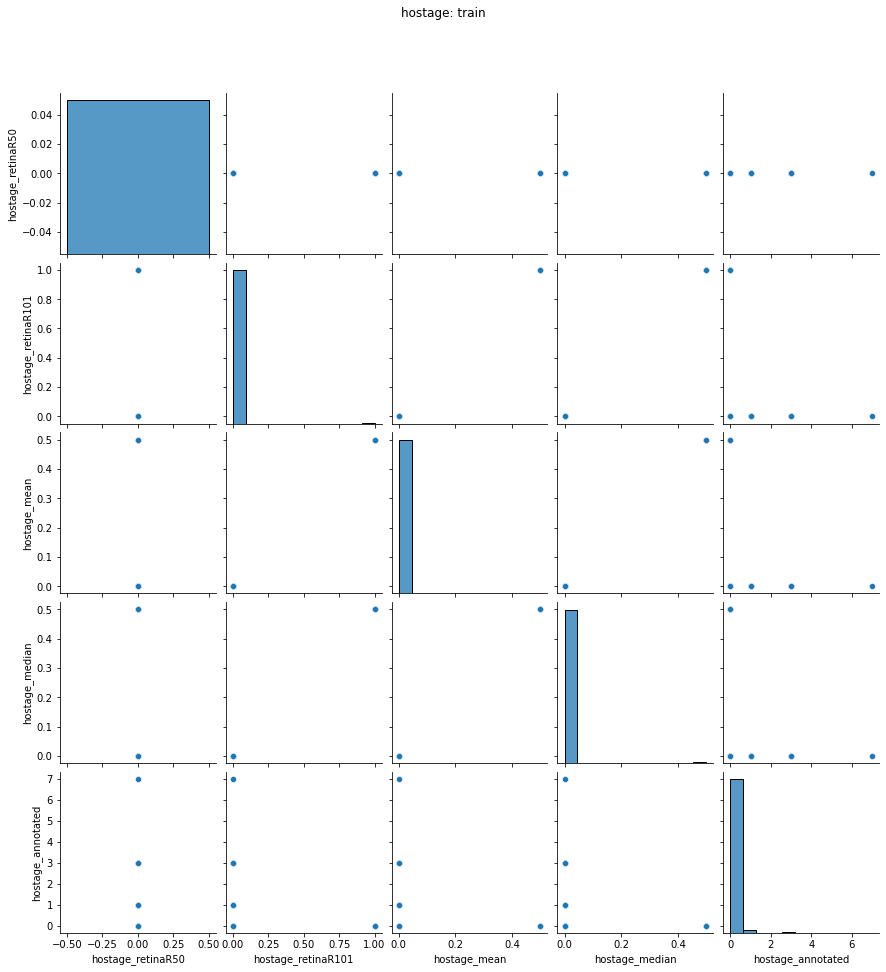

plotting falgIRQ: train. Dim: (805, 129)


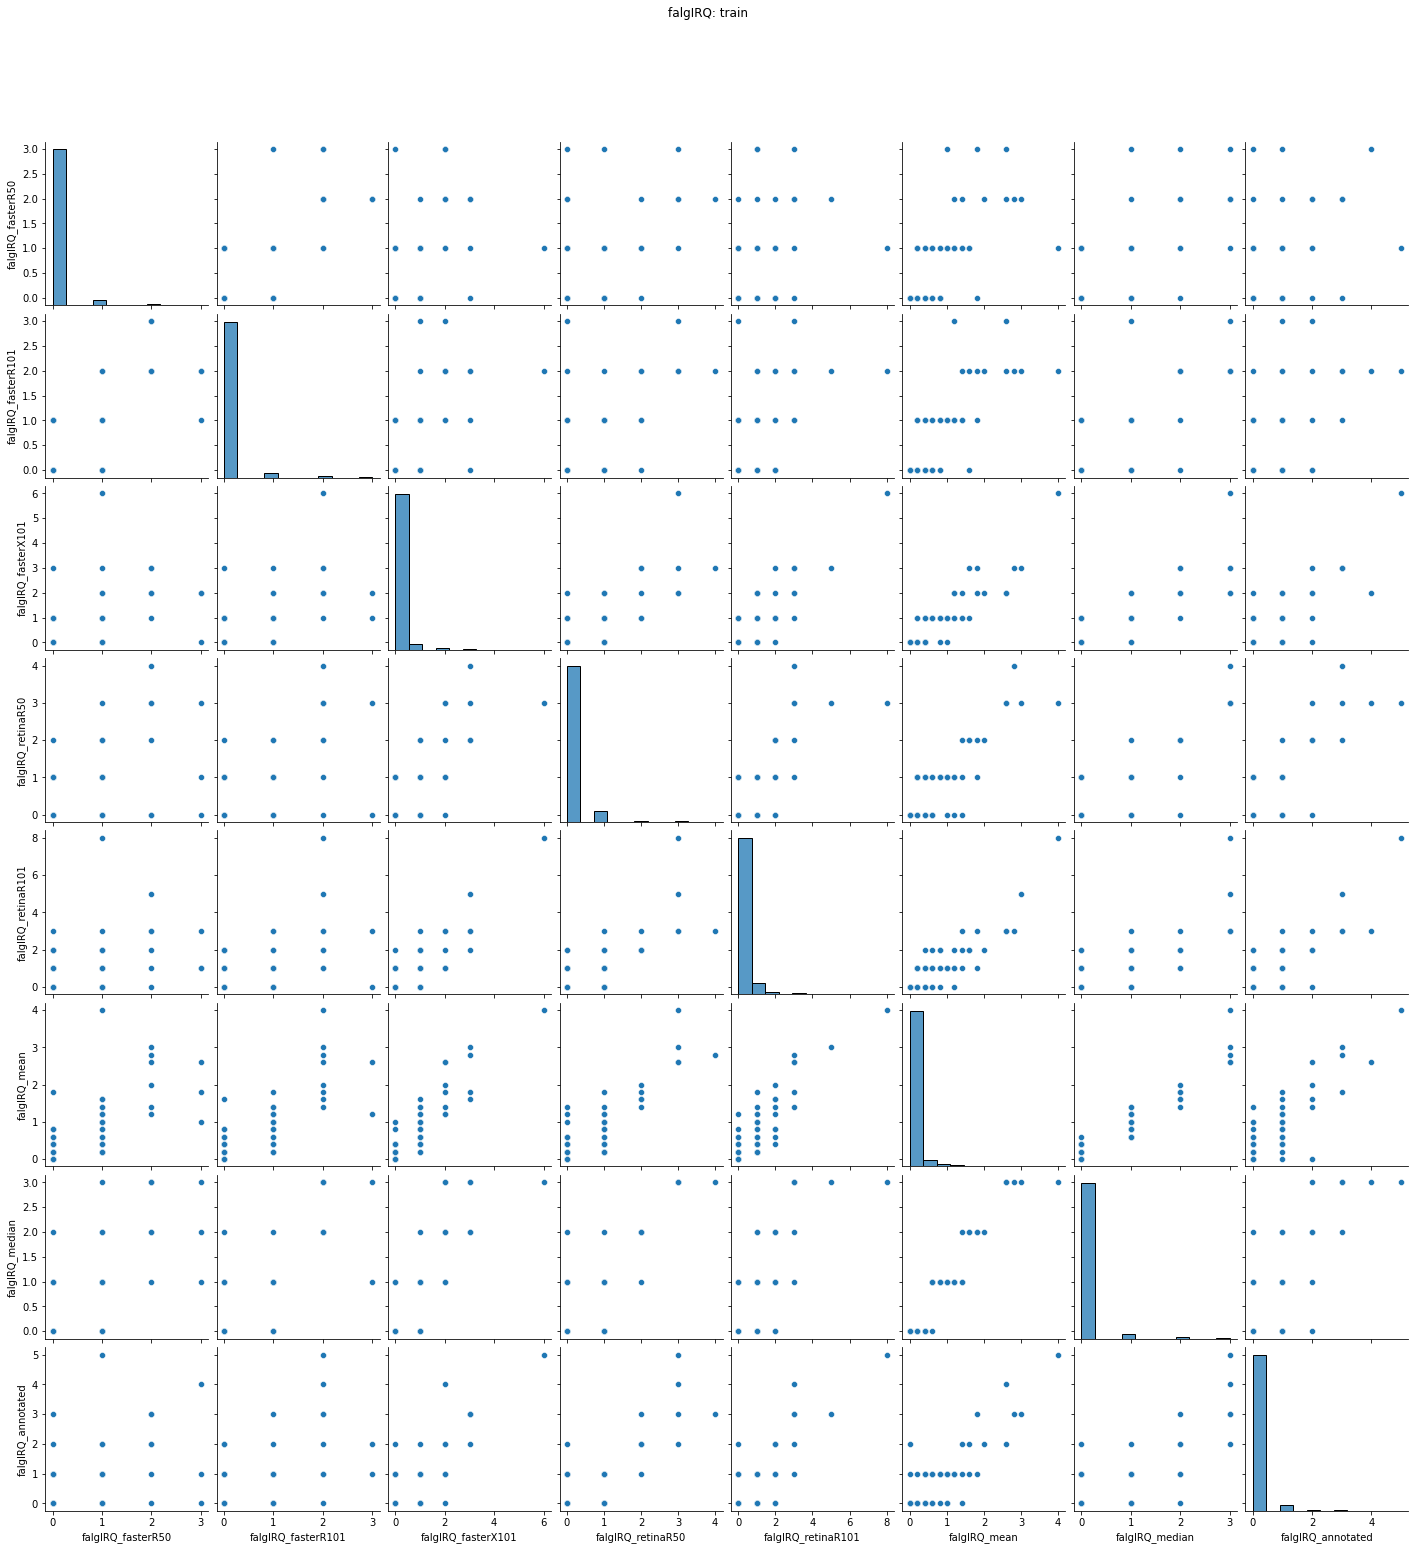

plotting uniformed: train. Dim: (805, 129)


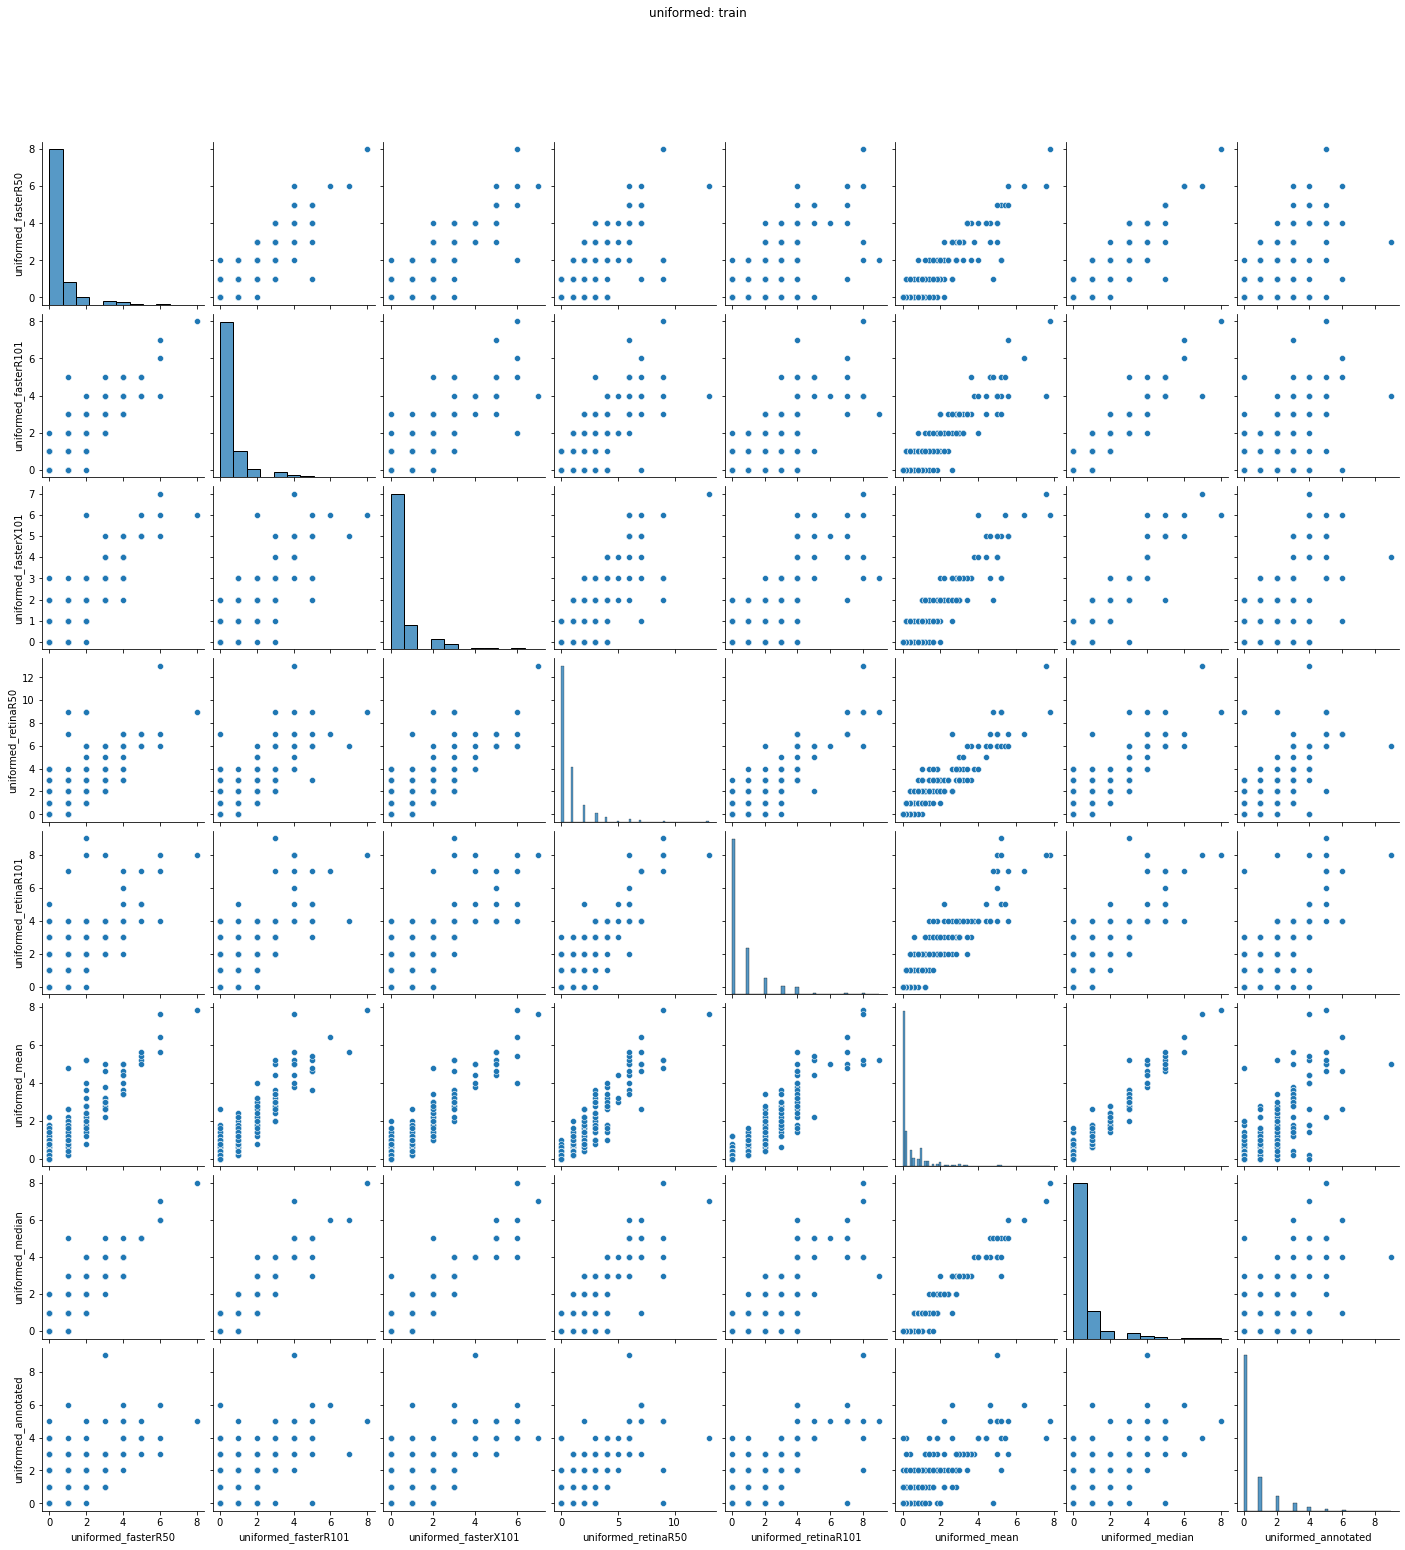

plotting casualty: train. Dim: (805, 129)


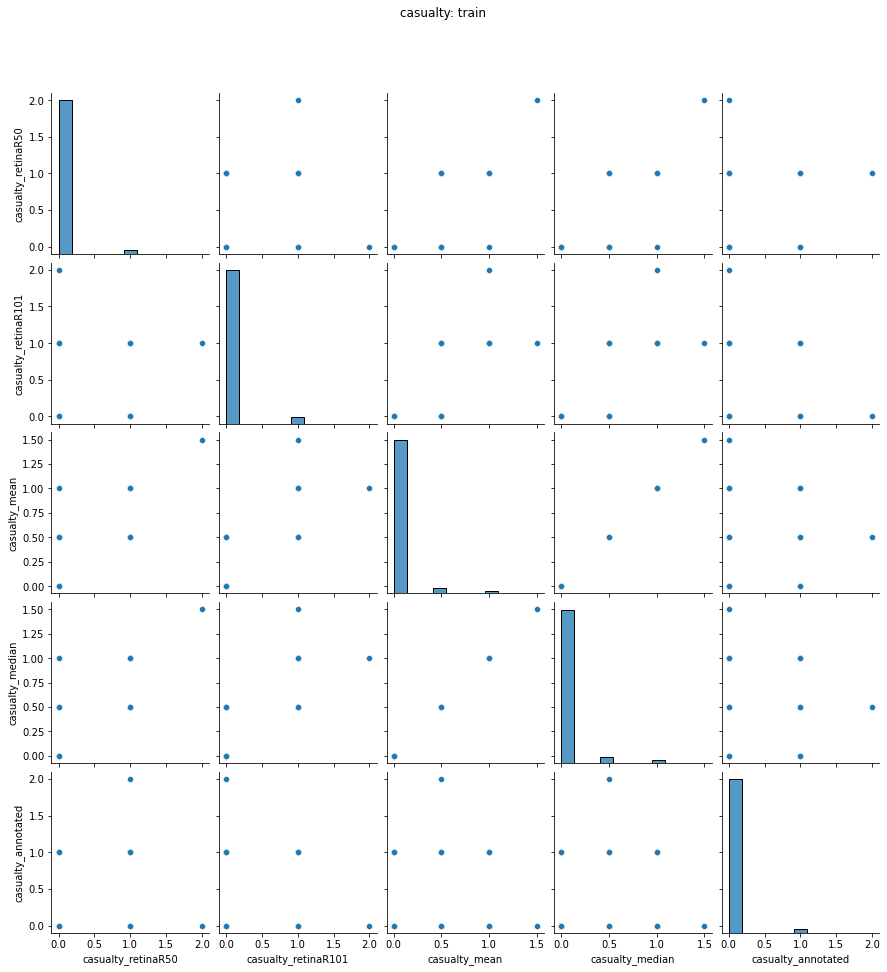

plotting female: train. Dim: (805, 129)


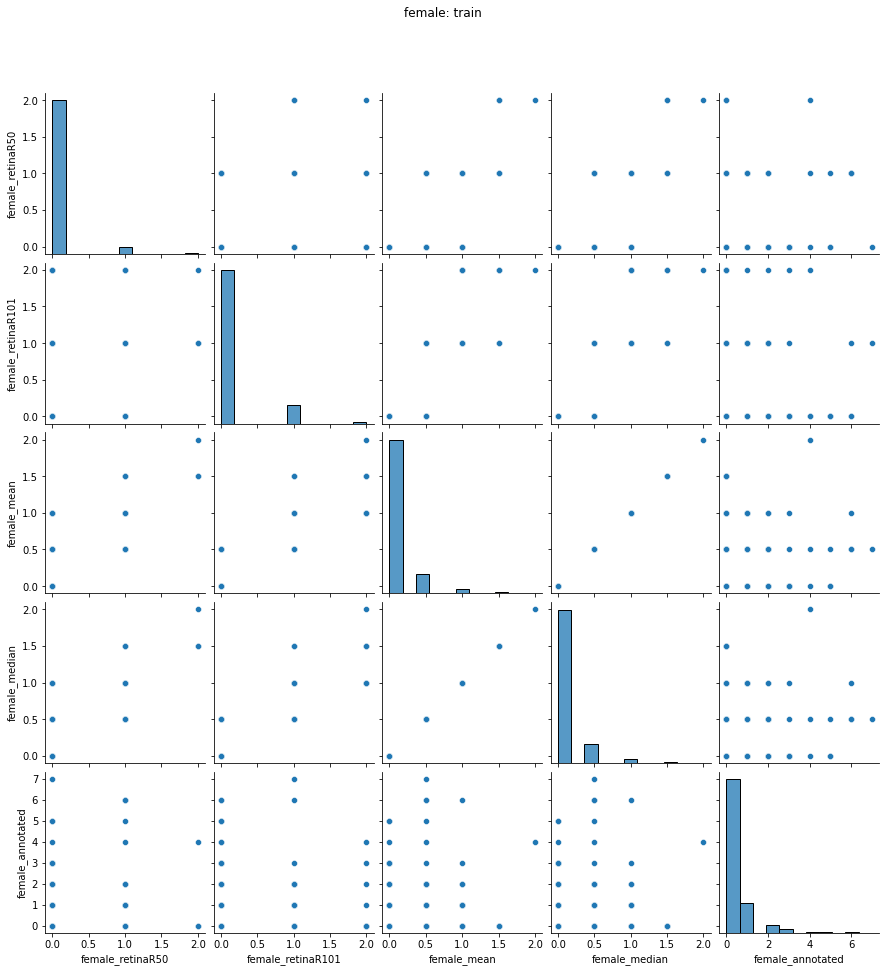

plotting militaryVehicle: train. Dim: (805, 129)


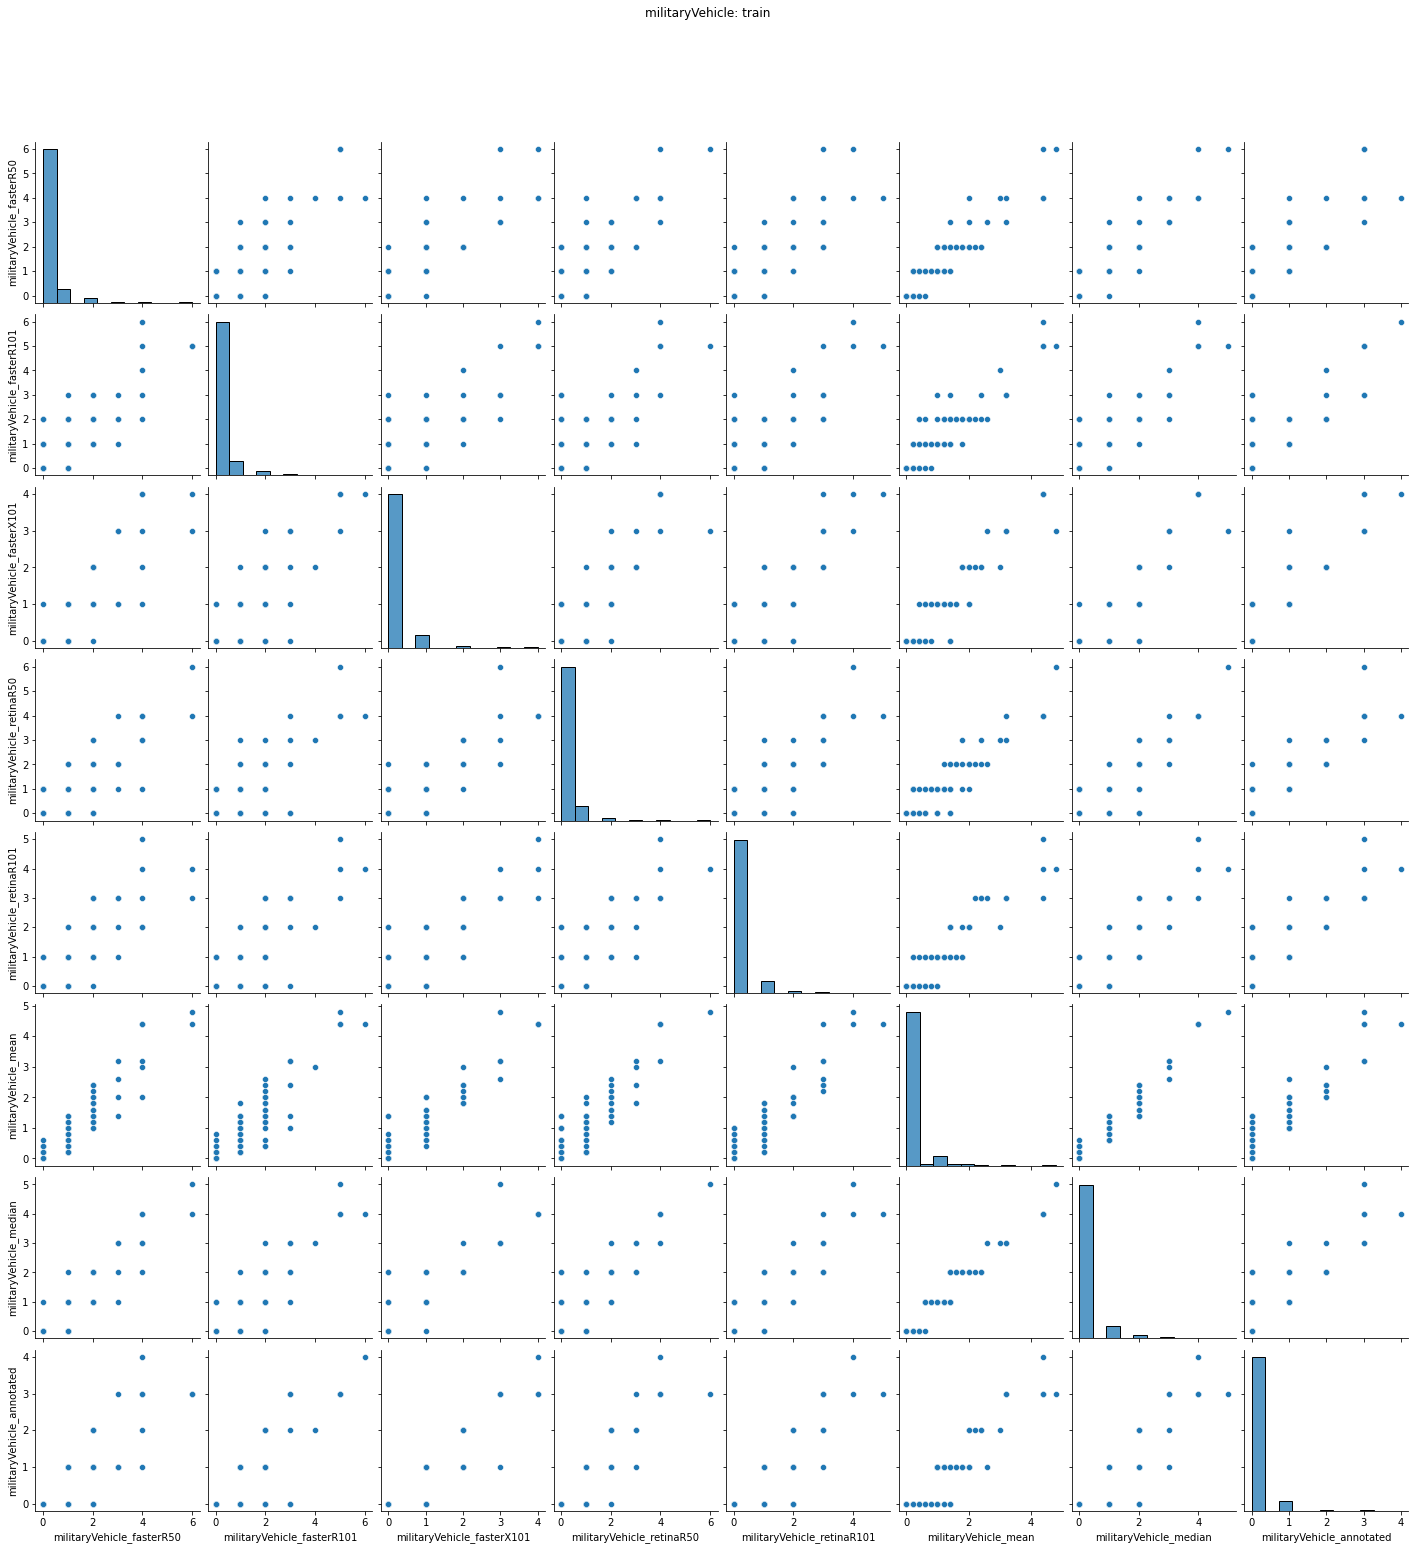

plotting child: train. Dim: (805, 129)


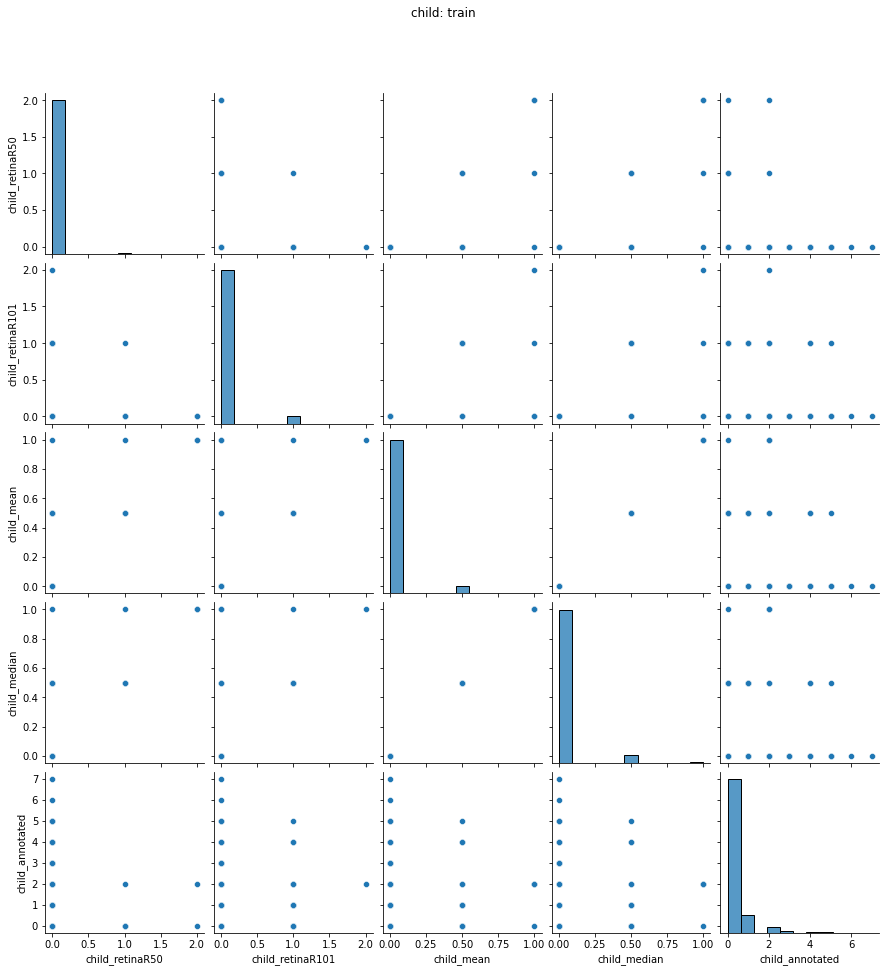

plotting bloodedArea: train. Dim: (805, 129)


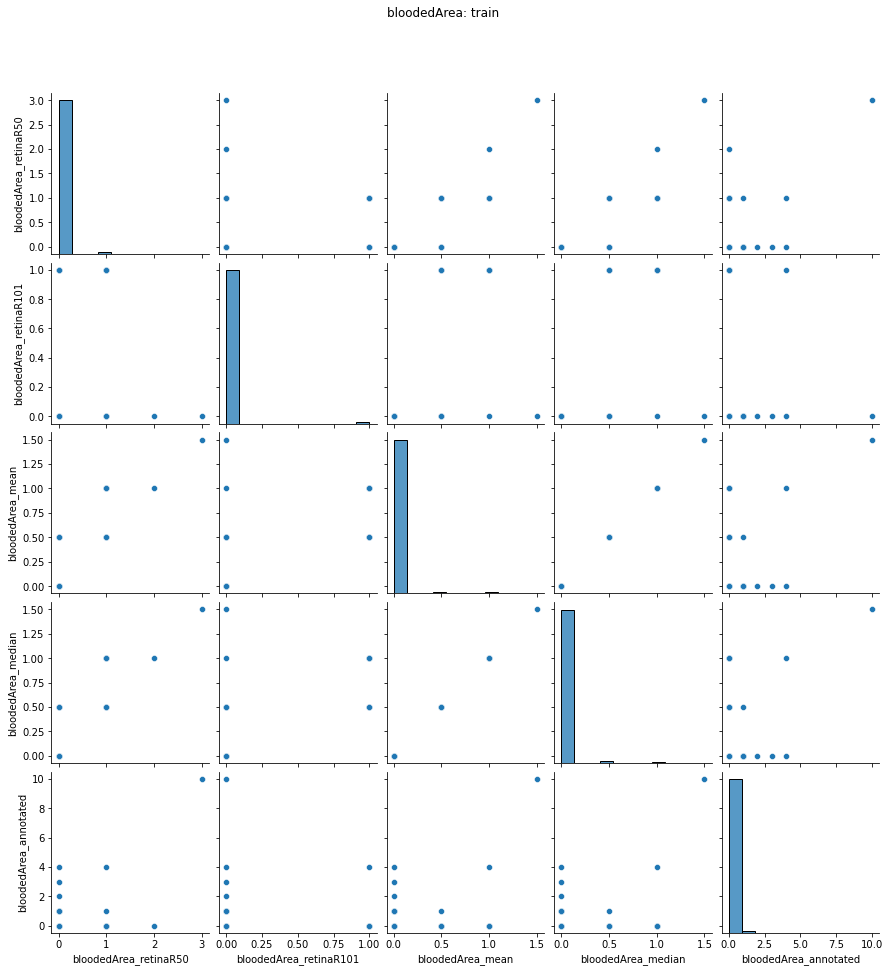

plotting religiousGarmentFemale: train. Dim: (805, 129)


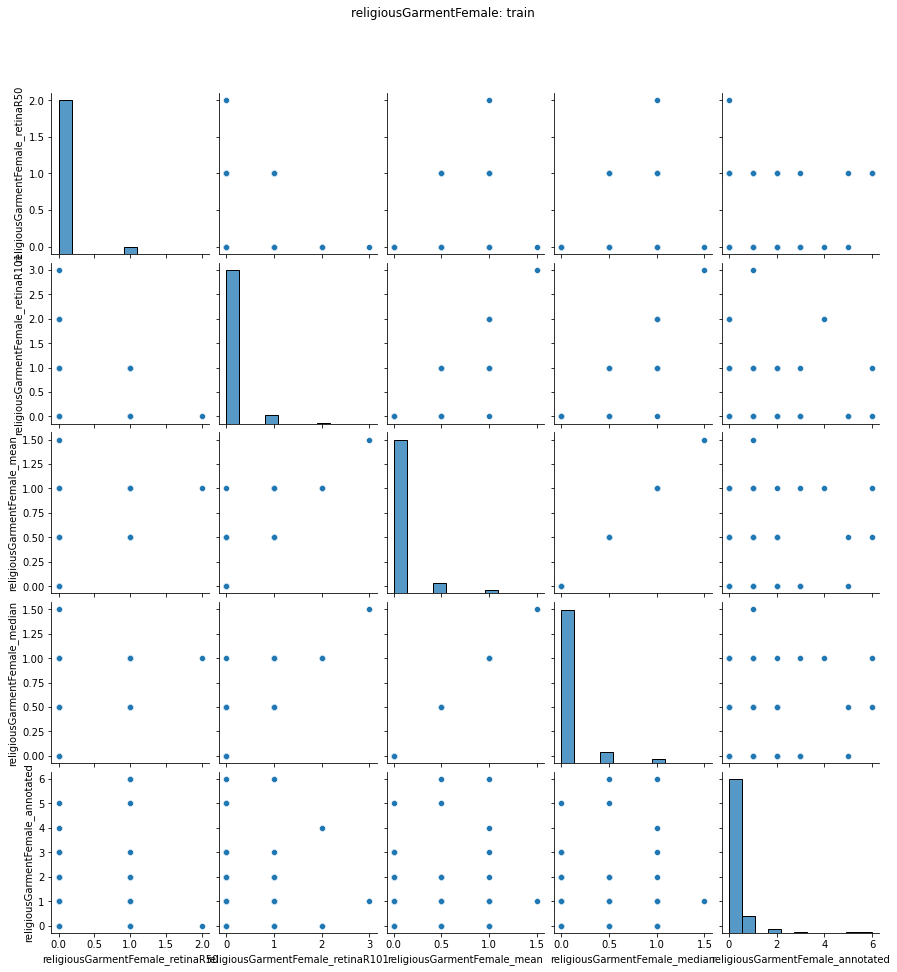

plotting elderly: train. Dim: (805, 129)


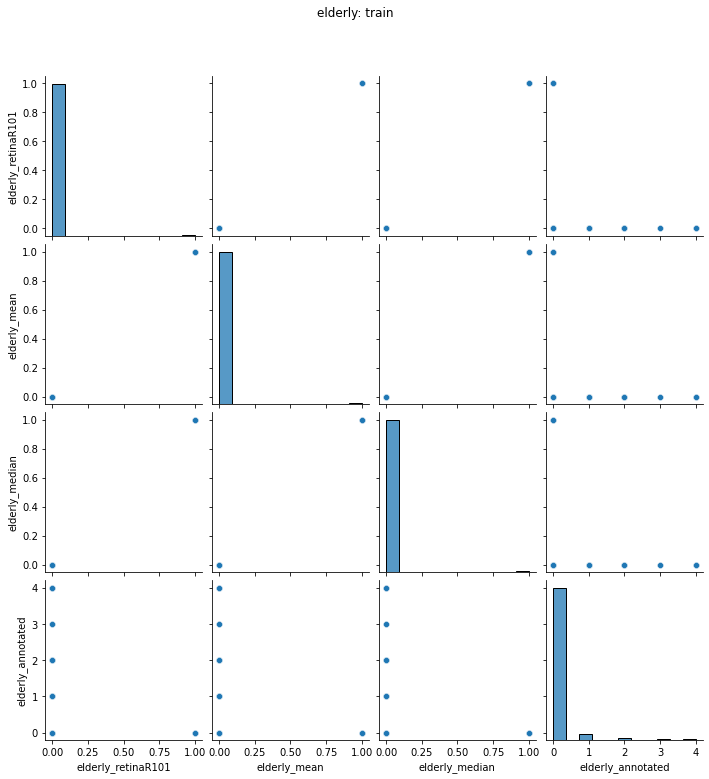

plotting male: train. Dim: (805, 129)


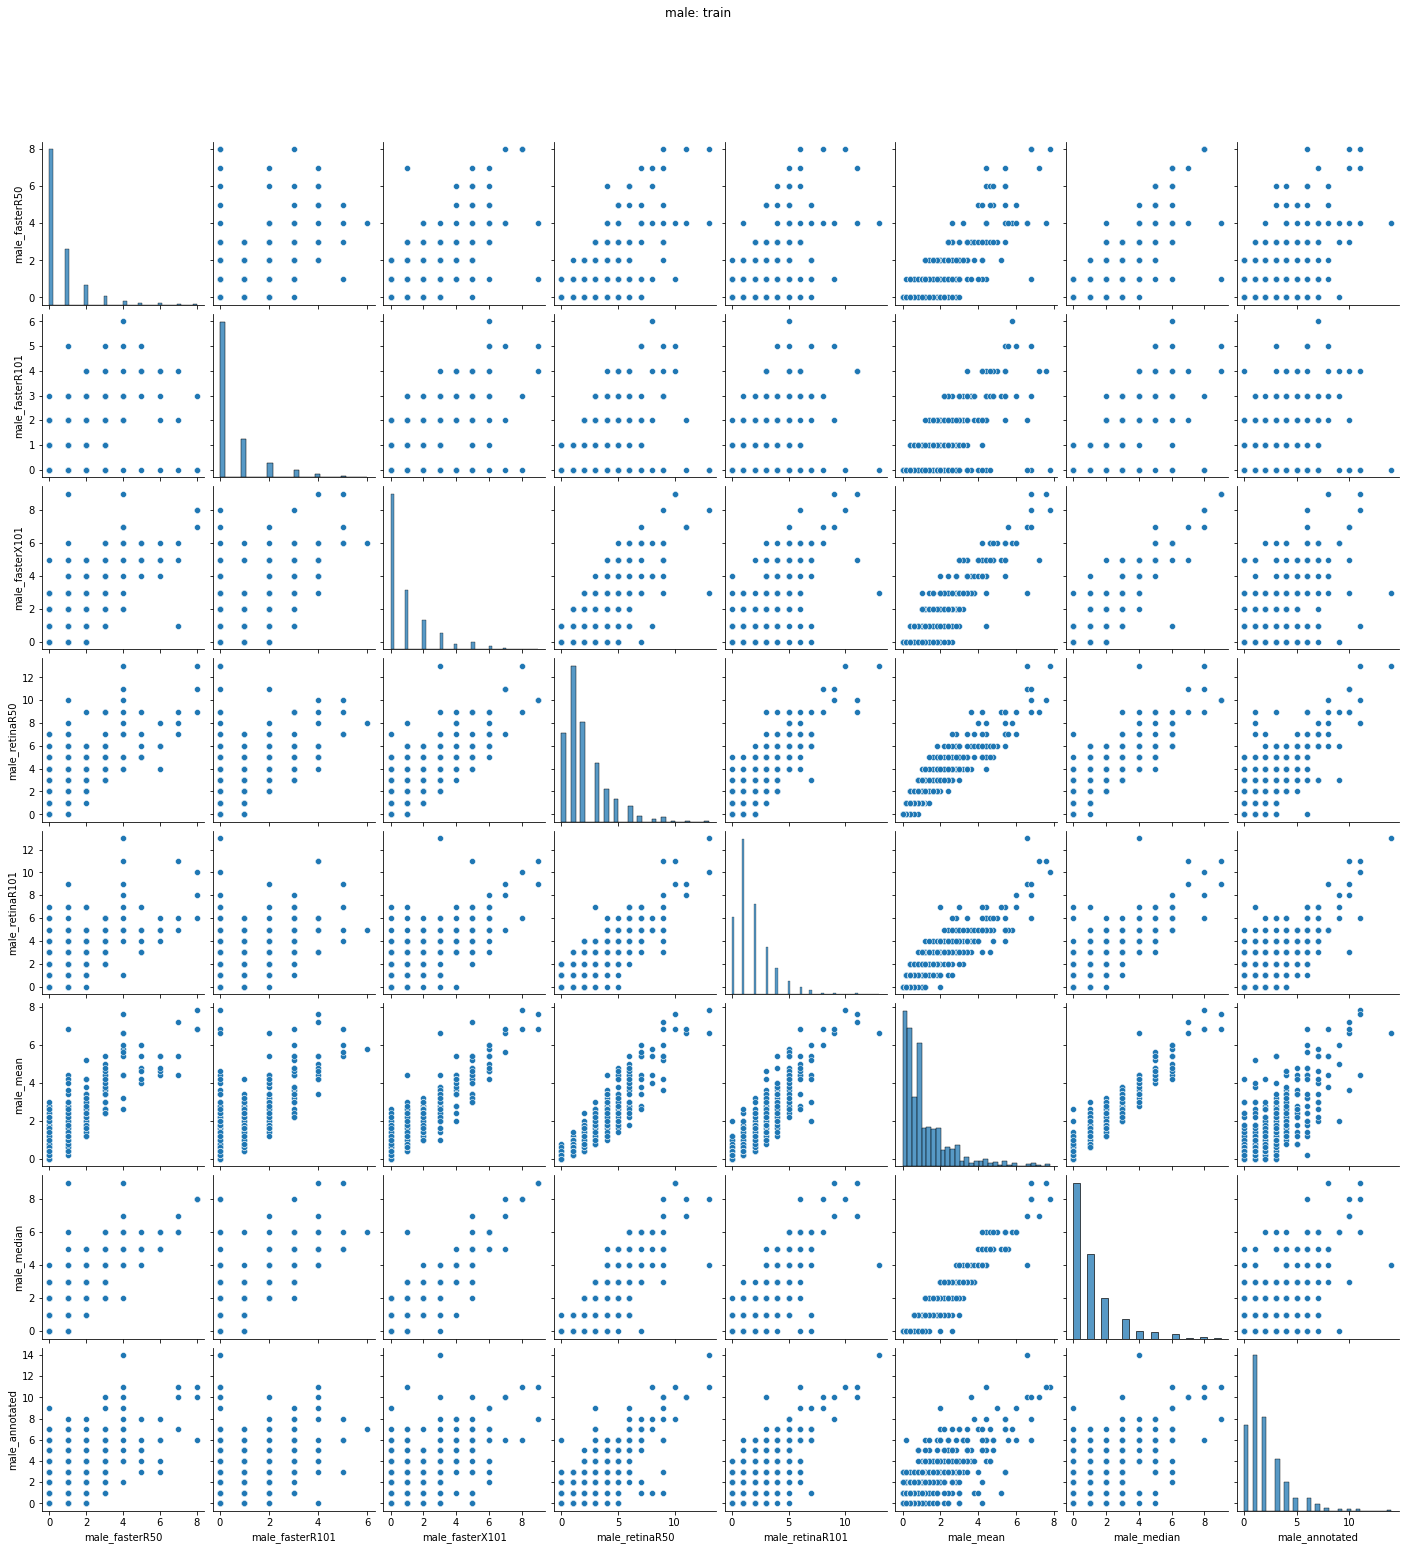

plotting flagUS: train. Dim: (805, 129)


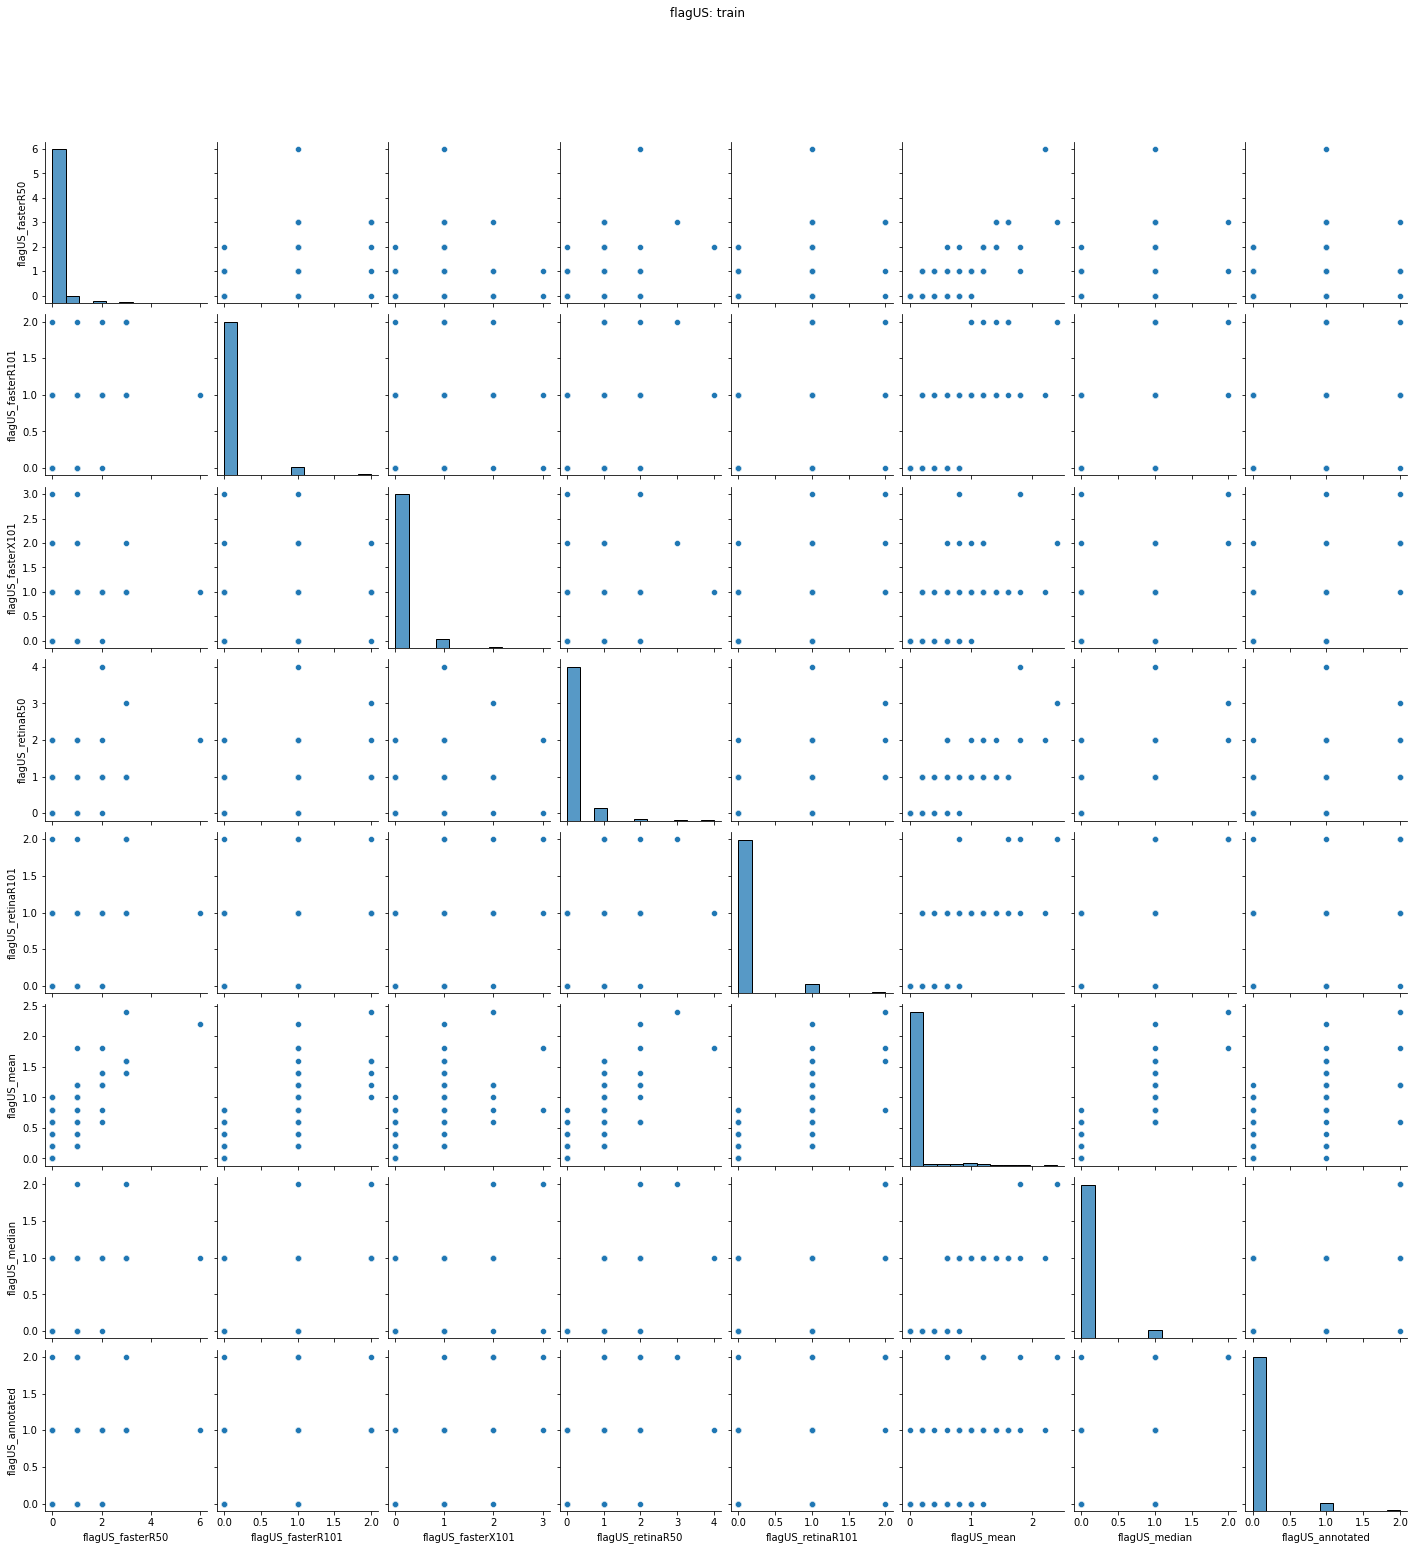

plotting person: train. Dim: (805, 129)


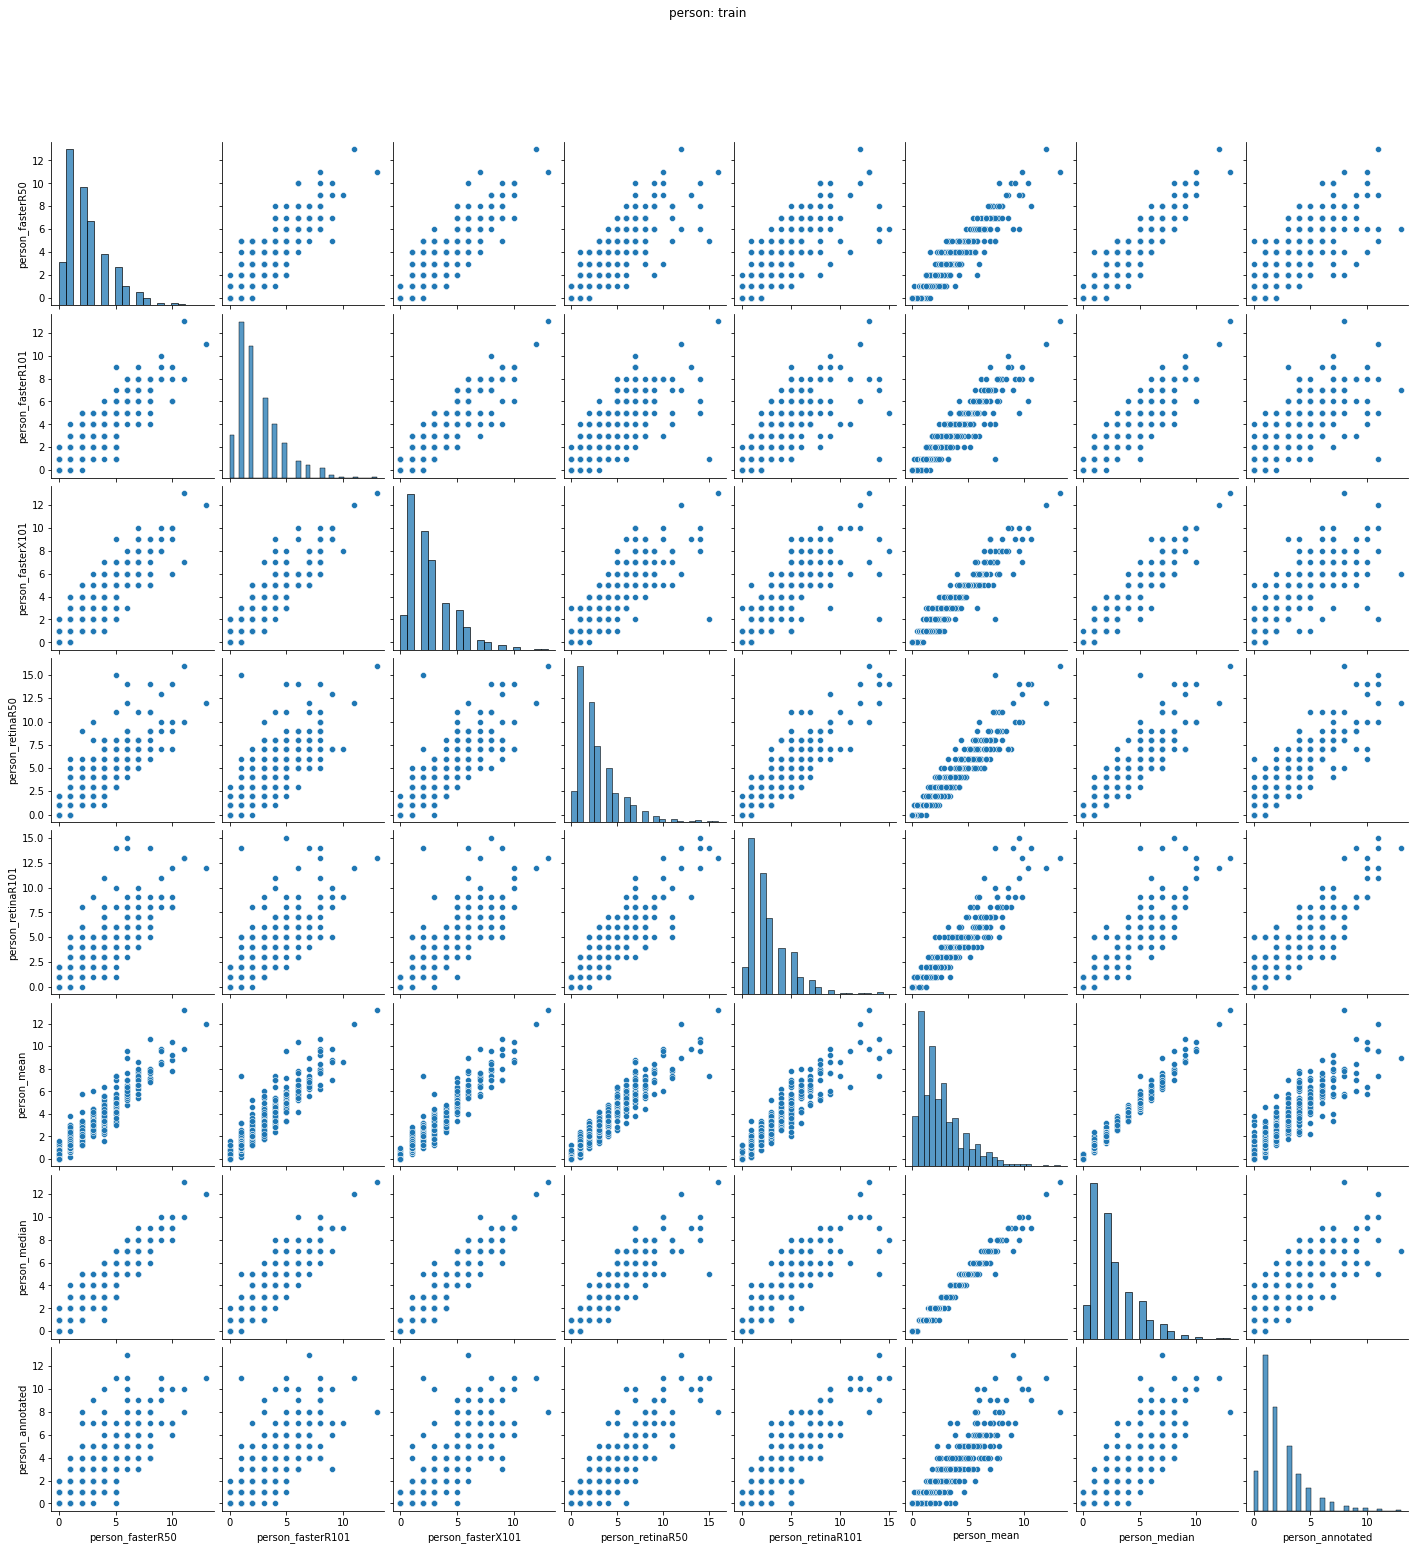

plotting firearm: test. Dim: (202, 129)


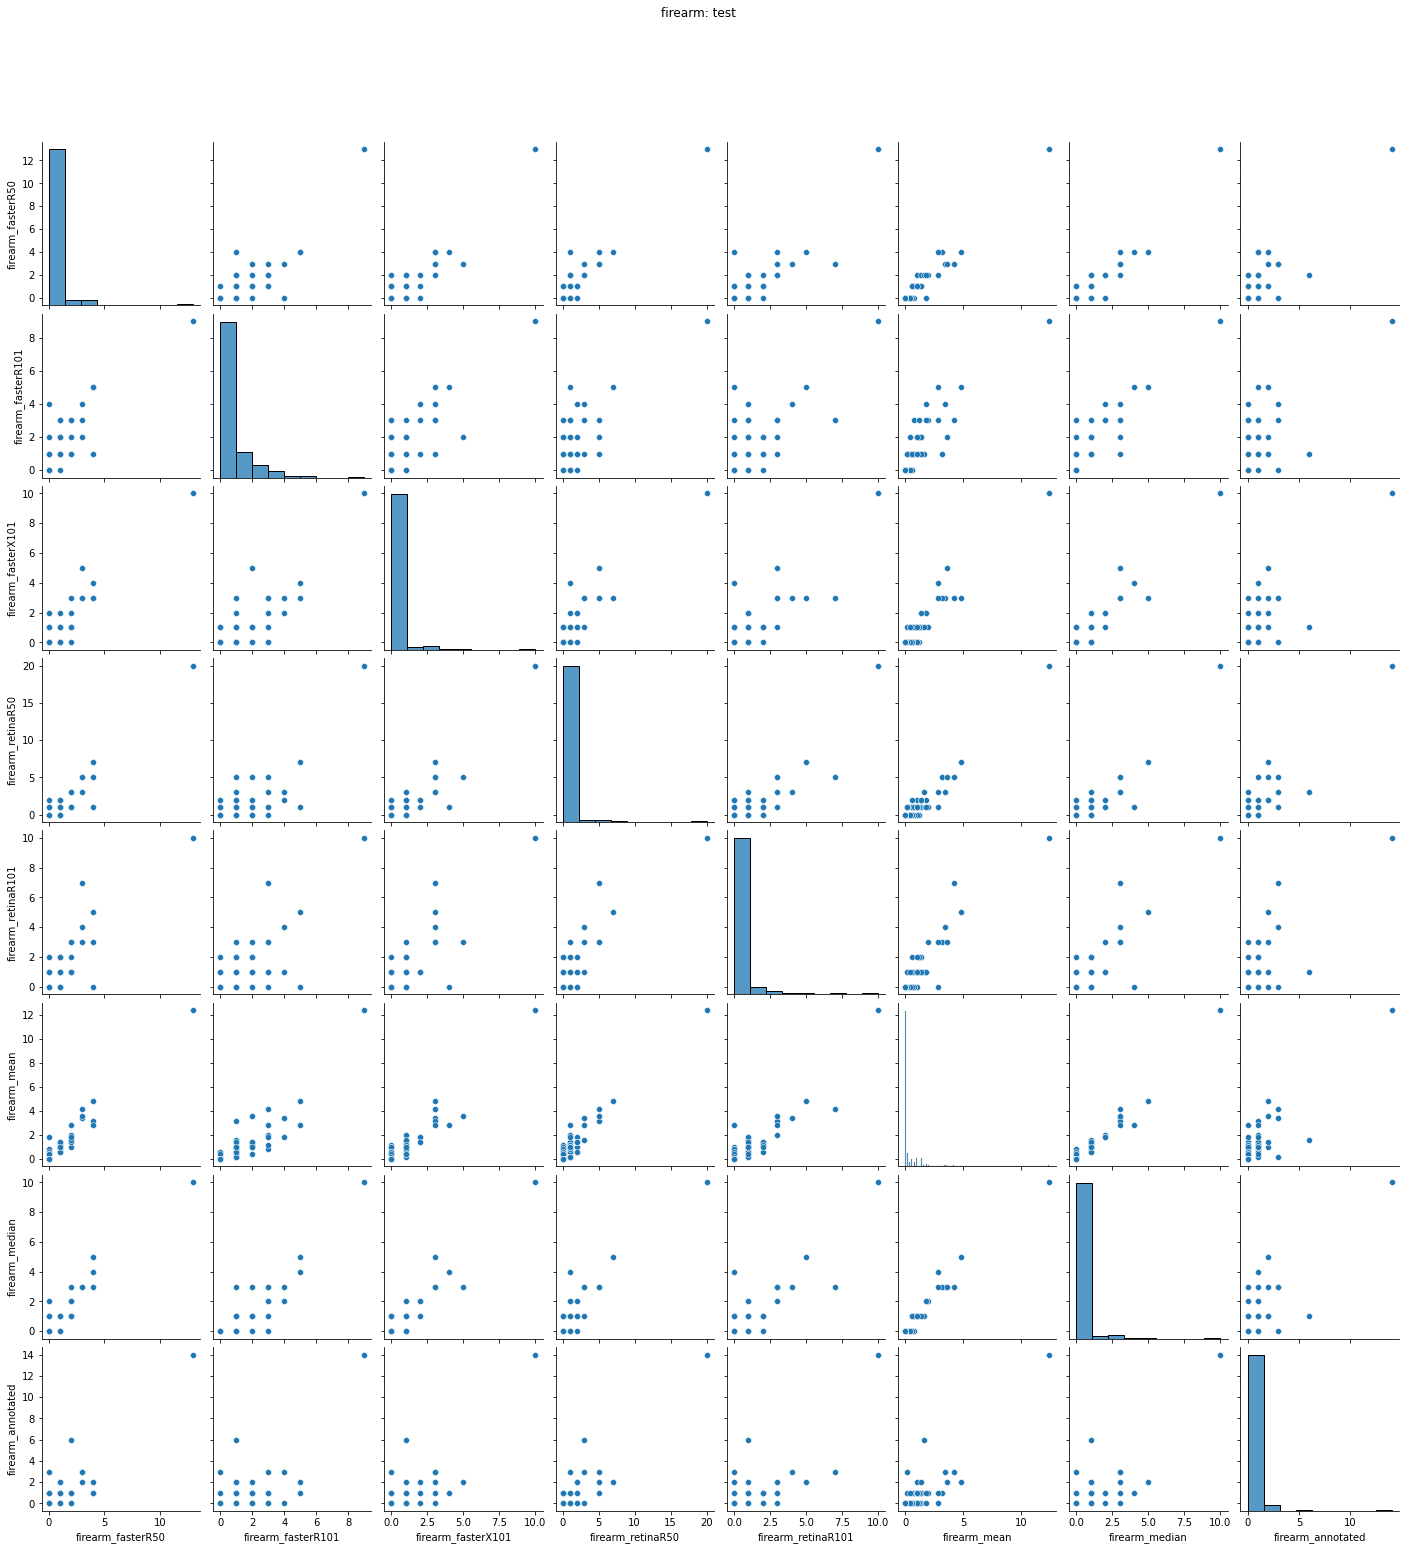

plotting youth: test. Dim: (202, 129)


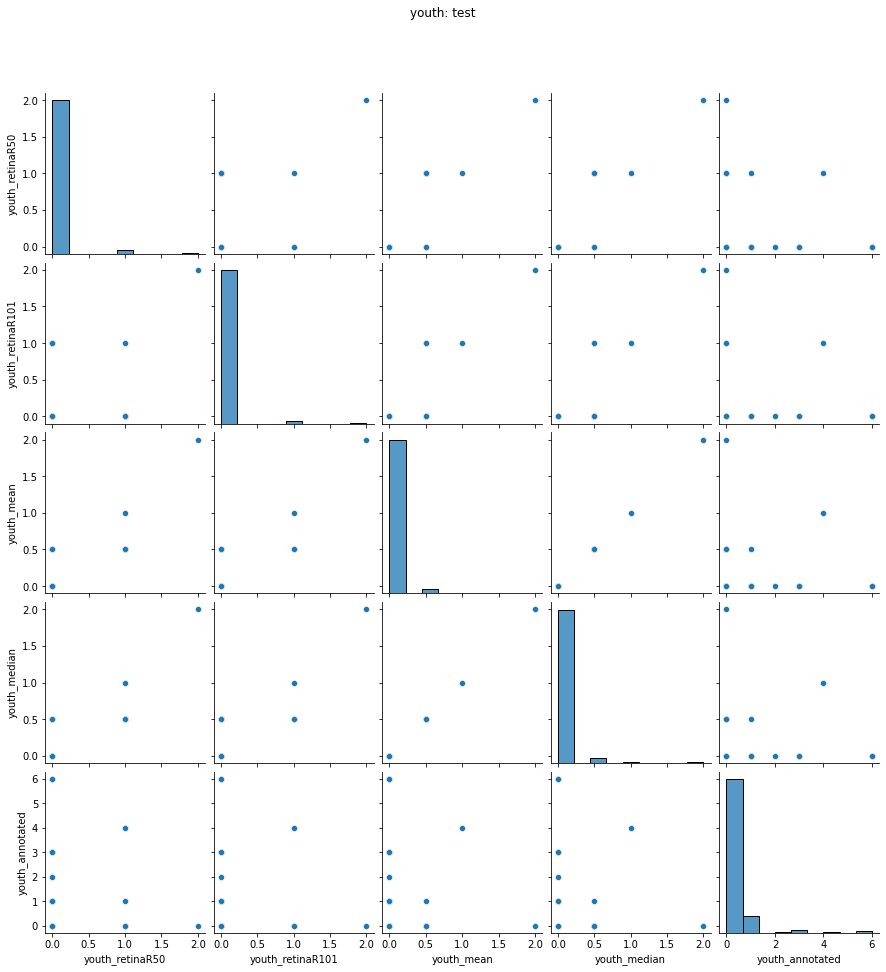

plotting adult: test. Dim: (202, 129)


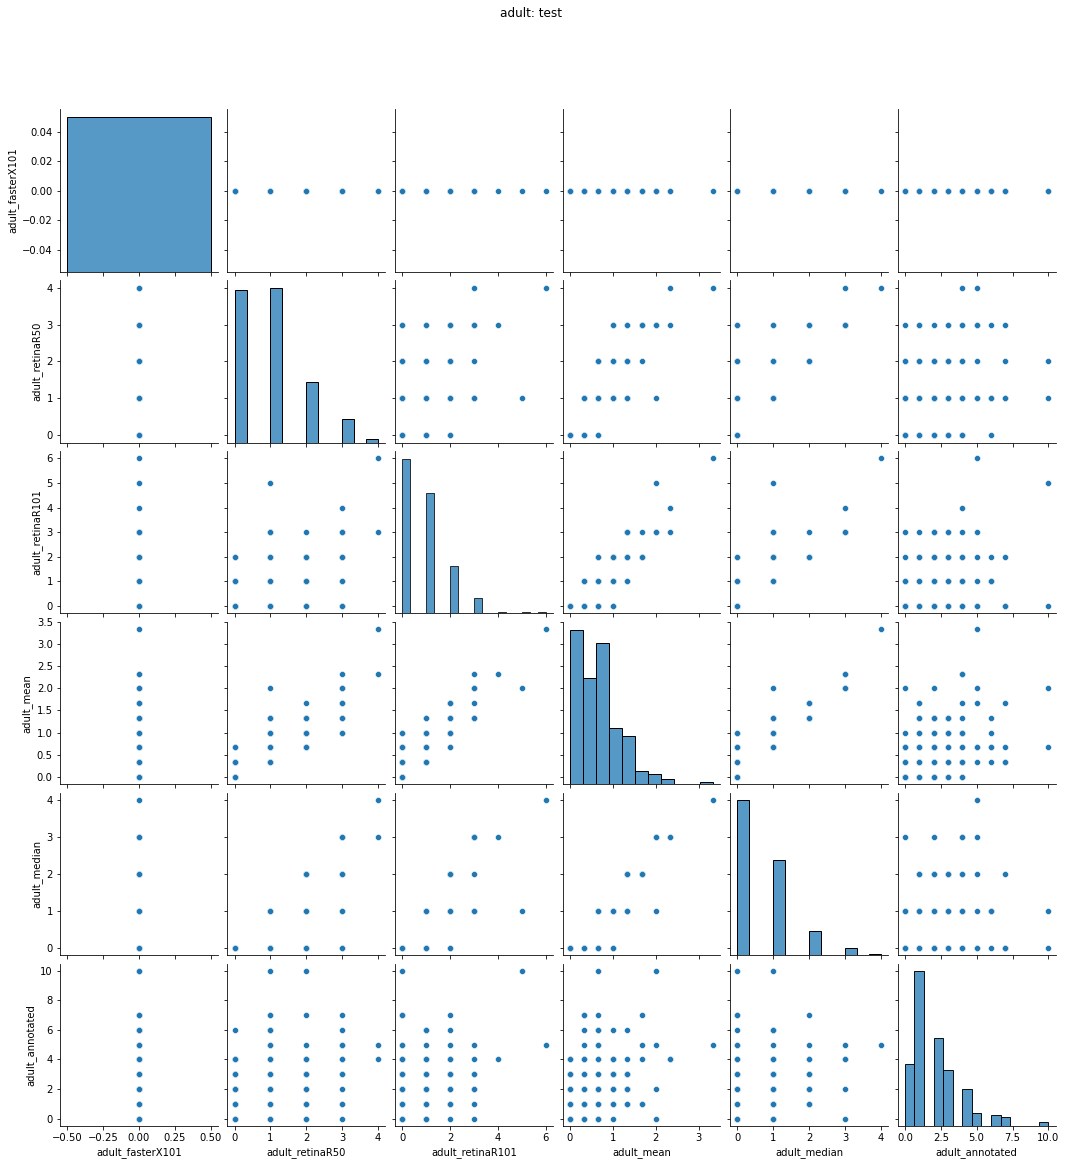

plotting hostage: test. Dim: (202, 129)


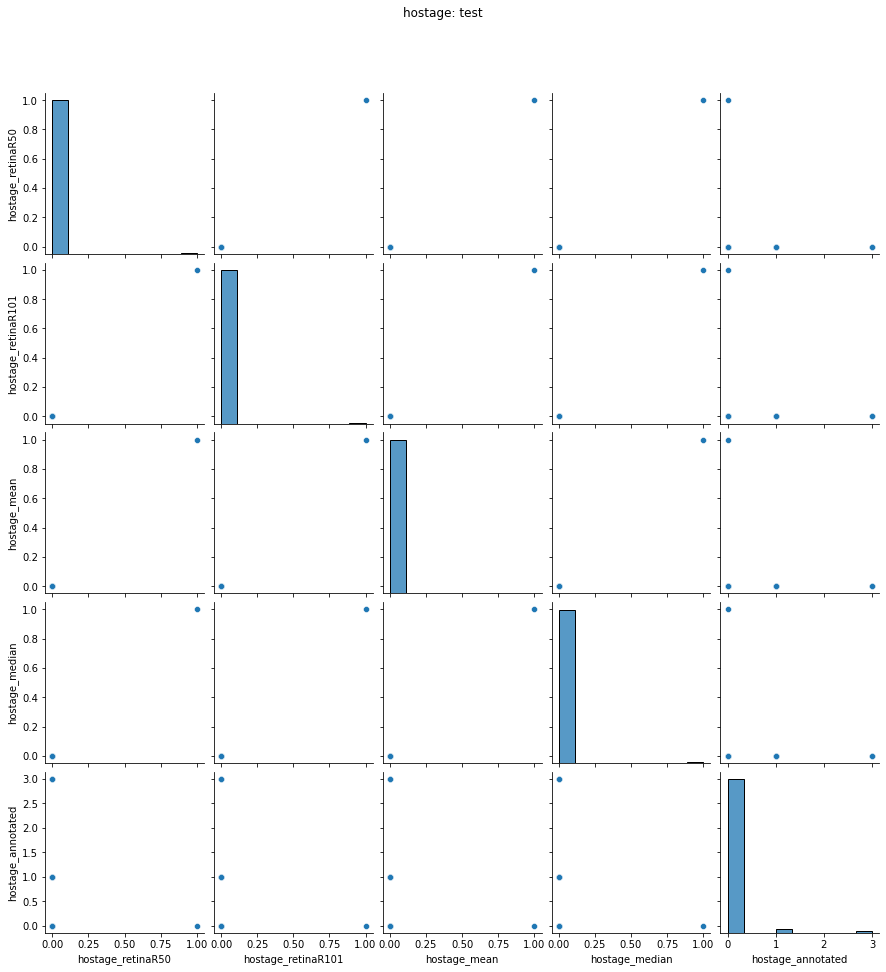

plotting falgIRQ: test. Dim: (202, 129)


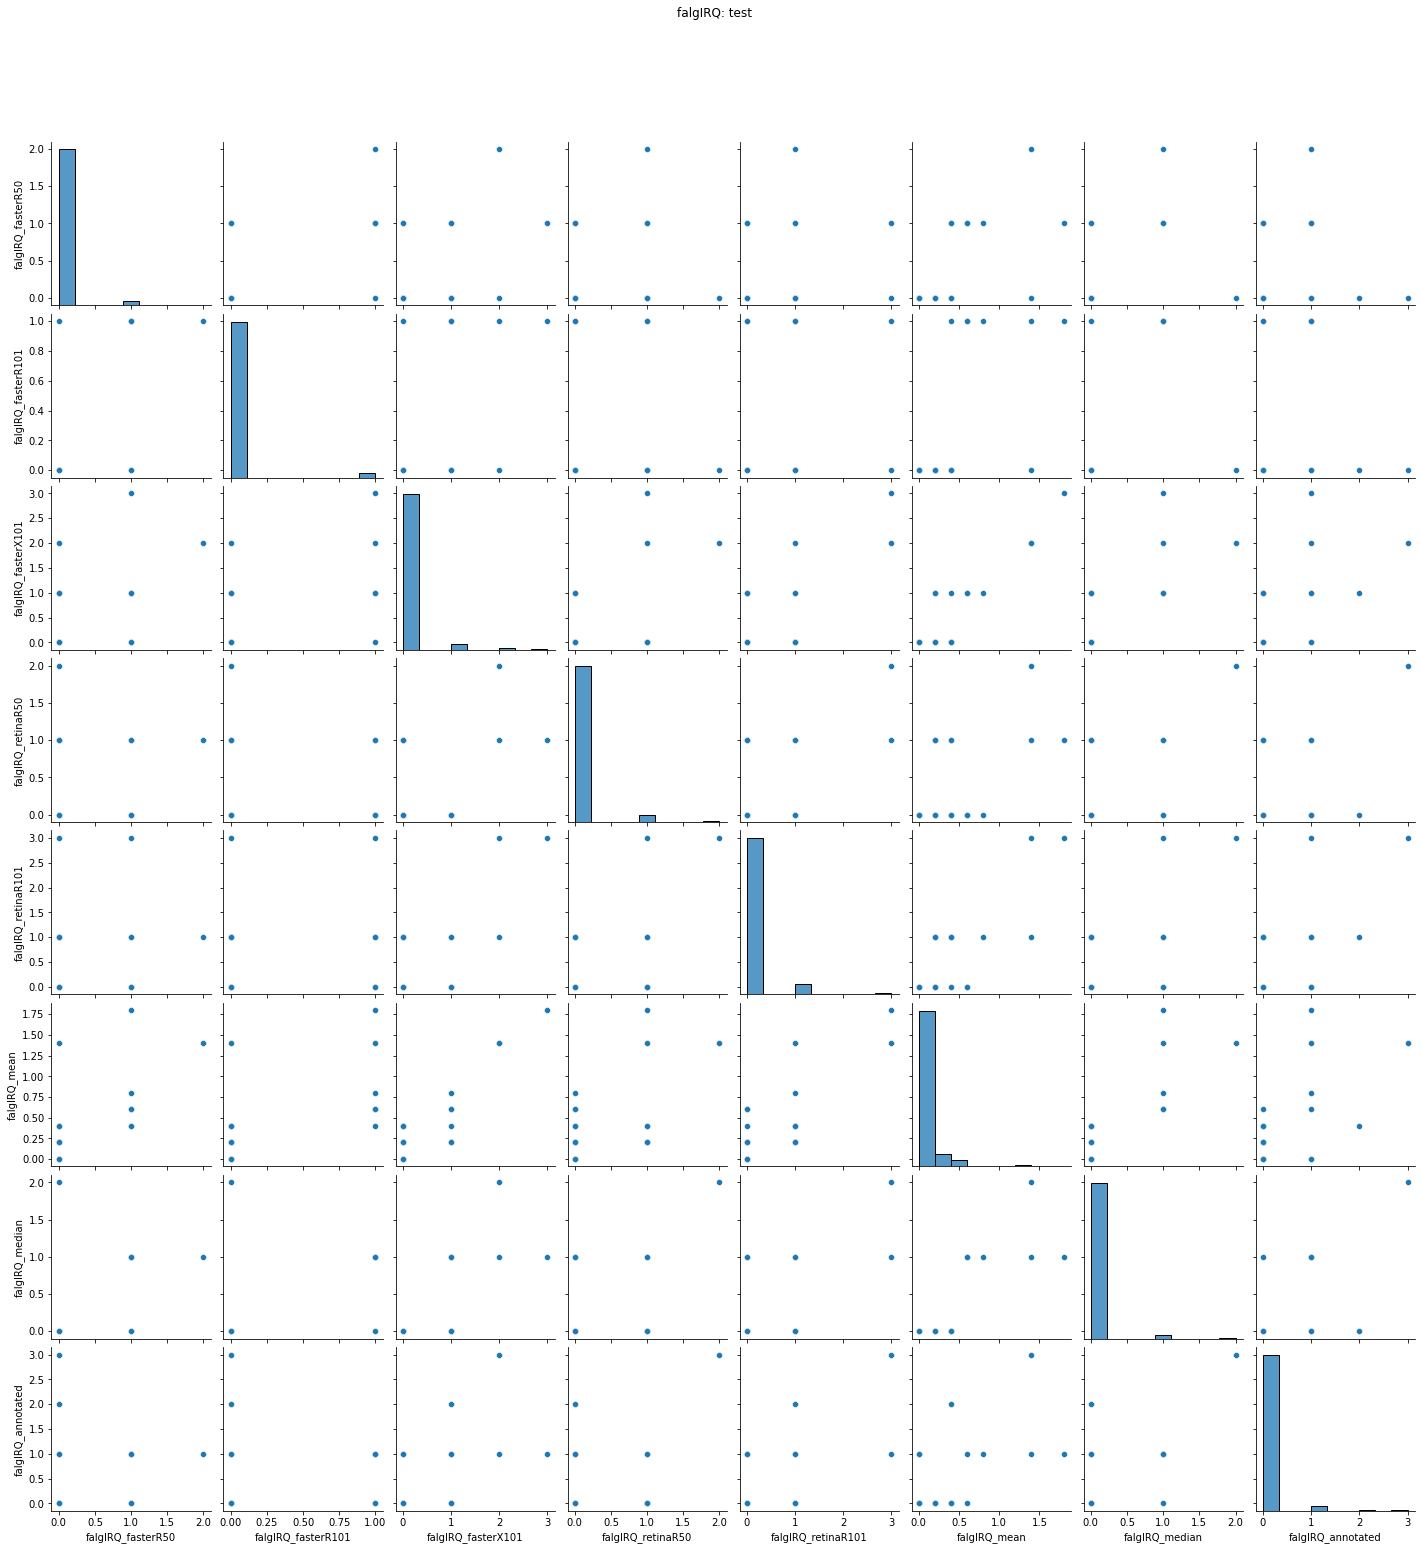

plotting uniformed: test. Dim: (202, 129)


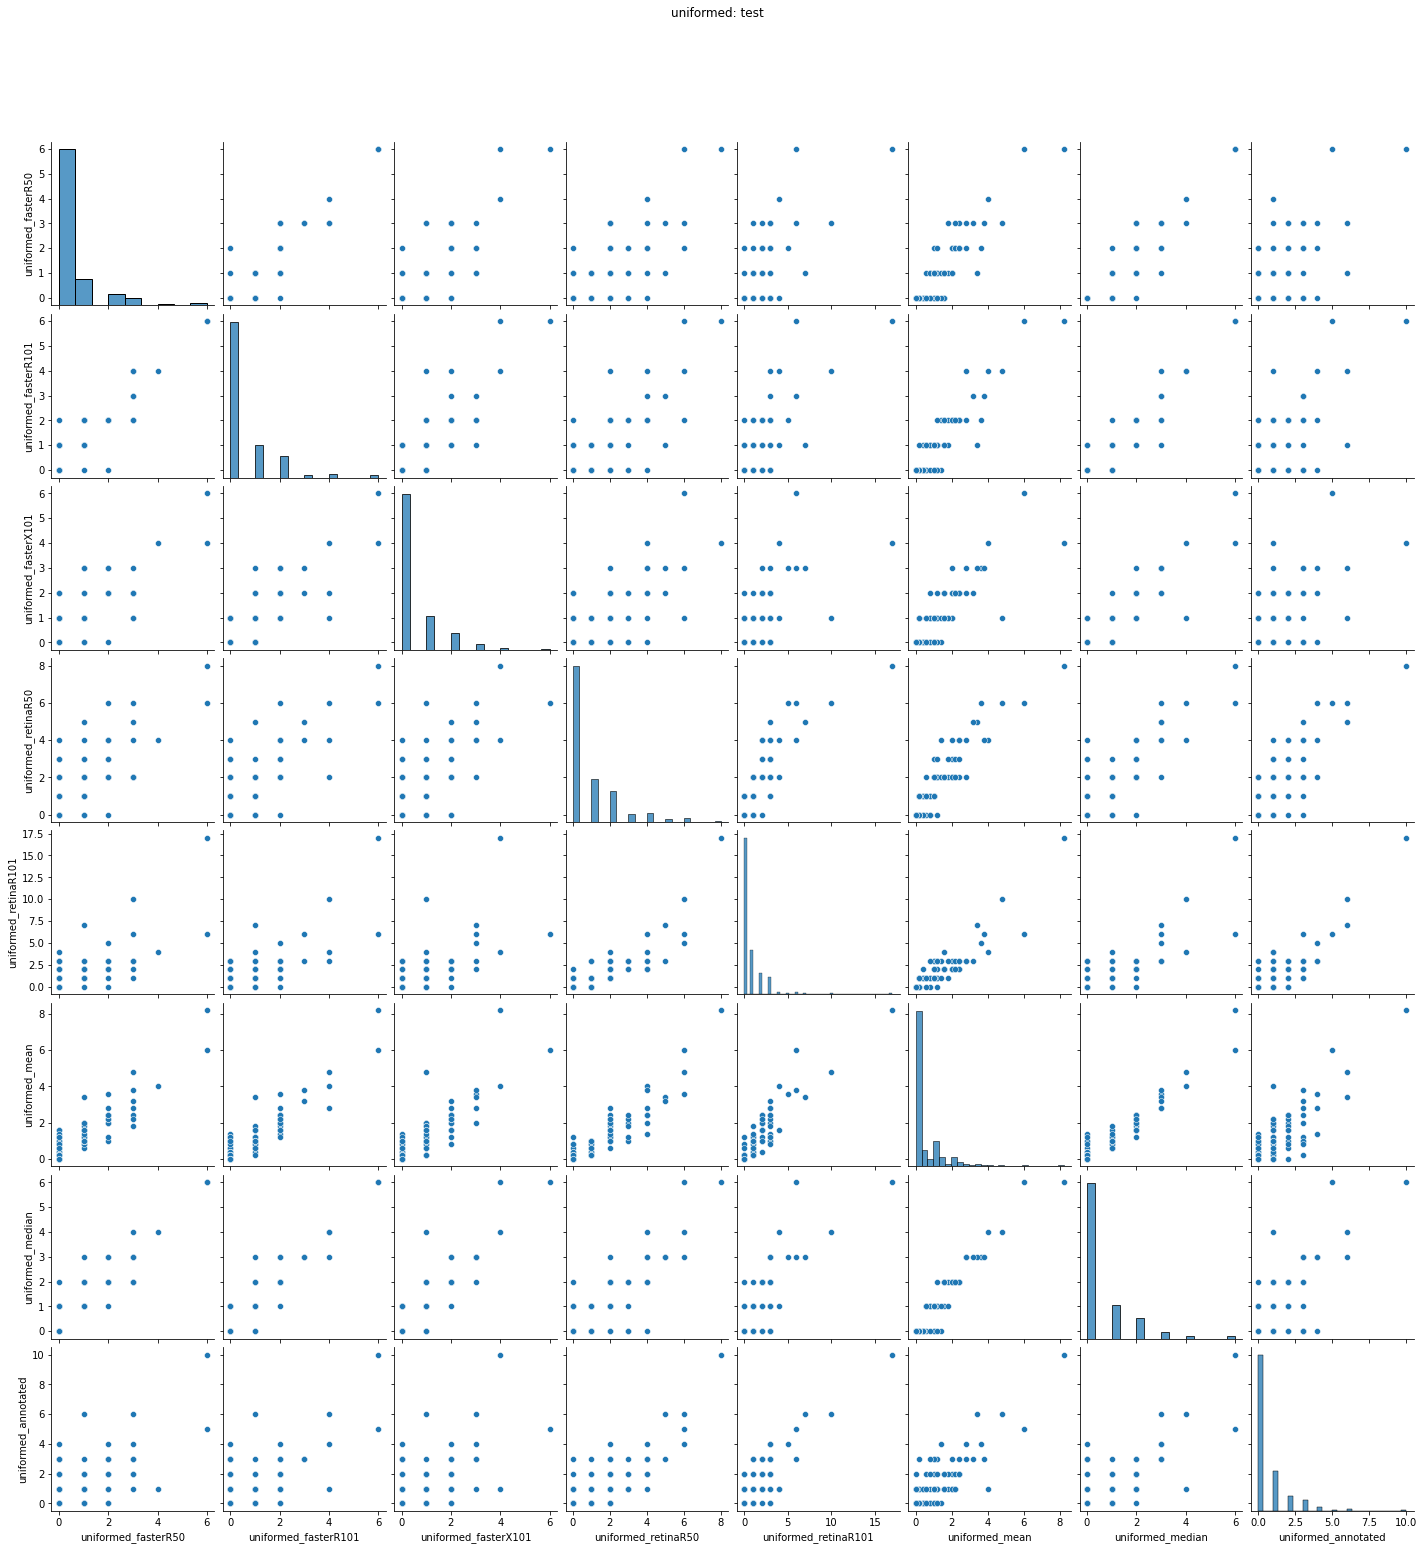

plotting casualty: test. Dim: (202, 129)


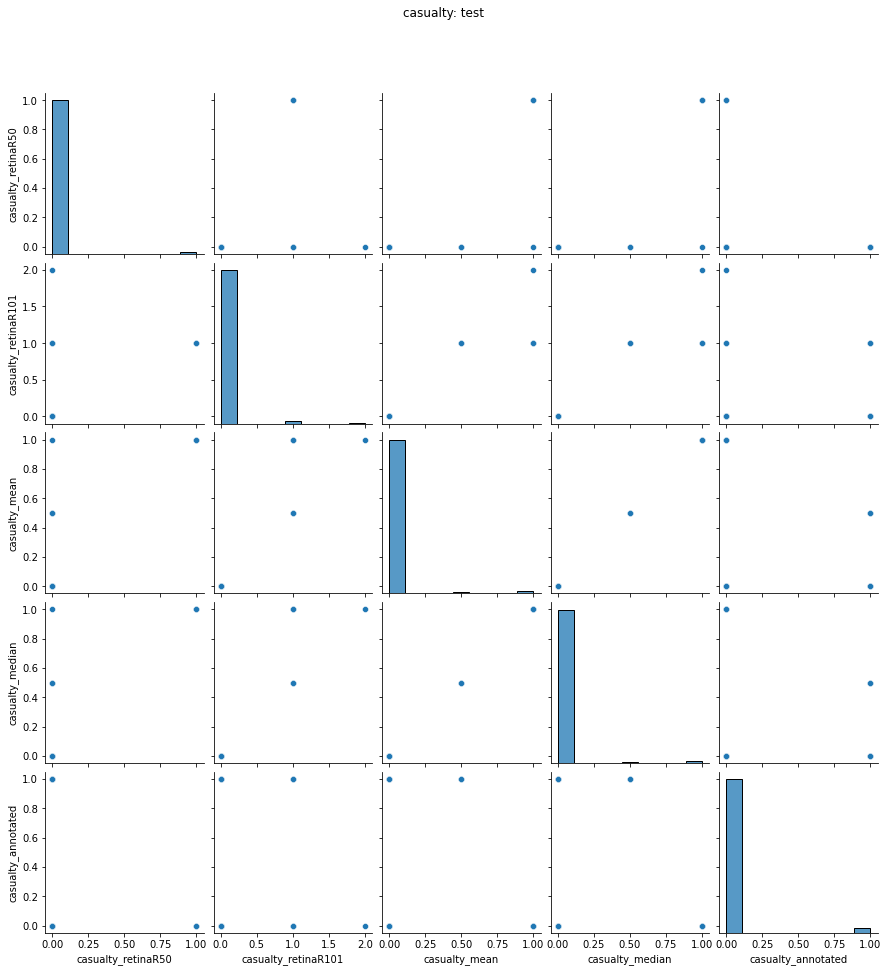

plotting female: test. Dim: (202, 129)


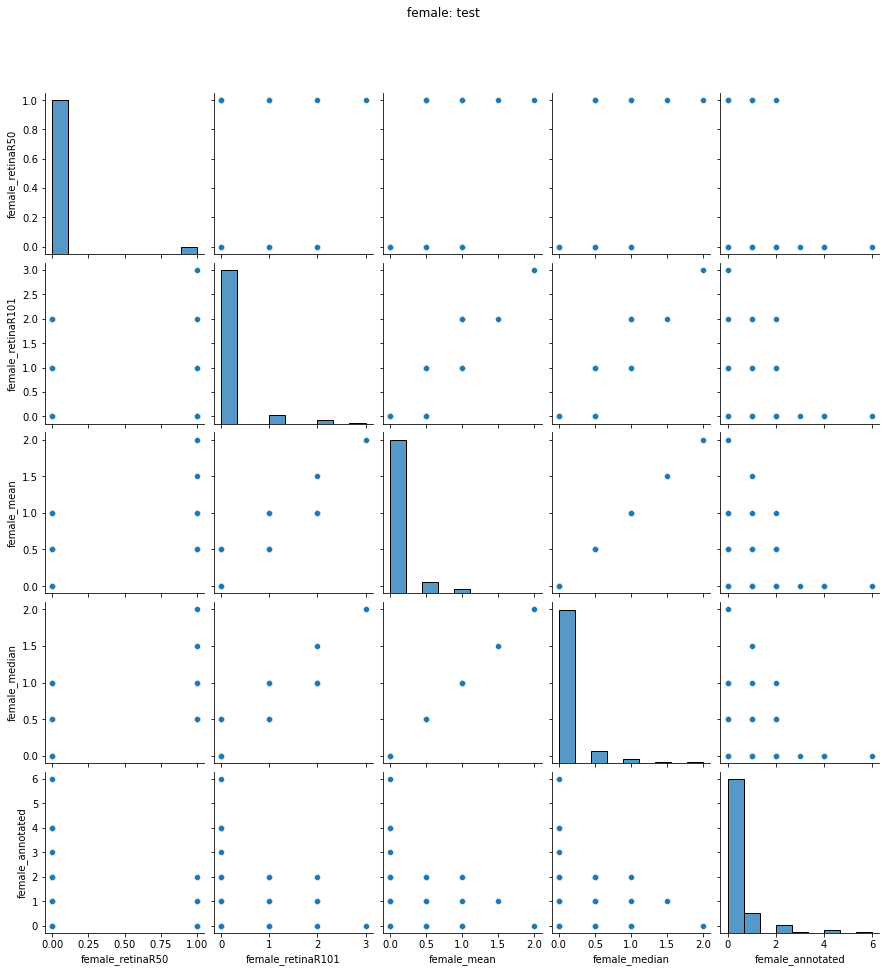

plotting militaryVehicle: test. Dim: (202, 129)


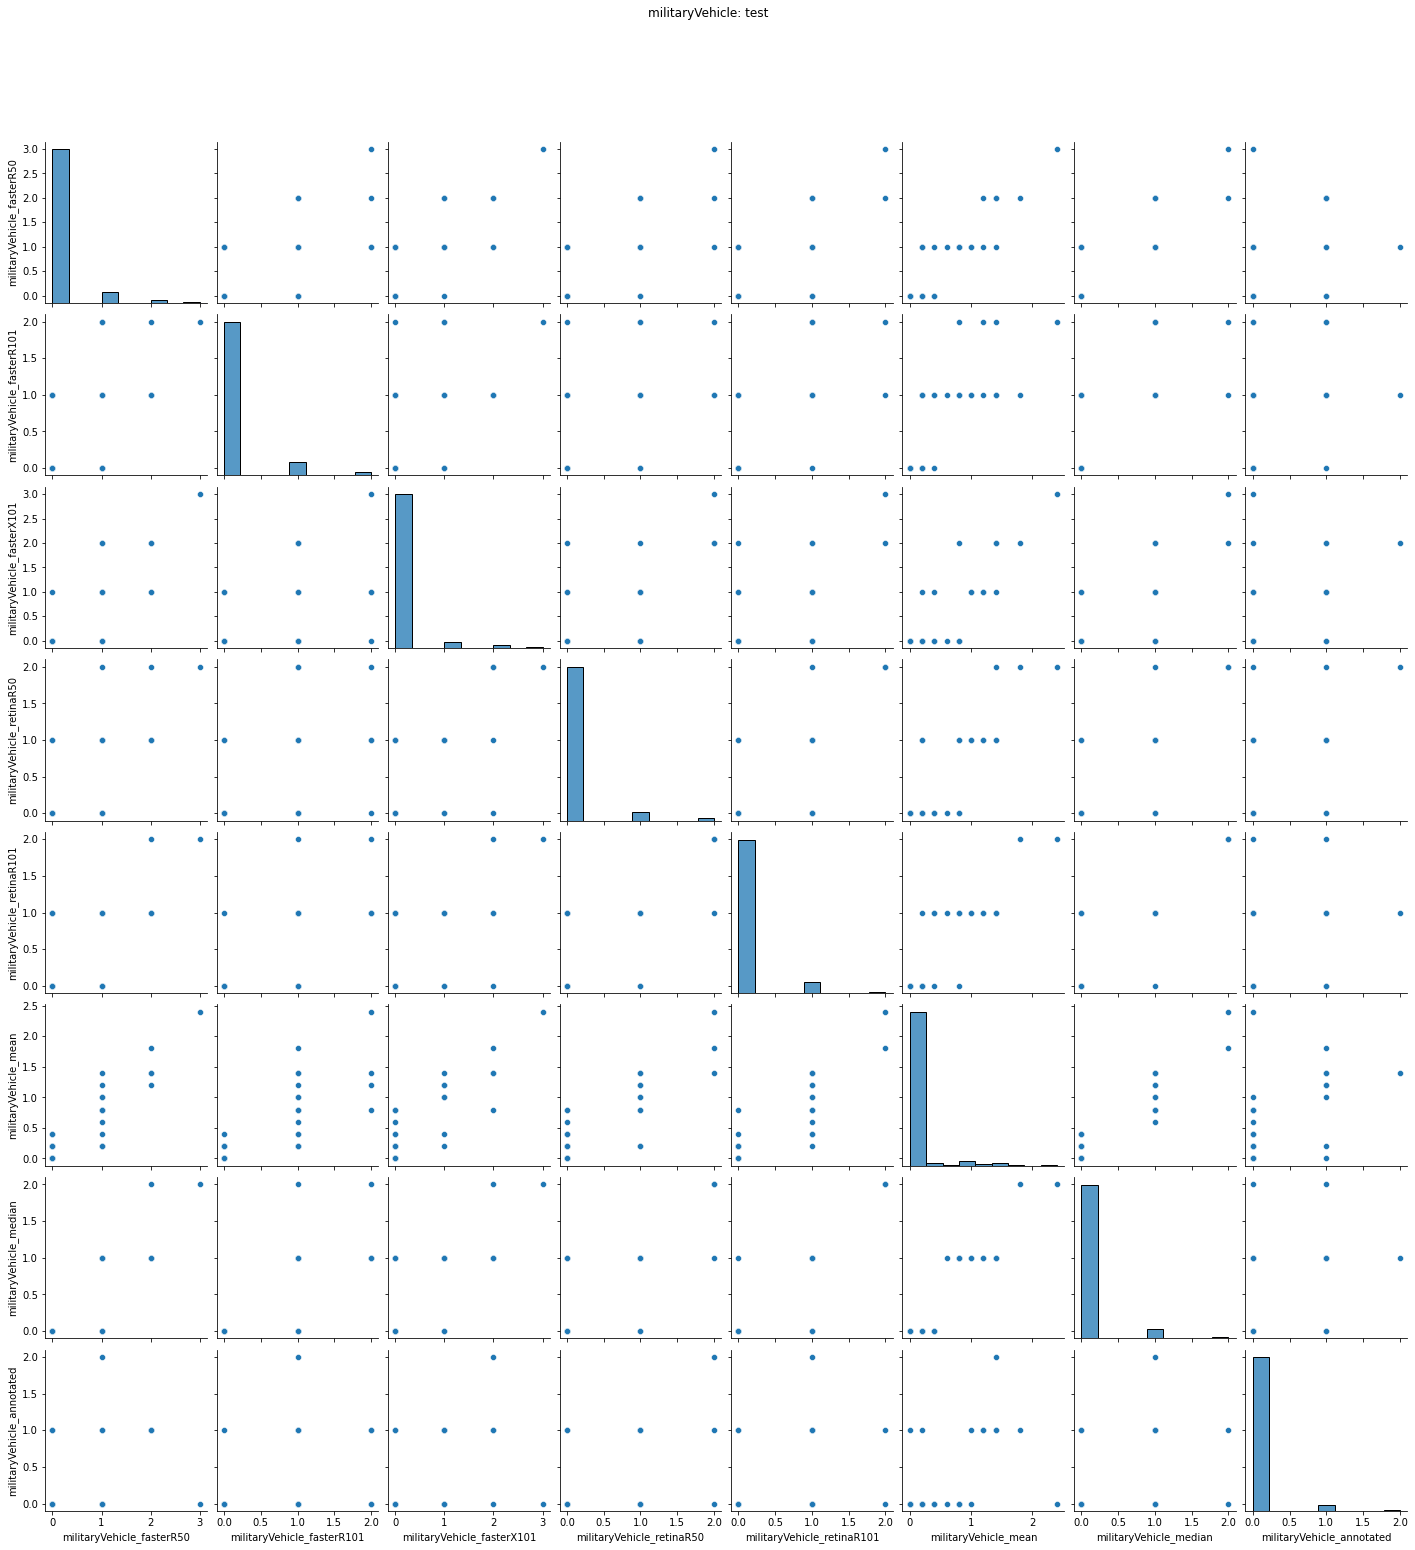

plotting child: test. Dim: (202, 129)


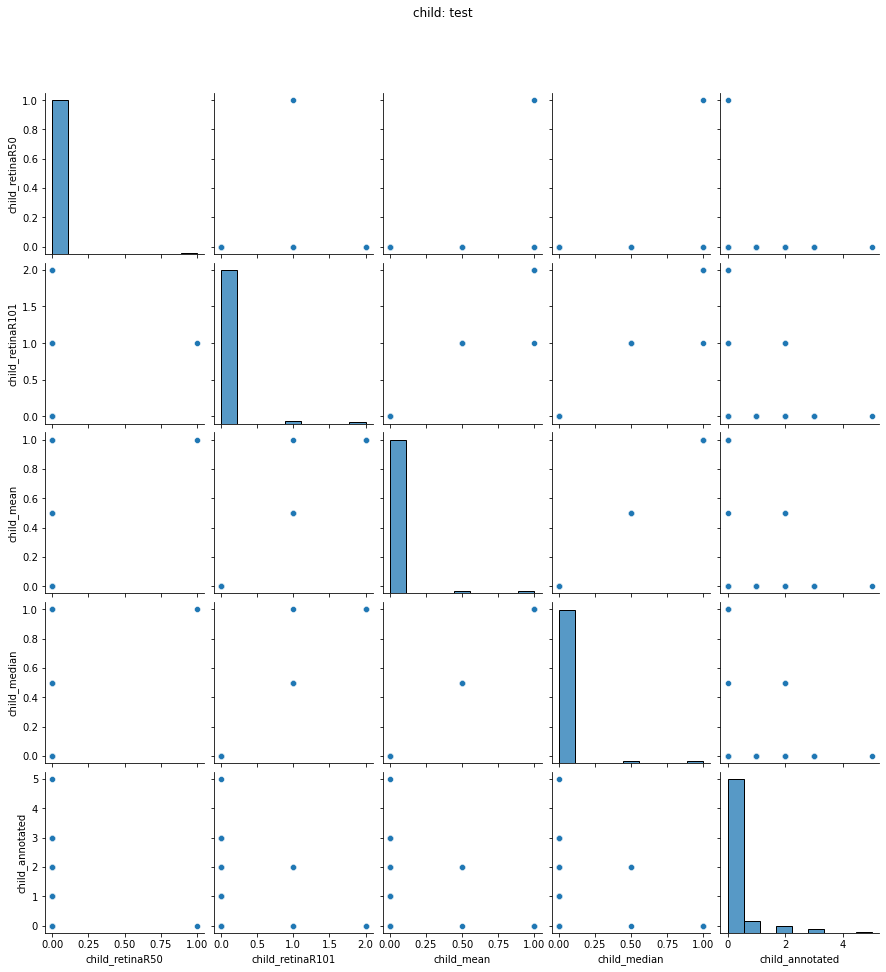

plotting bloodedArea: test. Dim: (202, 129)


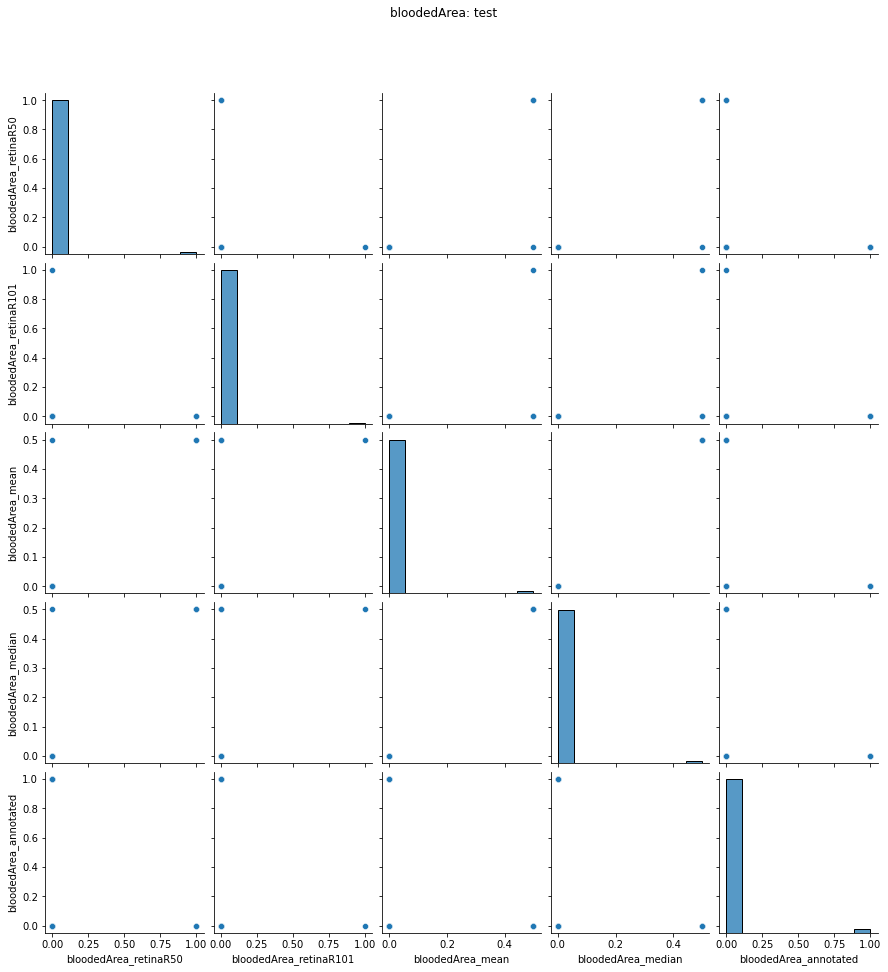

plotting religiousGarmentFemale: test. Dim: (202, 129)


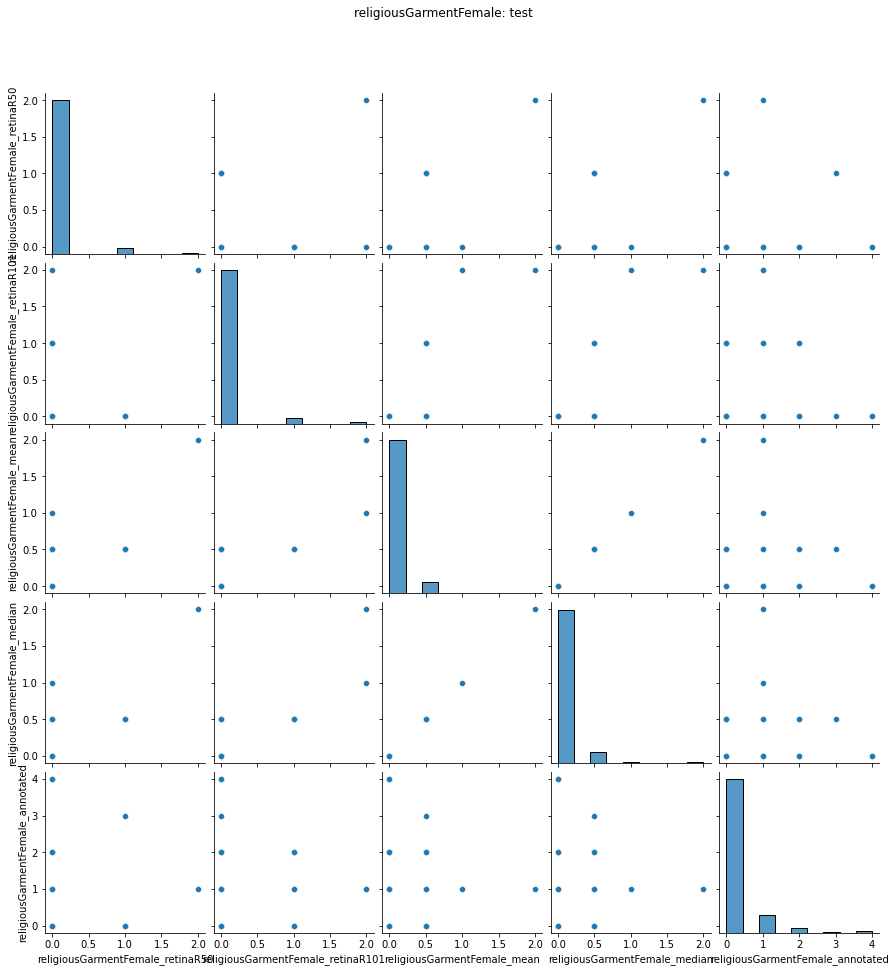

plotting elderly: test. Dim: (202, 129)


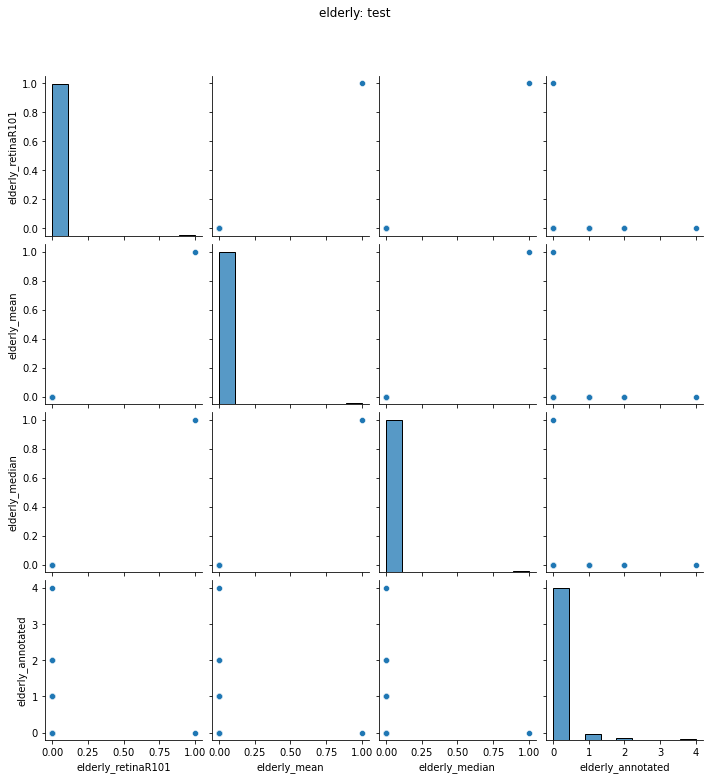

plotting male: test. Dim: (202, 129)


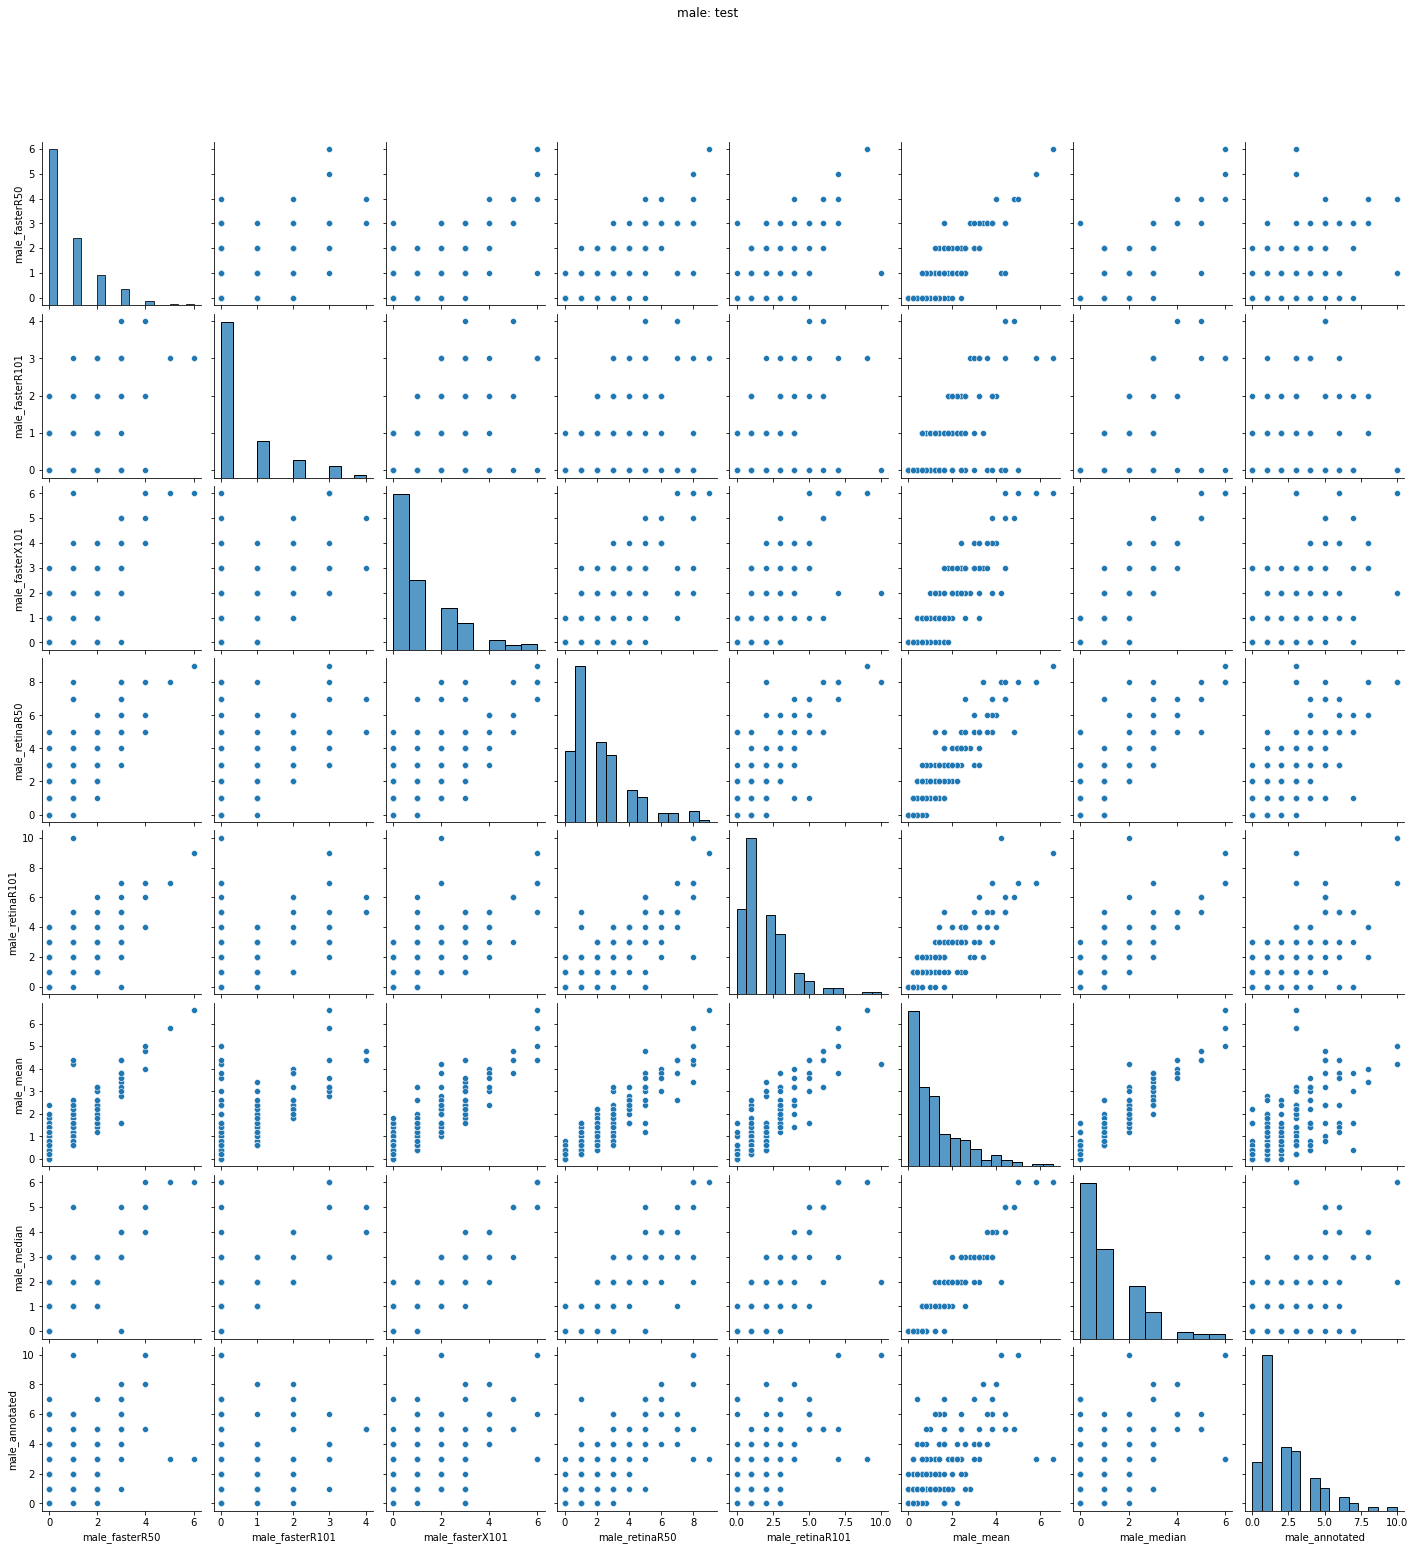

plotting flagUS: test. Dim: (202, 129)


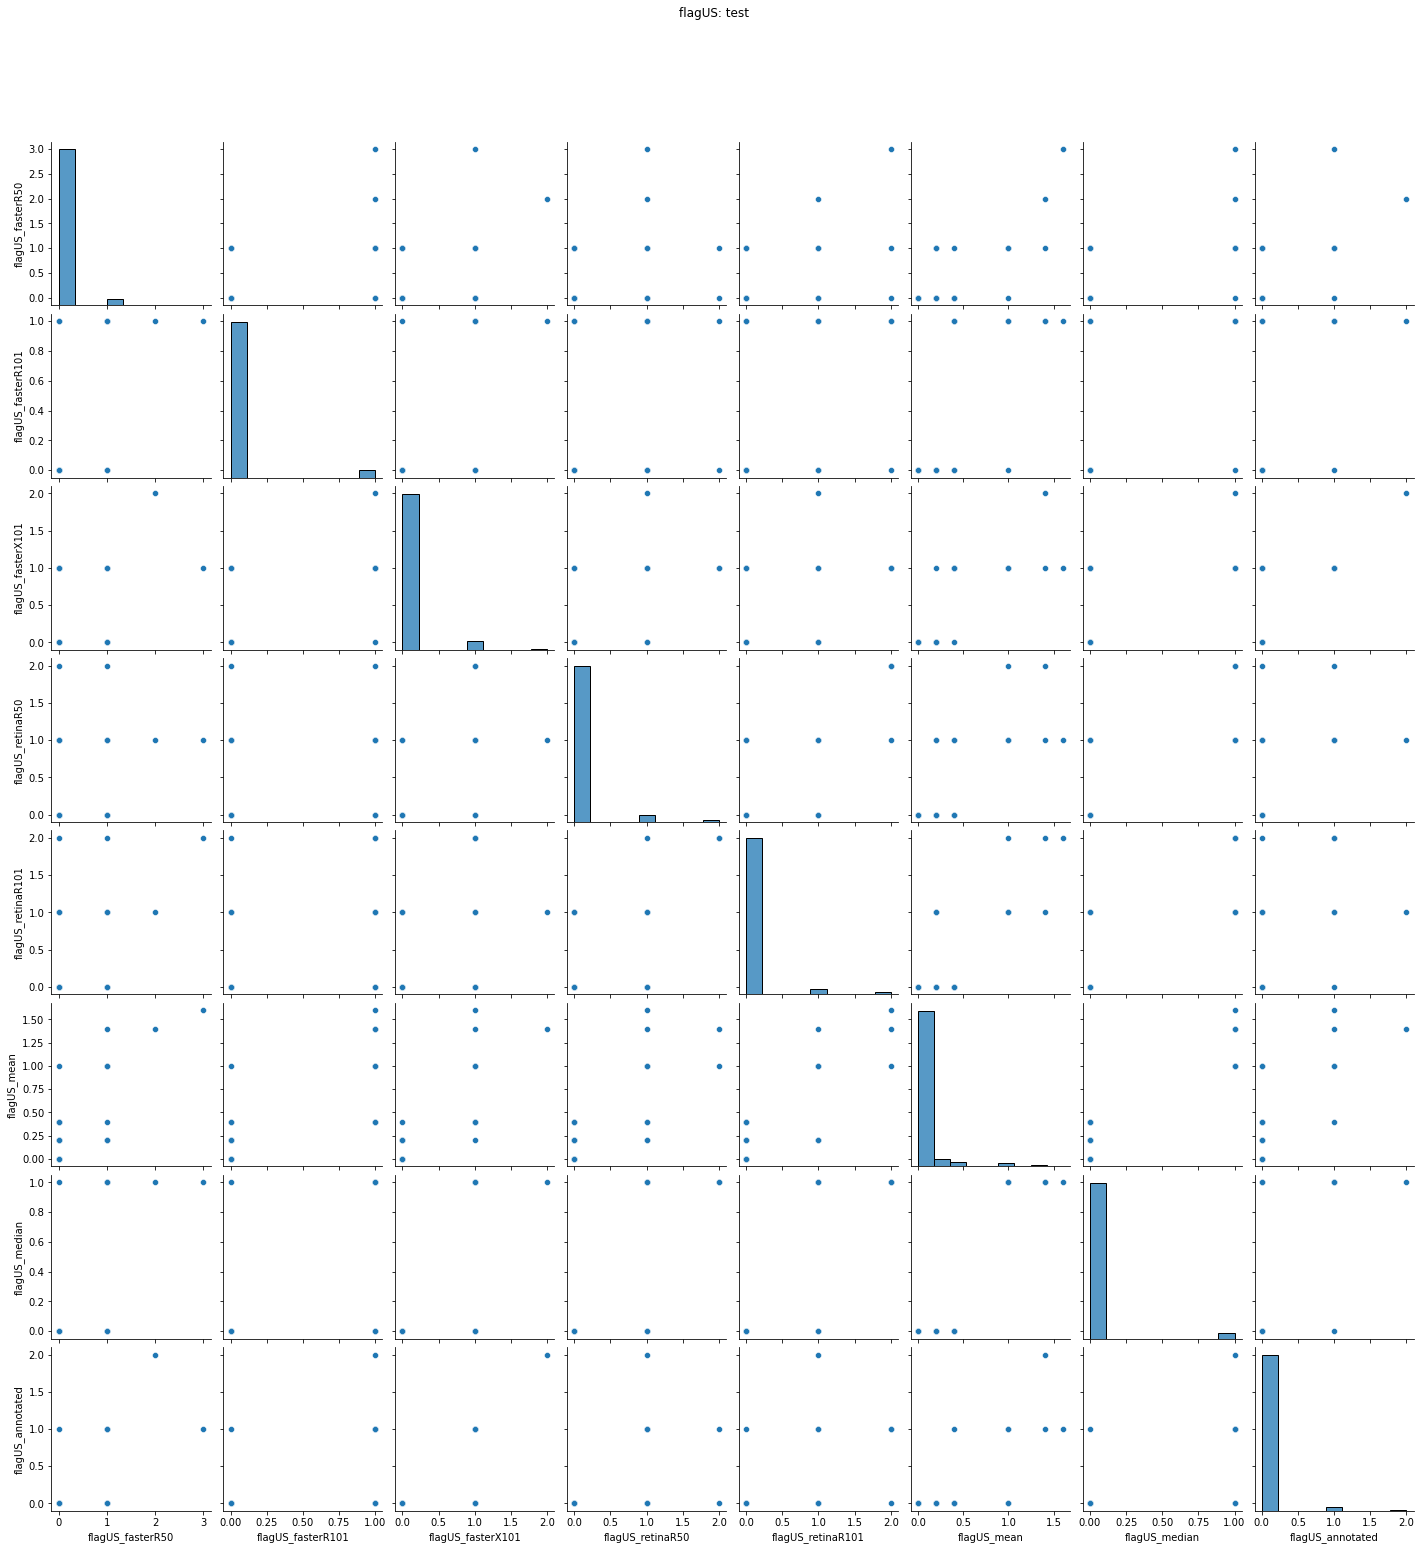

plotting person: test. Dim: (202, 129)


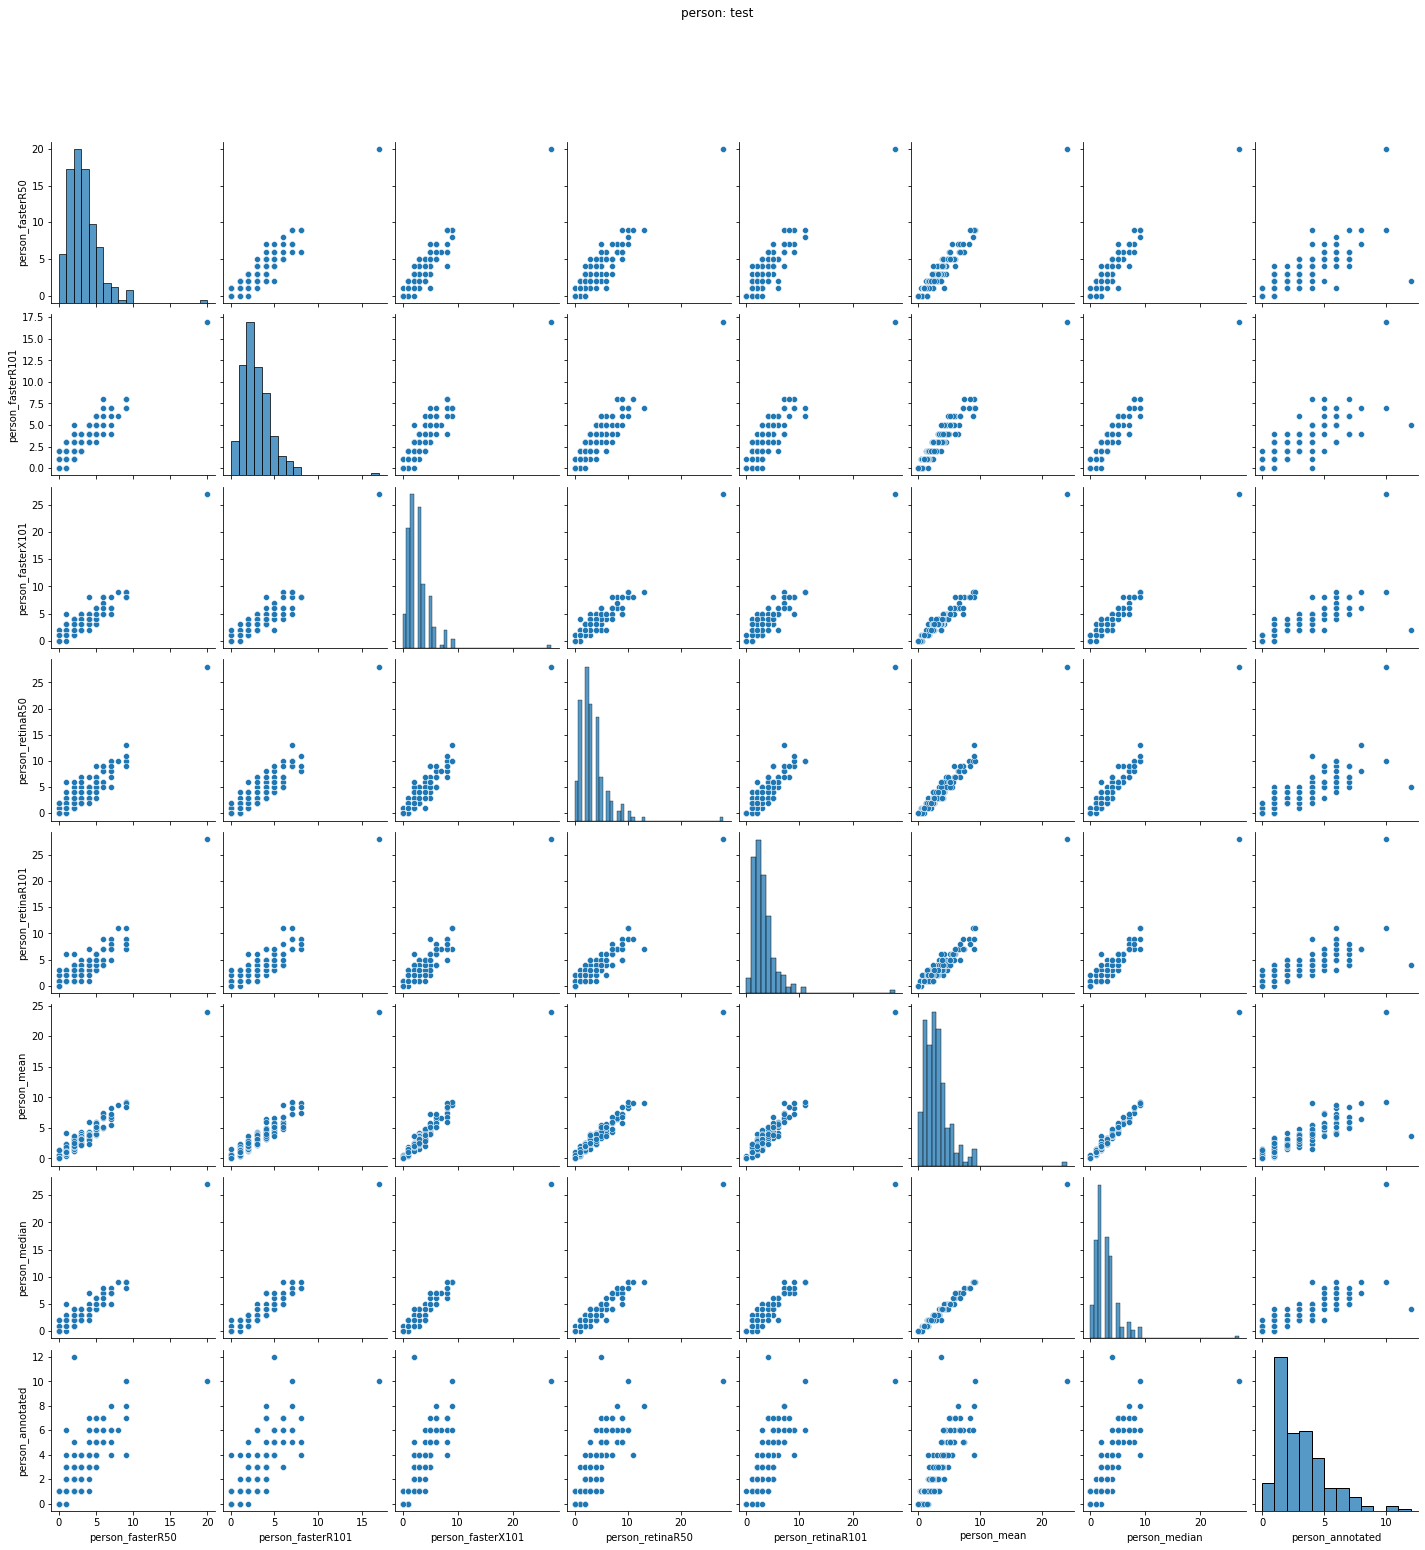

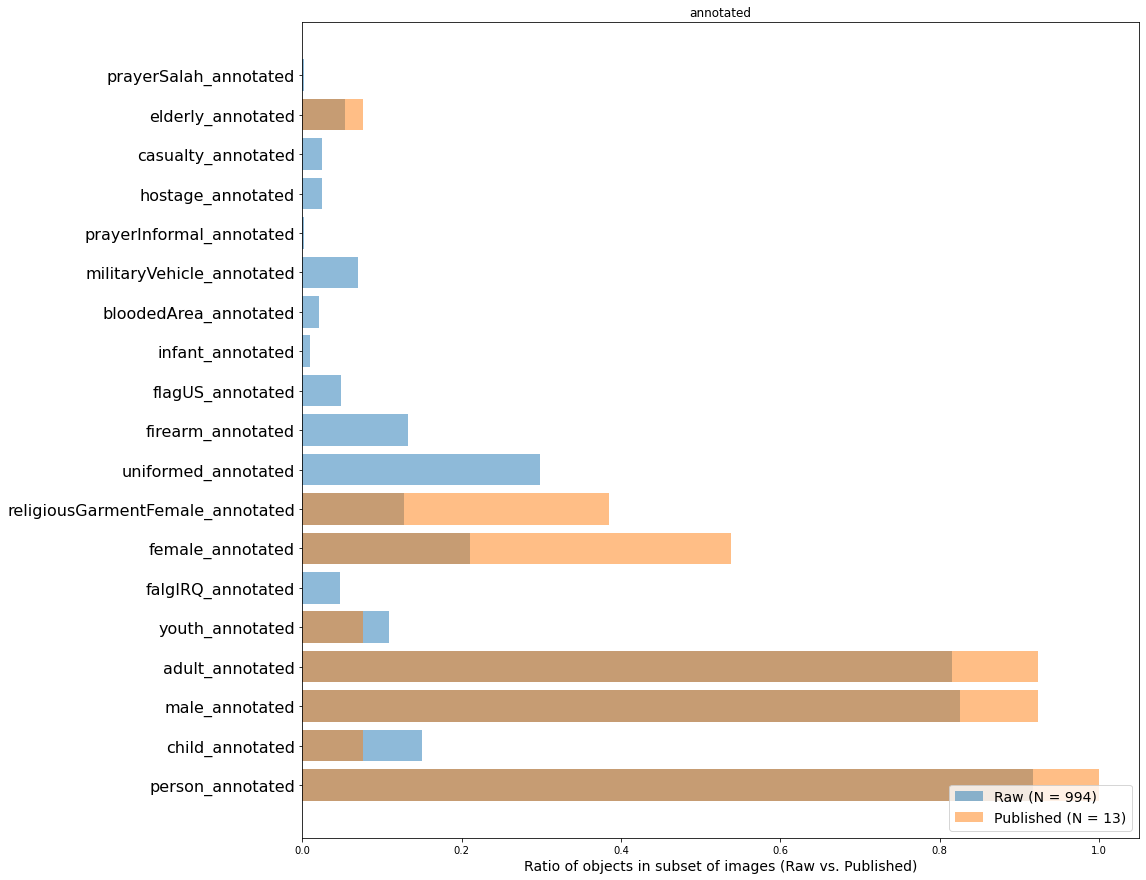

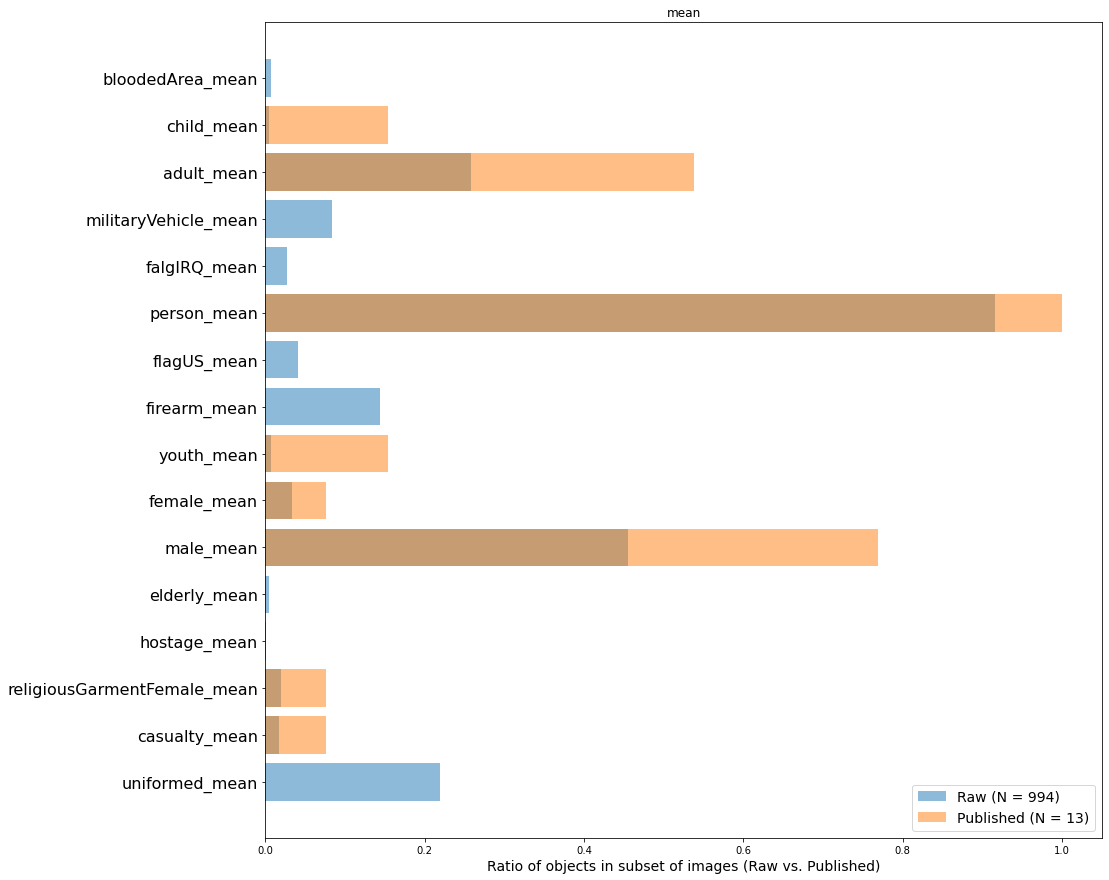

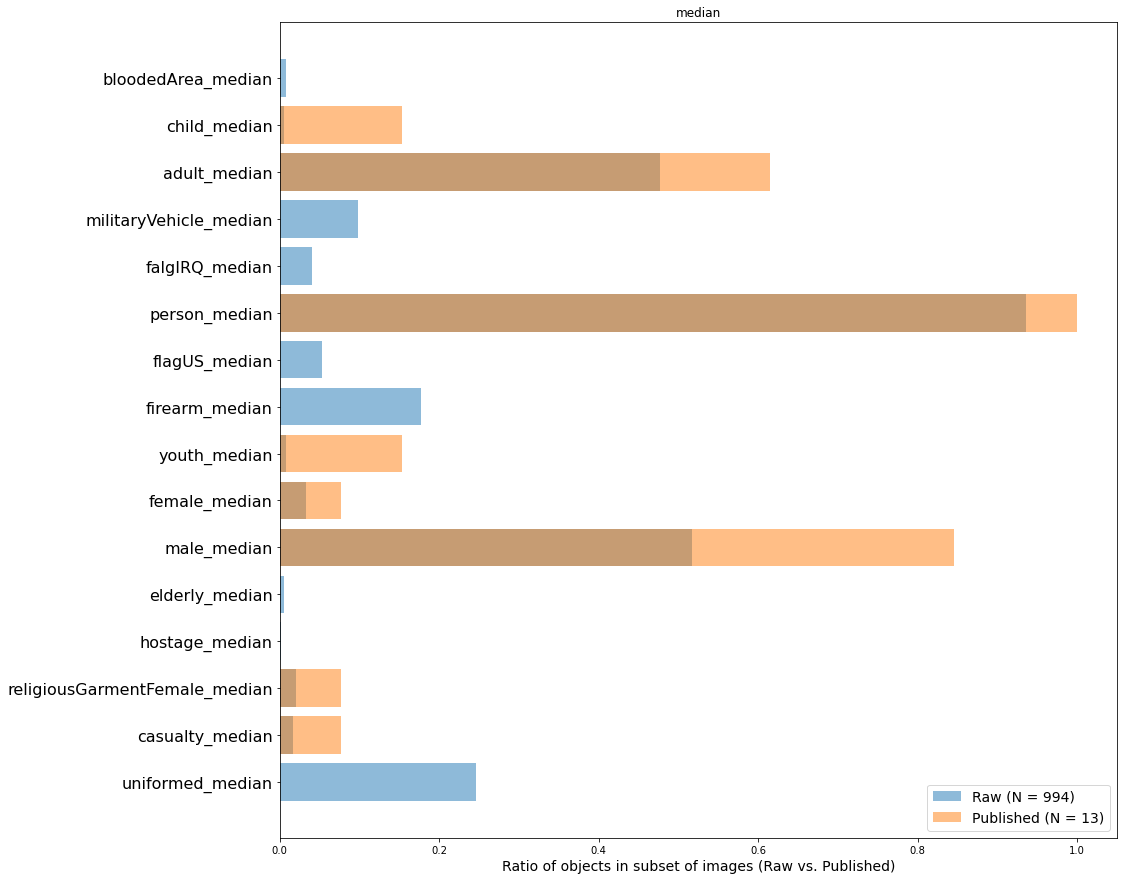

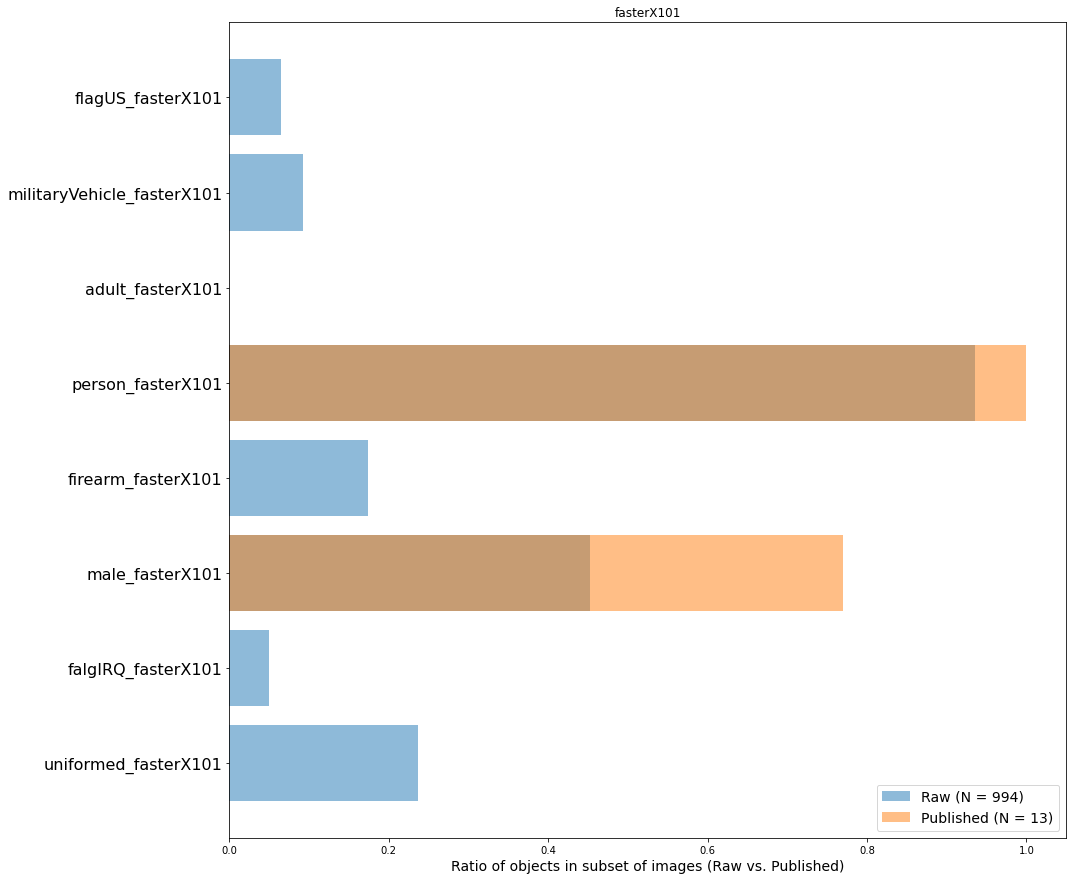

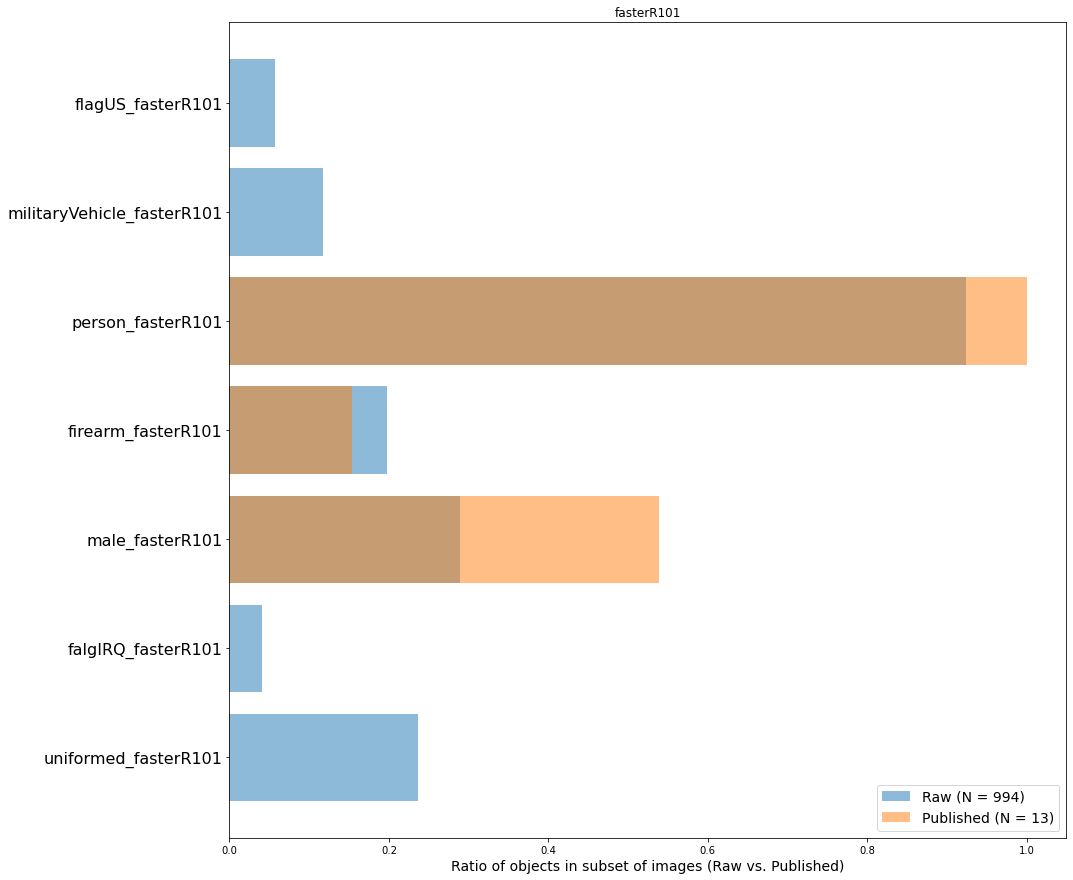

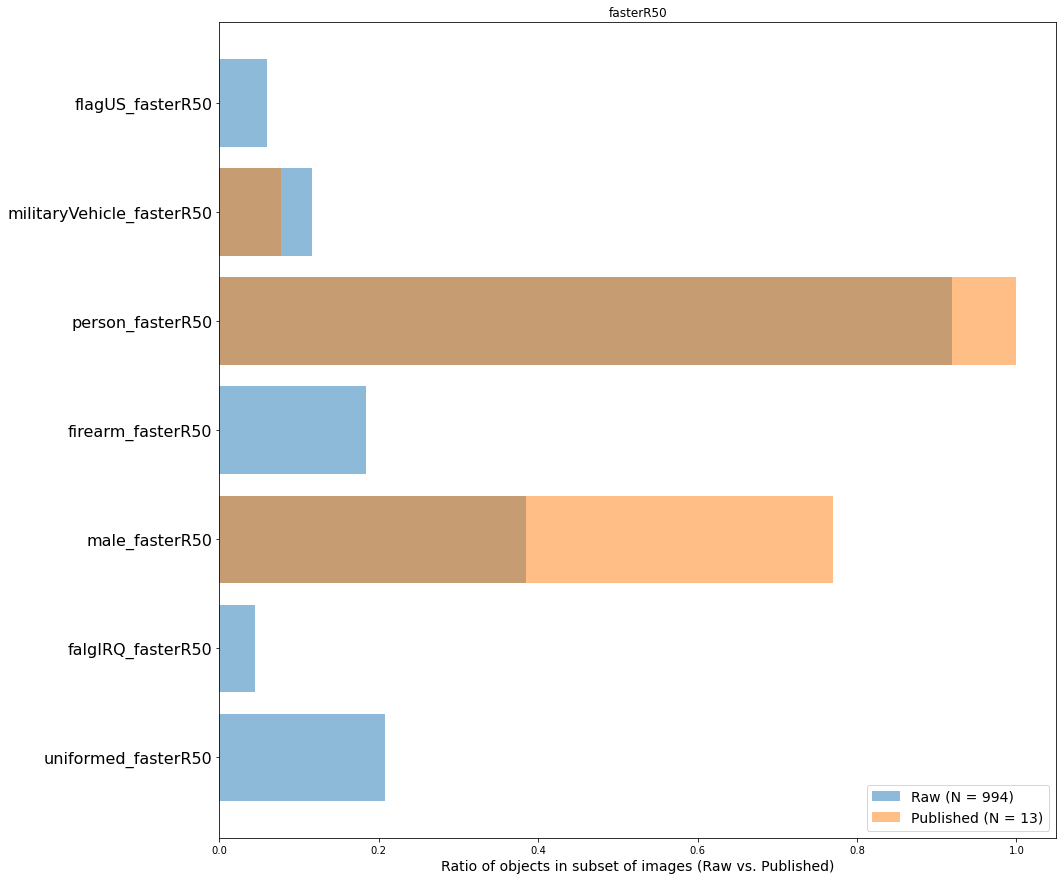

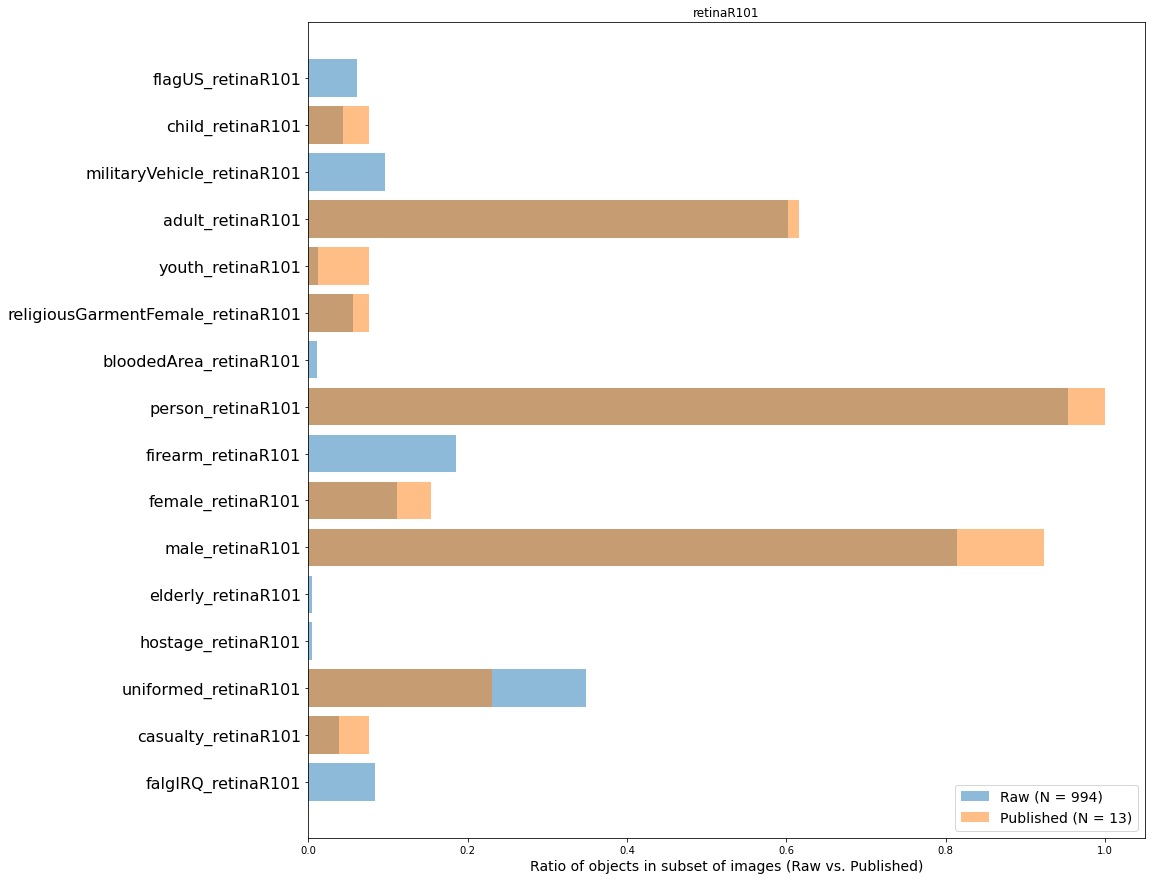

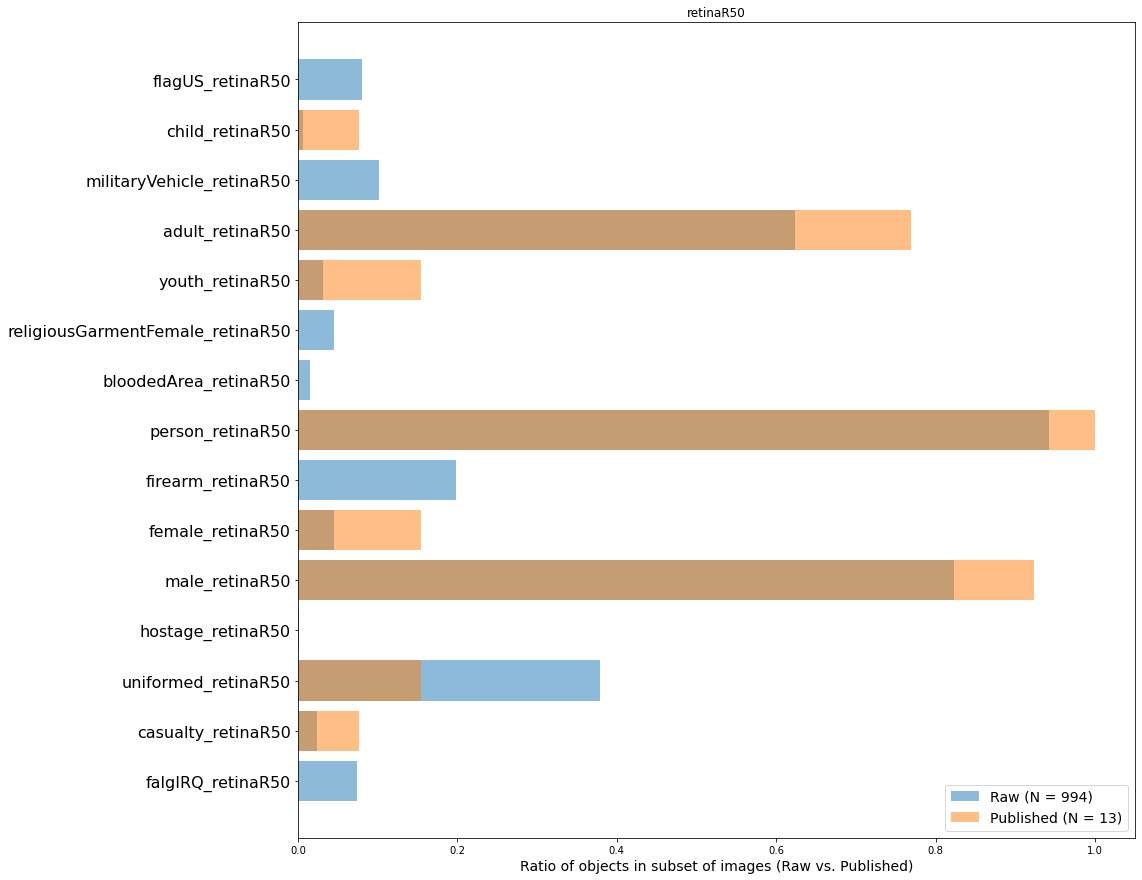

In [5]:
plot_corr(annotated_df_t30)
plot_corr(annotated_df_t30, 'train')
plot_corr(annotated_df_t30, 'test')

feature_version_list = ['annotated', 'mean', 'median', 'fasterX101', 'fasterR101', 'fasterR50', 'retinaR101', 'retinaR50']
for i in feature_version_list:
    feature_dist_plots(annotated_df_t30, i)

## Important to do:

- After this you could implement FULL before handling the threshold issue described below..
- Also think about doing the last ratina net also - and meybe not including the fasterRCNN in rare cats (or some other rule)
    - Right now stuff gets fucked upi when the Faster's esitmate only zeores..

- Ok... the "overestimation" due to threshold is kind of irretating now.. But how to decide on that abitrary number? 
    - actually - you do have the socers savd so you maybe you could just do asomething there?
    Else, look at parameter below and run again.
    > cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1  # set a custom testing threshold in prediction.py....

# FULL

In [ ]:
df = annotate_df(FULL = True)


In [ ]:
df = meta_to_df(df, img_dir='/media/simon/Seagate Expansion Drive/images_spanner')

Aprox 830min or 14hours

In [ ]:
df.shape

In [ ]:
with open('spanner_full_df.pkl', 'wb') as file:
    pickle.dump(df, file)

In [ ]:
df.sample(10)

In [ ]:
df['custom2'].unique()

In [ ]:
n_raw = (df['custom2'] == 'Raw').sum()
n_sub = (df['custom2'] == 'Submitted').sum()
n_pub = (df['custom2'] == 'Published').sum()

for i in [('Raw', n_raw), ('Submitted', n_sub), ('Published', n_pub)]:
    print(f'Number of {i[0]}: {i[1]} \n')

## Test pickle:


In [ ]:

with open('spanner_full_df.pkl', 'rb') as file:
        test_pickle_df = pickle.load(file)

print(test_pickle_df.shape)
print(test_pickle_df['custom2'].unique())

tp_n_raw = (test_pickle_df['custom2'] == 'Raw').sum()
tp_n_sub = (test_pickle_df['custom2'] == 'Submitted').sum()
tp_n_pub = (test_pickle_df['custom2'] == 'Published').sum()

for i in [('Raw', tp_n_raw), ('Submitted', tp_n_sub), ('Published', tp_n_pub)]:
    print(f'Number of {i[0]}: {i[1]} \n')

In [ ]:
test_pickle_df.sample(10)

Seems good.

# Corrolation plots

In [ ]:
sub_df = df.sample(1000) # subset to plot

In [ ]:
plot_corr(sub_df)

# Raw, Sub an Pub

In [ ]:
# you of course do not have meta yet ...
feature_version_list = ['mean', 'median', 'fasterX101', 'fasterR101', 'fasterR50', 'retinaR101', 'retinaR50'] # no annotaated
for i in feature_version_list:
    feature_dist_plots(df, i) # but this is with full df.. Not the subset for scatter plot